<a href="https://colab.research.google.com/github/d-vf/notebooks/blob/master/Part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install graphviz
! pip install distfit #equi to fitdist
! pip install fitter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 345.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 40.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Recall:
* point deterministic
* range (Base value Lower bound Upper bound) (sensitivity of the results using ranges (on the input variables), spider plots and/or tornado plots (to represent impact on the outputs) deterministic
* distributions (probabilistic) -> MC
* need to justify chosen distributions for MC

# 702 R examples

##Lectures 4 and 5 - Engineering Econ code

NPV = $\sum_{t=0}^{n} \frac{CF_t}{(1 + r)^t}$

NPV is the Net Present Value. \\
CF_t represents the cash flow at time t. \\
r is the discount rate. \\
n is the number of time periods. \\

In [131]:
#exercise1-car.R
import numpy as np

# stream of cash flows
cash_flows = np.array([-15000, -1000, -1000, -1000, -1000, -1000, -1000, -1000 + 2000])
interest = 0.05
times = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Calculate NPV
npv = np.sum(cash_flows / (1 + interest)**times)
print("NPV:", npv)

NPV: -19365.010737137327


In [132]:
def calculate_npv(cash_flows, interest, times):
    return np.sum(cash_flows / (1 + interest) ** times)

npv = calculate_npv(cash_flows, interest, times)
print("NPV:", npv)

NPV: -19365.010737137327


In [133]:
# exercise2-car.R
#present value
F = 15000
interest = 0.06
n = 5

P = F / (1 + interest) ** n
print(P)

11208.872592990856


In [134]:
#exercise4-penny.R

# value of time spent, adjusted for inflation, falls below $0.01.
timespent = 5 / 3600 #(seconds)
hourlywage = 48000 / 2000
inflation = 0.05
year = 2019

value = hourlywage * timespent / (1 + inflation) ** (2019 - year)

while value > 0.01:
    year -= 1
    value = hourlywage * timespent / (1 + inflation) ** (2019 - year)

print("Year:", year)
print("Value:", value)


Year: 1994
Value: 0.009843425723258728


In [135]:
#exercise5-annuity.R
#Annuity

# Given values
annuity = 100
interest_rate = 0.1
num_periods = 5

# Calculating the present value (P) of the annuity
P = annuity * (1 - (1 + interest_rate) ** (-num_periods)) / interest_rate
print("Present Value of Annuity:", P)

Present Value of Annuity: 379.07867694084507


In [136]:
def present_value_of_annuity(annuity, interest_rate, num_periods):
    P = annuity * (1 - (1 + interest_rate) ** (-num_periods)) / interest_rate
    return P


# Calculate the present value of the annuity
annuity_value = present_value_of_annuity(annuity, interest_rate, num_periods)
print("Present Value of Annuity:", annuity_value)

Present Value of Annuity: 379.07867694084507


In [137]:
#exercise6-manhattan.R
past_value = 24
years = 2022 - 1626
interest = 0.06

current_value = past_value * (1 + interest) ** years
current_value /= 10 ** 9  # Convert to billions

print(current_value)

251.96132675990626


In [138]:
#exercise7-endowment.R
import math

carnegie = 1
dietrich = 265
years = 2011 - 1900
interest = 0.03

present_value_carnegie = carnegie * (1 + interest) ** years
difference1 = present_value_carnegie - dietrich

interest = 0.07
present_value_carnegie = carnegie * (1 + interest) ** years
difference2 = present_value_carnegie - dietrich

interest = math.exp(math.log(dietrich) / years) - carnegie

print("Difference with 0.03 interest:", difference1)
print("Difference with 0.07 interest:", difference2)
print("Calculated interest:", interest)

Difference with 0.03 interest: -238.39691866311065
Difference with 0.07 interest: 1561.414401910913
Calculated interest: 0.051552702615888846


In [139]:
#exercise8-plant.R
import numpy as np

cash_flow = np.array([0, 15000, 15000, 15000, 15000, 15000, 20000, 20000, 20000, 20000, 20000])
years = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
marr = 0.1

present_values = cash_flow / (1 + marr) ** years
total_present_value = sum(present_values)

base_benefit = 15000
extra_benefit = 5000

base_benefit_pv = base_benefit * (1 - (1 + marr) ** (-10)) / marr
extra_benefit_pv = extra_benefit * (1 - (1 + marr) ** (-5)) / marr / ((1 + marr) ** 5)

print("Present Values of Cash Flows:", present_values)
print("Total Present Value:", total_present_value)
print("Present Value of Base Benefit:", base_benefit_pv)
print("Present Value of Extra Benefit:", extra_benefit_pv)

Present Values of Cash Flows: [    0.         13636.36363636 12396.69421488 11269.72201352
 10245.20183048  9313.81984589 11289.47860108 10263.16236461
  9330.14760419  8481.95236745  7710.86578859]
Total Present Value: 103937.40826705136
Present Value of Base Benefit: 92168.50658557029
Present Value of Extra Benefit: 11768.901681481173


In [140]:
#exercise8b-plant.R
cash_flow = [6000, 6000, 6000, 6000, 6000, 35000, 0, 0, 0, 0, 0]
years = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
marr = 0.1

present_values = [cf / (1 + marr) ** t for cf, t in zip(cash_flow, years)]
total_present_value = sum(present_values)

print("Present Values of Cash Flows:", present_values)
print("Total Present Value:", total_present_value)

Present Values of Cash Flows: [6000.0, 5454.545454545454, 4958.6776859504125, 4507.888805409465, 4098.080732190423, 21732.246307070425, 0.0, 0.0, 0.0, 0.0, 0.0]
Total Present Value: 46751.438985166176


In [141]:
#exercise9-begin_and_end.R
cash_flow = [1000, 1000, 1000, 1000, 1000]
years1 = [0, 1, 2, 3, 4]
years2 = [1, 2, 3, 4, 5]
interest = 0.05

present_values1 = [cf / (1 + interest) ** t for cf, t in zip(cash_flow, years1)]
total_present_value1 = sum(present_values1)

present_values2 = [cf / (1 + interest) ** t for cf, t in zip(cash_flow, years2)]
total_present_value2 = sum(present_values2)

print("Present Values for years1:", present_values1)
print("Total Present Value for years1:", total_present_value1)

print("Present Values for years2:", present_values2)
print("Total Present Value for years2:", total_present_value2)


Present Values for years1: [1000.0, 952.3809523809523, 907.0294784580499, 863.837598531476, 822.7024747918819]
Total Present Value for years1: 4545.950504162361
Present Values for years2: [952.3809523809523, 907.0294784580499, 863.837598531476, 822.7024747918819, 783.5261664684588]
Total Present Value for years2: 4329.476670630819


In [142]:
#exercise11-annualized_benefits.R

capital1 = -100
i = 0.05
n = 70
ann_cost1 = capital1 * (i * (1 + i) ** n) / ((1 + i) ** n - 1)
ann_benefit1 = 6.5

print("Annual Cost for Investment 1:", ann_cost1)
print("Total Annual Cost for Investment 1:", ann_cost1 + ann_benefit1)

capital2 = -50
i = 0.05
n = 35
ann_cost2 = capital2 * (i * (1 + i) ** n) / ((1 + i) ** n - 1)
ann_benefit2 = 4.2

print("Annual Cost for Investment 2:", ann_cost2)
print("Total Annual Cost for Investment 2:", ann_cost2 + ann_benefit2)


Annual Cost for Investment 1: -5.1699153026236795
Total Annual Cost for Investment 1: 1.3300846973763205
Annual Cost for Investment 2: -3.05358536154249
Total Annual Cost for Investment 2: 1.14641463845751


In [143]:
#exercise11-eanb.R
import numpy as np

# Cash flow series 1
cash_flow1 = [-100] + [6.5] * 70
years1 = np.arange(0, 71)
i = 0.05

present_values1 = [cf / (1 + i) ** t for cf, t in zip(cash_flow1, years1)]
annuity_factor1 = (1 - (1 + i) ** (-max(years1))) / i
npv1 = sum(present_values1)
eanb1 = npv1 / annuity_factor1

print("Equivalent Annual Net Benefit (EANB) for Cash Flow Series 1:", eanb1)

# Cash flow series 2
cash_flow2 = [-50] + [4.2] * 35
years2 = np.arange(0, 36)

present_values2 = [cf / (1 + i) ** t for cf, t in zip(cash_flow2, years2)]
annuity_factor2 = (1 - (1 + i) ** (-max(years2))) / i
npv2 = sum(present_values2)
eanb2 = npv2 / annuity_factor2

print("Equivalent Annual Net Benefit (EANB) for Cash Flow Series 2:", eanb2)


Equivalent Annual Net Benefit (EANB) for Cash Flow Series 1: 1.3300846973763154
Equivalent Annual Net Benefit (EANB) for Cash Flow Series 2: 1.146414638457506


In [144]:
#exercise11-rollover.R
import numpy as np

# Cash flow series 1
cash_flow1 = [-100] + [6.5] * 70
years1 = np.arange(0, 71)
i = 0.05

present_values1 = [cf / (1 + i) ** t for cf, t in zip(cash_flow1, years1)]
npv1 = sum(present_values1)

print("Net Present Value (NPV) for Cash Flow Series 1:", npv1)

# Cash flow series 2
cash_flow2 = [-50] + [4.2] * 35
years2 = np.arange(0, 36)

present_values2 = [cf / (1 + i) ** t for cf, t in zip(cash_flow2, years2)]
npv2 = sum(present_values2)
npv2r = npv2 / (1 + i) ** 35
print("Net Present Value (NPV) for Cash Flow Series 2:", npv2r)

total_npv2 = npv2 + npv2r
print("Total NPV for Cash Flow Series 2 at Year 35:", total_npv2)


Net Present Value (NPV) for Cash Flow Series 1: 25.72739821678144
Net Present Value (NPV) for Cash Flow Series 2: 3.403111626677227
Total NPV for Cash Flow Series 2 at Year 35: 22.174727657060693


## Internal Rate of Return (IRR)
this can be formulated as goals seek...

Internal Rate of Return (IRR)
The Internal Rate of Return (IRR) is the discount rate that makes the Net Present Value (NPV) of all cash flows from a project equal to zero. It can be calculated using the following equation:


$$0 = NPV = \sum_{t=0}^{N} \frac{CF_t}{(1 + r)^t}$$
where:
$CF_t$ is the cash flow at time $t$ \\
$N$ is the total number of periods \\
$r$ is the IRR \\

with "goal seek" (this is how most solve, e.g. excel).

In [145]:
import numpy as np
from scipy.optimize import root

def npv(rate, cash_flows):
    return np.sum(cash_flows / (1 + rate) ** np.arange(len(cash_flows)))

def irr(cash_flows):
    result = root(lambda r: npv(r, cash_flows), 0.1)  # 0.1 is the initial guess
    return result.x[0] if result.success else None

cash_flows_example = [-800000000, 0, 0, 300000000, 350000000, 400000000, 450000000, 500000000, 550000000, 600000000, 650000000]

# Calculate IRR
calculated_irr = irr(cash_flows_example)
print("Calculated IRR:", calculated_irr)


Calculated IRR: 0.2737195427402931


In [146]:
import numpy as np

def npv(cash_flows, rate):
    """Calculate the NPV given a list of cash flows and a discount rate."""
    return sum(cf / (1 + rate)**i for i, cf in enumerate(cash_flows))

def npv_derivative(cash_flows, rate):
    """Calculate the derivative of NPV with respect to the discount rate."""
    return sum(-i * cf / (1 + rate)**(i + 1) for i, cf in enumerate(cash_flows))

def irr(cash_flows, initial_guess=0.1, iterations=10000, precision=0.00001):
    """Calculate the IRR using the Newton-Raphson method."""
    rate = initial_guess
    for _ in range(iterations):
        npv_value = npv(cash_flows, rate)
        npv_deriv = npv_derivative(cash_flows, rate)
        rate -= npv_value / npv_deriv  # Newton-Raphson iteration
        if abs(npv_value) < precision:
            return rate
    return rate


cash_flows_example = [-800000000, 0, 0, 300000000, 350000000, 400000000, 450000000, 500000000, 550000000, 600000000, 650000000]

# Calculate IRR
calculated_irr = irr(cash_flows_example)
print("Calculated IRR:", calculated_irr)


Calculated IRR: 0.27371954274029303


## Lecture 12 - Sensitivity Analysis Code
bookshelf

In [147]:
import pandas as pd
bookshelf = pd.read_csv('/content/drive/MyDrive/Coursework/19-702/Resources/Lecture 12 - Sensitivity Analysis Code/12-bookshelf.csv', header=0, sep=',')
bookshelf

price   profit
0    -56   150000
1    -28   325000
2      0   500000
3     28   675000
4     56   850000

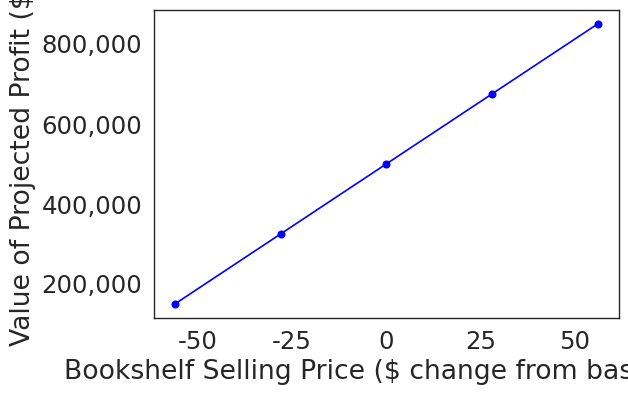

In [148]:
# 12-bookshelf.R
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(bookshelf.iloc[:, 0], bookshelf.iloc[:, 1], color='blue', linestyle='-', marker='o')  # Using iloc for columns
ax.set_xlabel("Bookshelf Selling Price ($ change from baseline)")
ax.set_ylabel("Value of Projected Profit ($)")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.style.use('bmh')

plt.show()

# Saving to PDF
#plt.savefig("12-bookshelf.pdf")

In [149]:
# Eagle airlines exercise
# 12-eagle.R
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Part 1: Point analysis

def net_benefits(operating_costs, hours_flown, insurance, plane_purchase_price, interest_rate, proportion_costs_financed, charter_price, proportion_charter_flights, ticket_price, nr_seats, capacity_flights):
    costs = operating_costs * hours_flown + insurance + plane_purchase_price * interest_rate * proportion_costs_financed
    benefits = hours_flown * (charter_price * proportion_charter_flights + ticket_price * (1 - proportion_charter_flights) * nr_seats * capacity_flights)
    return benefits - costs

nr_seats = 5
hours_flown = 800
charter_price = 325
ticket_price = 100
capacity_flights = 0.5
proportion_charter_flights = 0.5
operating_costs = 245
insurance = 20000
plane_purchase_price = 87500
interest_rate = 0.115
proportion_costs_financed = 0.4

base_case = net_benefits(operating_costs, hours_flown, insurance, plane_purchase_price, interest_rate, proportion_costs_financed, charter_price, proportion_charter_flights, ticket_price, nr_seats, capacity_flights)
print(base_case)

9975.0


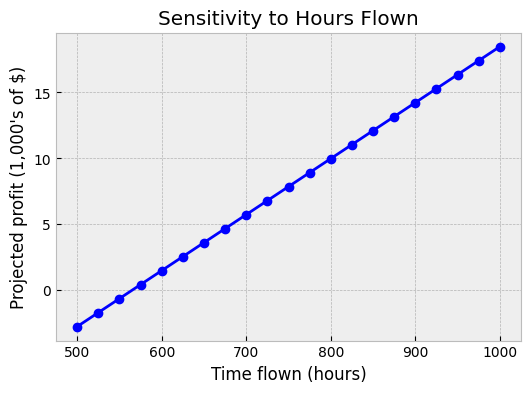

In [23]:
# Part 2: Sensitivity to hours flown
hours_flown_range = np.linspace(500, 1000, 21)
sensitivity_hours = pd.DataFrame({
    'hours_flown': hours_flown_range,
    'net_ben': [net_benefits(operating_costs, hf, insurance, plane_purchase_price, interest_rate, proportion_costs_financed, charter_price, proportion_charter_flights, ticket_price, nr_seats, capacity_flights) for hf in hours_flown_range]
})

plt.figure(figsize=(6, 4))
plt.plot(sensitivity_hours['hours_flown'], sensitivity_hours['net_ben']/1000, color='blue', marker='o')
plt.xlabel('Time flown (hours)')
plt.ylabel('Projected profit (1,000\'s of $)')
plt.title('Sensitivity to Hours Flown')
plt.grid(True)
plt.show()


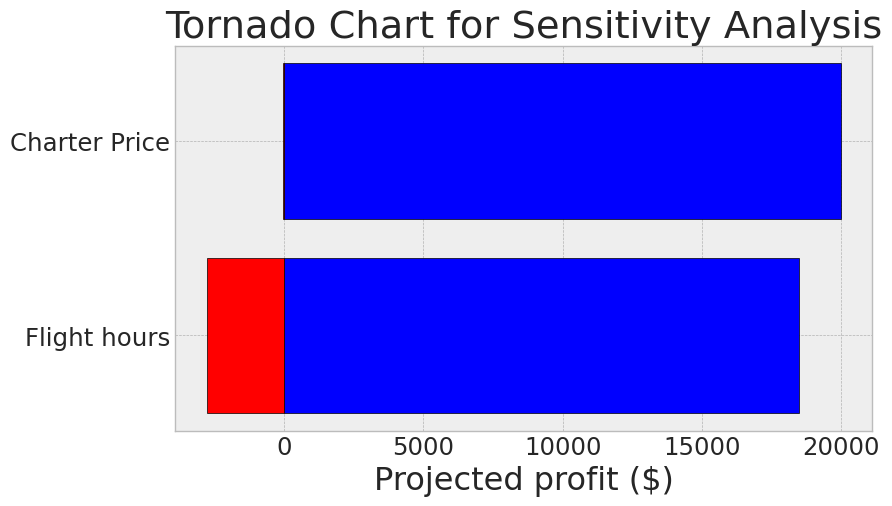

In [150]:
# Part 3: Tornado chart

# Define various scenarios
scenarios = {
    'Flight hours': [net_benefits(operating_costs, hours, insurance, plane_purchase_price, interest_rate, proportion_costs_financed, charter_price, proportion_charter_flights, ticket_price, nr_seats, capacity_flights) for hours in [500, 1000]],
    'Charter Price': [net_benefits(operating_costs, 800, insurance, plane_purchase_price, interest_rate, proportion_costs_financed, price, proportion_charter_flights, ticket_price, nr_seats, capacity_flights) for price in [300, 350]],
}


tornado_data = pd.DataFrame(scenarios, index=["Lower", "Upper"]).T
tornado_data['Range'] = tornado_data['Upper'] - tornado_data['Lower']
tornado_data = tornado_data.sort_values(by='Range', ascending=True)


plt.figure(figsize=(9, 5))
for index, row in tornado_data.iterrows():
    plt.barh(index, row['Upper'], color='blue', edgecolor='black')
    plt.barh(index, row['Lower'], color='red', edgecolor='black')

plt.yticks(range(len(tornado_data)), tornado_data.index)
plt.xlabel('Projected profit ($)')
plt.title('Tornado Chart for Sensitivity Analysis')
plt.gca().invert_yaxis()
plt.show()


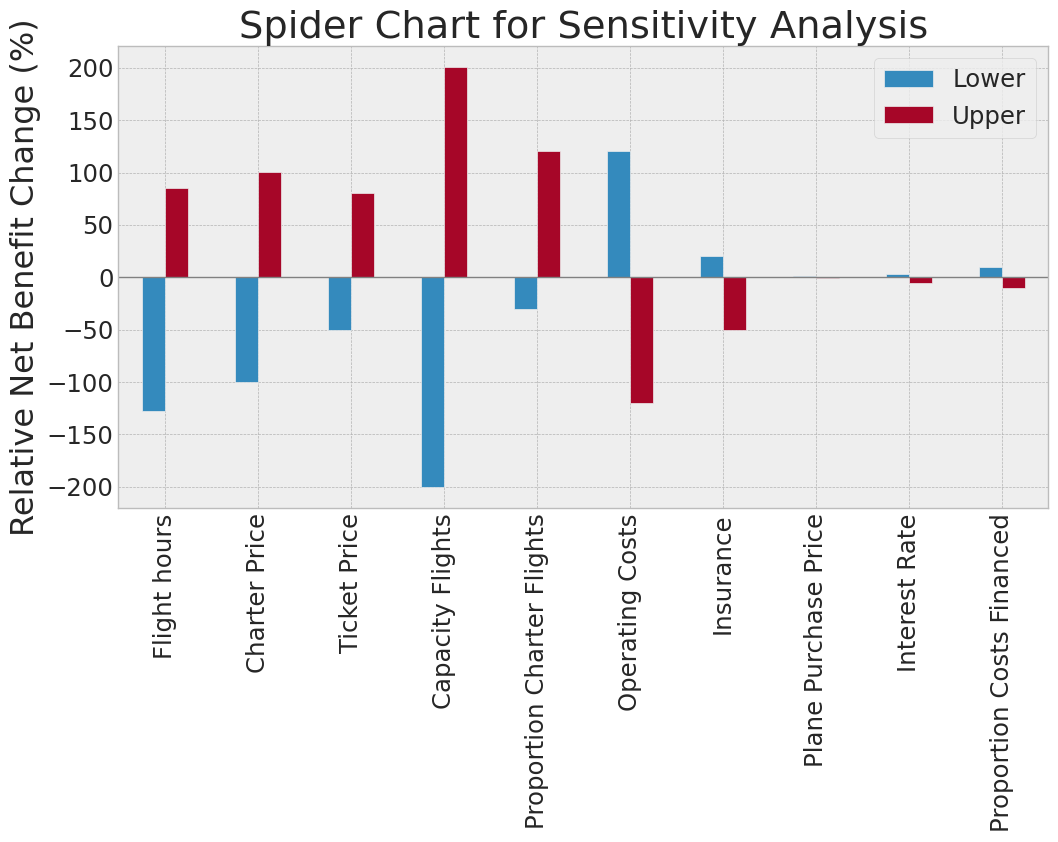

In [151]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to compute net benefits for different parameters
def compute_net_benefits(hours_flown, charter_price, ticket_price, capacity_flights, proportion_charter_flights, operating_costs, insurance, plane_purchase_price, interest_rate, proportion_costs_financed):
    costs = operating_costs * hours_flown + insurance + plane_purchase_price * interest_rate * proportion_costs_financed
    benefits = hours_flown * (charter_price * proportion_charter_flights + ticket_price * (1 - proportion_charter_flights) * nr_seats * capacity_flights)
    return benefits - costs

# Parameters
nr_seats = 5
params = {
    'hours_flown': 800,
    'charter_price': 325,
    'ticket_price': 100,
    'capacity_flights': 0.5,
    'proportion_charter_flights': 0.5,
    'operating_costs': 245,
    'insurance': 20000,
    'plane_purchase_price': 87500,
    'interest_rate': 0.115,
    'proportion_costs_financed': 0.4
}

# Calculate net benefits for different scenarios
def calc_relative_net_benefits(base, new_values, param):
    base_value = compute_net_benefits(**params)
    return [(compute_net_benefits(**{**params, **{param: new}}) - base_value) / base_value * 100 for new in new_values]

# Scenarios
hours_flown_relative = calc_relative_net_benefits(params['hours_flown'], [500, 1000], 'hours_flown')
charter_price_relative = calc_relative_net_benefits(params['charter_price'], [300, 350], 'charter_price')
ticket_price_relative = calc_relative_net_benefits(params['ticket_price'], [95, 108], 'ticket_price')
capacity_flights_relative = calc_relative_net_benefits(params['capacity_flights'], [0.4, 0.6], 'capacity_flights')
proportion_charter_flights_relative = calc_relative_net_benefits(params['proportion_charter_flights'], [0.45, 0.7], 'proportion_charter_flights')
operating_costs_relative = calc_relative_net_benefits(params['operating_costs'], [230, 260], 'operating_costs')
insurance_relative = calc_relative_net_benefits(params['insurance'], [18000, 25000], 'insurance')
plane_purchase_price_relative = calc_relative_net_benefits(params['plane_purchase_price'], [85000, 90000], 'plane_purchase_price')
interest_rate_relative = calc_relative_net_benefits(params['interest_rate'], [0.105, 0.13], 'interest_rate')
proportion_costs_financed_relative = calc_relative_net_benefits(params['proportion_costs_financed'], [0.3, 0.5], 'proportion_costs_financed')

# Combine all scenarios
spider_data = pd.DataFrame({
    'Flight hours': hours_flown_relative,
    'Charter Price': charter_price_relative,
    'Ticket Price': ticket_price_relative,
    'Capacity Flights': capacity_flights_relative,
    'Proportion Charter Flights': proportion_charter_flights_relative,
    'Operating Costs': operating_costs_relative,
    'Insurance': insurance_relative,
    'Plane Purchase Price': plane_purchase_price_relative,
    'Interest Rate': interest_rate_relative,
    'Proportion Costs Financed': proportion_costs_financed_relative
}, index=['Lower', 'Upper'])

# Plotting
spider_data.T.plot(kind='bar', figsize=(12, 6))
plt.ylabel('Relative Net Benefit Change (%)')
plt.title('Spider Chart for Sensitivity Analysis')
plt.axhline(0, color='gray', lw=1)
plt.show()


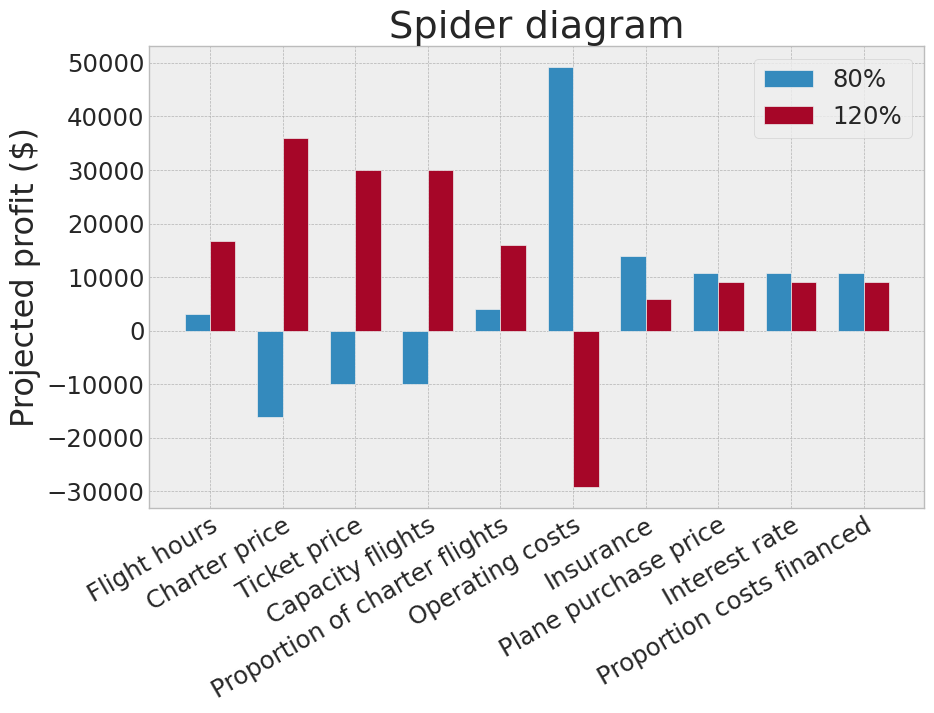

In [152]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define parameters and their base values
base_values = {
    'Flight hours': 800,
    'Charter price': 325,
    'Ticket price': 100,
    'Capacity flights': 0.5,
    'Proportion of charter flights': 0.5,
    'Operating costs': 245,
    'Insurance': 20000,
    'Plane purchase price': 87500,
    'Interest rate': 0.115,
    'Proportion costs financed': 0.4
}


# Net benefits function
def net_benefits(hours_flown, charter_price, ticket_price, capacity_flights, proportion_charter_flights, operating_costs, insurance, plane_purchase_price, interest_rate, proportion_costs_financed):
    costs = operating_costs * hours_flown + insurance + plane_purchase_price * interest_rate * proportion_costs_financed
    benefits = hours_flown * (charter_price * proportion_charter_flights + ticket_price * (1 - proportion_charter_flights) * 5 * capacity_flights)
    return benefits - costs

# Calculate net benefits for each parameter over its range
hours_flown_range = np.linspace(500, 1000, 21)
parameter_values = {
    'hours_flown': hours_flown_range,
    'charter_price': np.linspace(300, 350, 21),
    'ticket_price': np.linspace(95, 108, 21),
}



# Calculate the net benefits for each parameter at 80% and 120% of the base value
relative_changes = [0.8, 1.2]
spider_data = {}
for param, base_val in base_values.items():
    spider_data[param] = [
        net_benefits(
            hours_flown = base_values['Flight hours'] if param != 'Flight hours' else base_val * change,
            charter_price = base_values['Charter price'] if param != 'Charter price' else base_val * change,
            ticket_price = base_values['Ticket price'] if param != 'Ticket price' else base_val * change,
            capacity_flights = base_values['Capacity flights'] if param != 'Capacity flights' else base_val * change,
            proportion_charter_flights = base_values['Proportion of charter flights'] if param != 'Proportion of charter flights' else base_val * change,
            operating_costs = base_values['Operating costs'] if param != 'Operating costs' else base_val * change,
            insurance = base_values['Insurance'] if param != 'Insurance' else base_val * change,
            plane_purchase_price = base_values['Plane purchase price'] if param != 'Plane purchase price' else base_val * change,
            interest_rate = base_values['Interest rate'] if param != 'Interest rate' else base_val * change,
            proportion_costs_financed = base_values['Proportion costs financed'] if param != 'Proportion costs financed' else base_val * change
        ) for change in relative_changes
    ]


df_spider = pd.DataFrame(spider_data, index=["80%", "120%"])


fig, ax = plt.subplots(figsize=(10, 6))


ind = np.arange(len(df_spider.columns))
width = 0.35

# The width of the bars
bar_width = 0.35

# Plotting each parameter's change in net benefits
for i in range(len(df_spider.index)):
    ax.bar(ind + i * bar_width, df_spider.iloc[i], bar_width, label=df_spider.index[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Projected profit ($)')
ax.set_title('Spider diagram')
ax.set_xticks(ind + bar_width / len(df_spider.index))
ax.set_xticklabels(df_spider.columns)
ax.legend()

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")

plt.show()


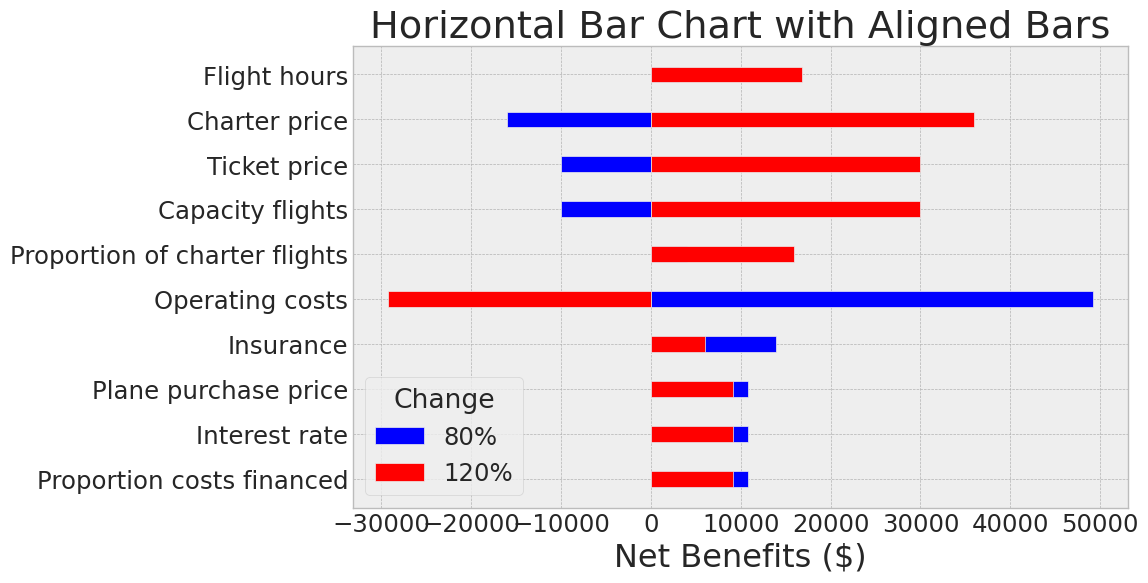

In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define parameters and their base values
base_values = {
    'Flight hours': 800,
    'Charter price': 325,
    'Ticket price': 100,
    'Capacity flights': 0.5,
    'Proportion of charter flights': 0.5,
    'Operating costs': 245,
    'Insurance': 20000,
    'Plane purchase price': 87500,
    'Interest rate': 0.115,
    'Proportion costs financed': 0.4
}

# Net benefits function
def net_benefits(hours_flown, charter_price, ticket_price, capacity_flights, proportion_charter_flights, operating_costs, insurance, plane_purchase_price, interest_rate, proportion_costs_financed):
    costs = operating_costs * hours_flown + insurance + plane_purchase_price * interest_rate * proportion_costs_financed
    benefits = hours_flown * (charter_price * proportion_charter_flights + ticket_price * (1 - proportion_charter_flights) * 5 * capacity_flights)
    return benefits - costs

# Calculate net benefits for each parameter over its range
hours_flown_range = np.linspace(500, 1000, 21)
parameter_values = {
    'hours_flown': hours_flown_range,
    'charter_price': np.linspace(300, 350, 21),
    'ticket_price': np.linspace(95, 108, 21),
}

# Calculate the net benefits for each parameter at 80% and 120% of the base value
relative_changes = [0.8, 1.2]
data = {}
for param, base_val in base_values.items():
    data[param] = [
        net_benefits(
            hours_flown=base_values['Flight hours'] if param != 'Flight hours' else base_val * change,
            charter_price=base_values['Charter price'] if param != 'Charter price' else base_val * change,
            ticket_price=base_values['Ticket price'] if param != 'Ticket price' else base_val * change,
            capacity_flights=base_values['Capacity flights'] if param != 'Capacity flights' else base_val * change,
            proportion_charter_flights=base_values['Proportion of charter flights'] if param != 'Proportion of charter flights' else base_val * change,
            operating_costs=base_values['Operating costs'] if param != 'Operating costs' else base_val * change,
            insurance=base_values['Insurance'] if param != 'Insurance' else base_val * change,
            plane_purchase_price=base_values['Plane purchase price'] if param != 'Plane purchase price' else base_val * change,
            interest_rate=base_values['Interest rate'] if param != 'Interest rate' else base_val * change,
            proportion_costs_financed=base_values['Proportion costs financed'] if param != 'Proportion costs financed' else base_val * change
        ) for change in relative_changes
    ]

df = pd.DataFrame(data, index=["80%", "120%"])

# Create a horizontal bar chart with bars for each parameter aligned on the same line on x and y
fig, ax = plt.subplots(figsize=(10, 6))

# The y locations for the groups
ind = np.arange(len(df.columns))

# Set the bar width
bar_width = 0.35  # Adjust as necessary to fit your plot

# Plotting each parameter's change in net benefits on the same line
ax.barh(ind, df.iloc[0], bar_width, label='80%', color='blue', align='center')
ax.barh(ind, df.iloc[1], bar_width, label='120%', color='red', align='center')

# Add some text for labels, title, and custom y-axis tick labels, etc.
ax.set_xlabel('Net Benefits ($)')
ax.set_title('Horizontal Bar Chart with Aligned Bars')
ax.set_yticks(ind)
ax.set_yticklabels(df.columns)
ax.invert_yaxis()  # labels read top-to-bottom
ax.legend(title="Change")

# Display the chart
plt.show()



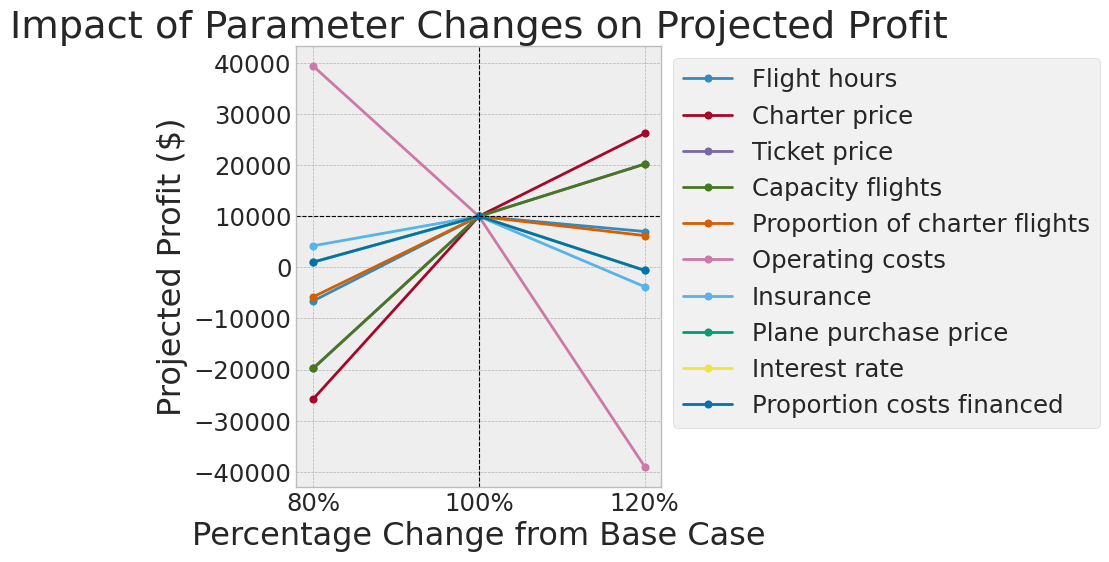

In [154]:
# Part 4. Spider chart.

# Prepare the data for plotting
df_spider = pd.DataFrame(spider_data, index=["80%", "120%"])

# Normalize the net benefits so that the base case (100%) is equal to $10,000
# Assuming 'Operating costs' is the net benefit at 100%
net_benefit_at_100_percent = base_values['Operating costs']
adjustment_to_10000 = 10000 - net_benefit_at_100_percent

# Adjust the 80% and 120% to the new scale where 100% is $10,000
df_spider.loc['80%'] -= adjustment_to_10000
df_spider.loc['120%'] -= adjustment_to_10000

# Define x values for 80% and 120% changes
x_values = [-20, 0, 20]  # Representing -20% for 80%, 0% for 100%, and +20% for 120%

# Create the line plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines for each parameter
for param in df_spider.columns:
    y_values = [df_spider.loc['80%', param], 10000, df_spider.loc['120%', param]]
    ax.plot(x_values, y_values, marker='o', label=param)

# Customize the plot
ax.axhline(10000, color='black', linewidth=0.8, linestyle='--')  # Add a line at profit = $10,000
ax.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add a line at 0% change
ax.set_ylabel('Projected Profit ($)')
ax.set_xlabel('Percentage Change from Base Case')
ax.set_title('Impact of Parameter Changes on Projected Profit')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Set the x-axis labels
ax.set_xticks(x_values)
ax.set_xticklabels(['80%', '100%', '120%'])

plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


In [ ]:
# Part 5. Strategy region

# Net benefits function
def net_benefits(hours_flown, charter_price, ticket_price, capacity_flights, proportion_charter_flights, operating_costs, insurance, plane_purchase_price, interest_rate, proportion_costs_financed):
    costs = operating_costs * hours_flown + insurance + plane_purchase_price * interest_rate * proportion_costs_financed
    benefits = hours_flown * (charter_price * proportion_charter_flights + ticket_price * (1 - proportion_charter_flights) * 5 * capacity_flights)
    return benefits - costs

fractions = np.arange(0, 1.1, 0.1)
max_capacity_flights = 1
max_hours_flown = 1000
strategy_region = pd.DataFrame([(cf, hf) for cf in fractions for hf in fractions], columns=['x', 'y'])

strategy_region['profit'] = strategy_region.apply(lambda row: net_benefits(operating_costs, row['y'] * max_hours_flown, insurance, plane_purchase_price, interest_rate, proportion_costs_financed, charter_price, proportion_charter_flights, ticket_price, nr_seats, row['x'] * max_capacity_flights), axis=1)

strategy_region['profit_sign'] = np.sign(strategy_region['profit'] - 4200)

# Plot
cmap = ListedColormap(['red', 'blue'])
plt.figure(figsize=(6, 4))
plt.scatter(strategy_region['x']*100, strategy_region['y']*100, c=strategy_region['profit_sign'], cmap=cmap)
plt.xlabel('Percentage of max capacity')
plt.ylabel('Percentage of max hours flown')
plt.title('Strategy Region')
plt.grid(True)
plt.show()


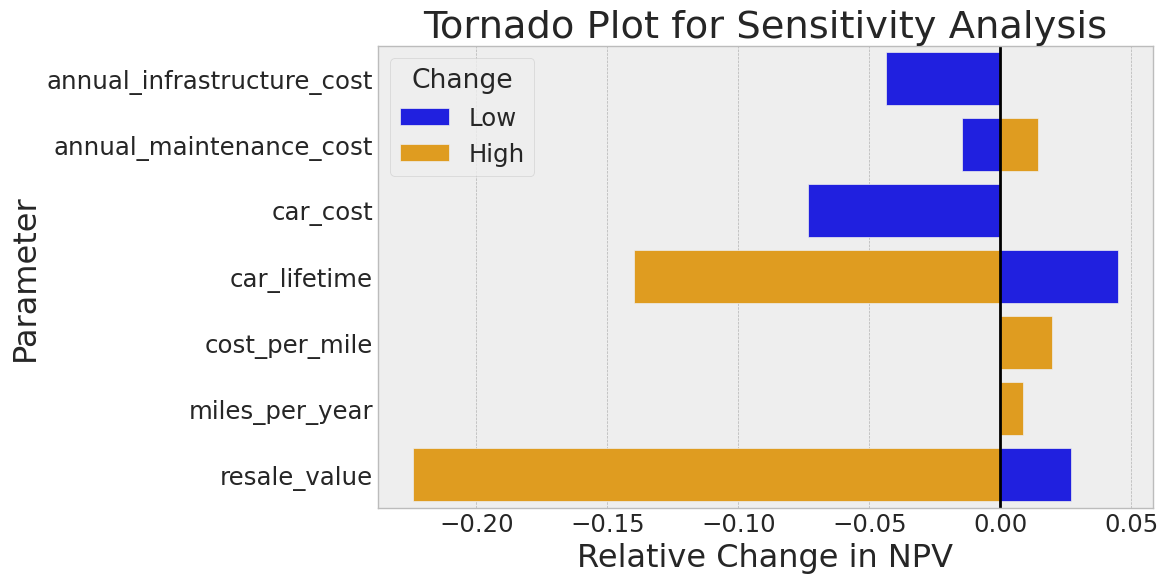

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def npv(discount_rate, horizon, number_of_cars, car_cost, car_lifetime, resale_value, annual_maintenance_cost, annual_infrastructure_cost, miles_per_year, cost_per_mile, debug=False):
    total_costs = np.zeros(horizon)
    for year in range(horizon):
        if year % car_lifetime == 0:
            total_costs[year] += car_cost * number_of_cars
        if year % car_lifetime == car_lifetime - 1:
            total_costs[year] -= resale_value * number_of_cars
        total_costs[year] += (annual_maintenance_cost + annual_infrastructure_cost + miles_per_year * cost_per_mile) * number_of_cars
    net_benefits = -total_costs
    npv_value = np.sum(net_benefits / ((1 + discount_rate) ** np.arange(horizon)))
    return npv_value

# Fixed parameters
fixed_params = {
    'discount_rate': 0.05,
    'horizon': 25,
    'number_of_cars': 250,
    'car_cost': 42000,
    'car_lifetime': 12,
    'resale_value': 5000,
    'annual_maintenance_cost': 1000,
    'annual_infrastructure_cost': 600,
    'miles_per_year': 13500,
    'cost_per_mile': 0.02,
    'debug': False
}

# High and low values for sensitivity analysis
parameters = {
    'car_cost': (38000, 42000),
    'car_lifetime': (10, 15),
    'resale_value': (2000, 30000),
    'annual_maintenance_cost': (900, 1100),
    'annual_infrastructure_cost': (300, 600),
    'miles_per_year': (13500, 16500),
    'cost_per_mile': (0.02, 0.03)
}

# Calculate base NPV
base_npv = npv(**fixed_params)

# Perform sensitivity analysis for each parameter
sensitivity_results = []
for param, (low, high) in parameters.items():
    low_npv = npv(**{**fixed_params, param: low})
    high_npv = npv(**{**fixed_params, param: high})
    relative_change_low = (low_npv - base_npv) / base_npv
    relative_change_high = (high_npv - base_npv) / base_npv
    sensitivity_results.append([param, 'Low', relative_change_low])
    sensitivity_results.append([param, 'High', relative_change_high])

# Prepare data for plotting
tornado_data = pd.DataFrame(sensitivity_results, columns=["Parameter", "Change", "NPV Change"])
tornado_data_pivot = tornado_data.pivot(index='Parameter', columns='Change', values='NPV Change').reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot 'Low' change bars
sns.barplot(x=tornado_data_pivot['Low'], y=tornado_data_pivot['Parameter'], color='blue', label='Low')

# Plot 'High' change bars
sns.barplot(x=tornado_data_pivot['High'], y=tornado_data_pivot['Parameter'], color='orange', label='High')

plt.axvline(x=0, color='k', linestyle='-')
plt.xlabel("Relative Change in NPV")
plt.ylabel("Parameter")
plt.title("Tornado Plot for Sensitivity Analysis")
plt.legend(title="Change")
plt.show()


## Lecture 18 - MonteCarlo Code
Coin toss example

In [157]:
# cointoss.R
# coin toss implementation
import random

def heads_or_tails():
    return 0 if random.uniform(0, 1) > 0.5 else 1

def game():
    current_sequence = [-1, -1, -1]
    hht = [0, 0, 1]
    thh = [1, 0, 0]
    while current_sequence != hht and current_sequence != thh:
        current_sequence.pop(0)
        current_sequence.append(heads_or_tails())
    return 1 if current_sequence == hht else 0

nr_runs = 1000
runs = 0
wins = 0

while runs < nr_runs:
    wins += game()
    runs += 1

print("Runs:", runs)
print("Wins:", wins)


Runs: 1000
Wins: 253


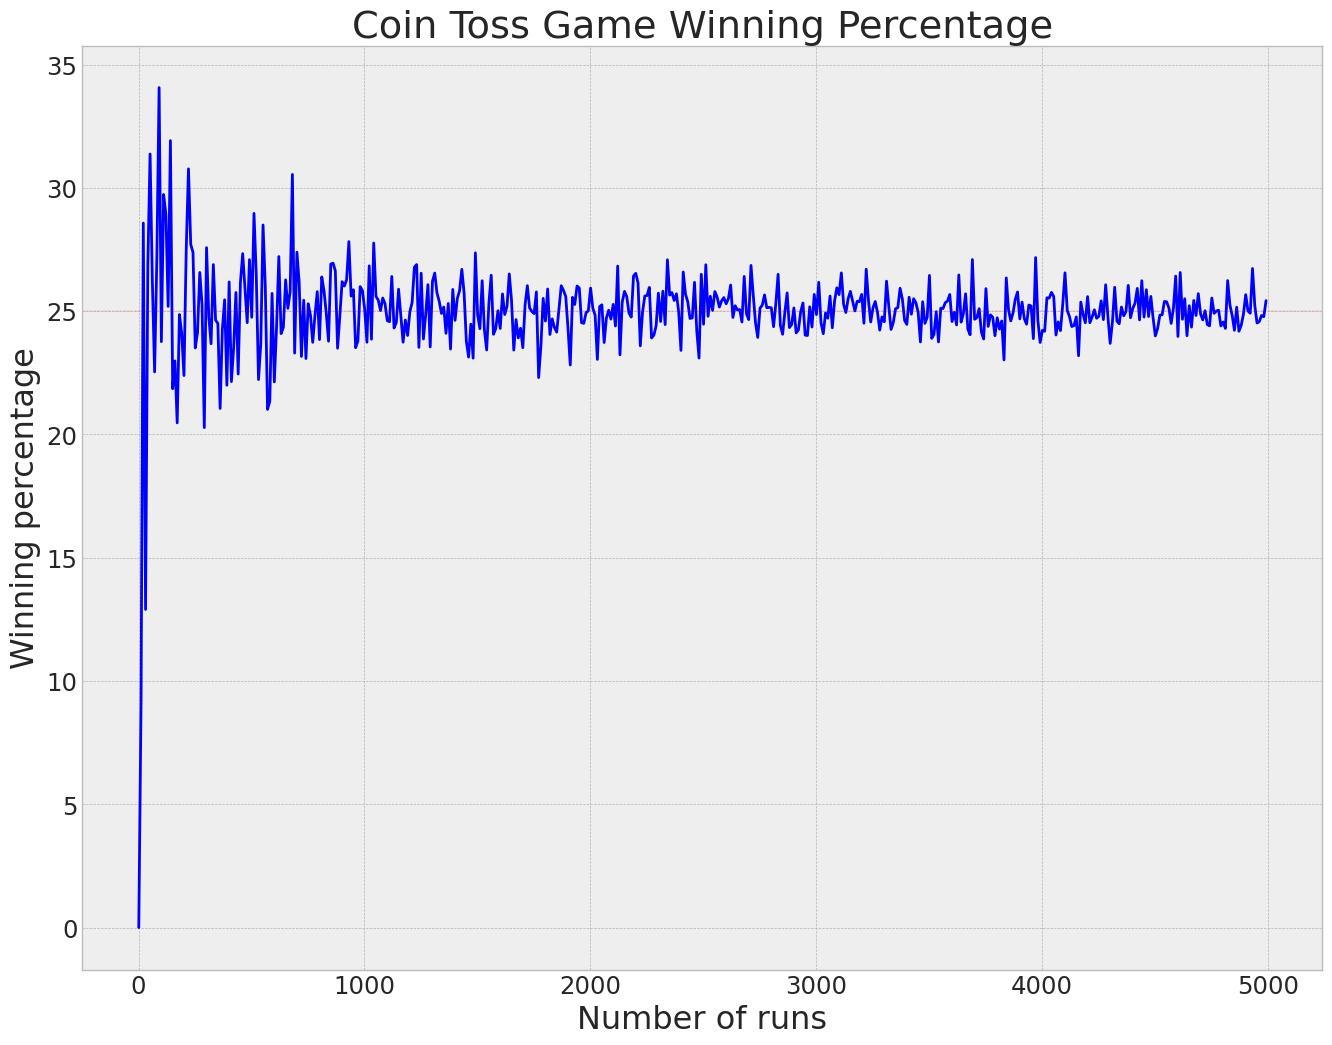

In [158]:
# cointoss-convergence.R
# Coin toss example
# convergence plot
import random
import matplotlib.pyplot as plt

def heads_or_tails():
    return 0 if random.uniform(0, 1) > 0.5 else 1

def game():
    current_sequence = [-1, -1, -1]
    hht = [0, 0, 1]
    thh = [1, 0, 0]
    iterations = 0
    while current_sequence != hht and current_sequence != thh:
        current_sequence.pop(0)
        current_sequence.append(heads_or_tails())
        iterations += 1
    return 1 if current_sequence == hht else 0

random.seed(1)  # For reproducibility, remove for true randomness

all_runs = []
all_wins = []

for nr_runs in range(1, 5001, 10):
    runs = 0
    wins = 0
    while runs < nr_runs:
        wins += game()
        runs += 1
    all_runs.append(runs)
    all_wins.append(wins / runs * 100)

plt.plot(all_runs, all_wins, color='blue')
plt.axhline(y=25, color='red', linestyle='dotted', linewidth=0.3)
plt.xlabel("Number of runs")
plt.ylabel("Winning percentage")
plt.title("Coin Toss Game Winning Percentage")
plt.grid(True)
plt.show()


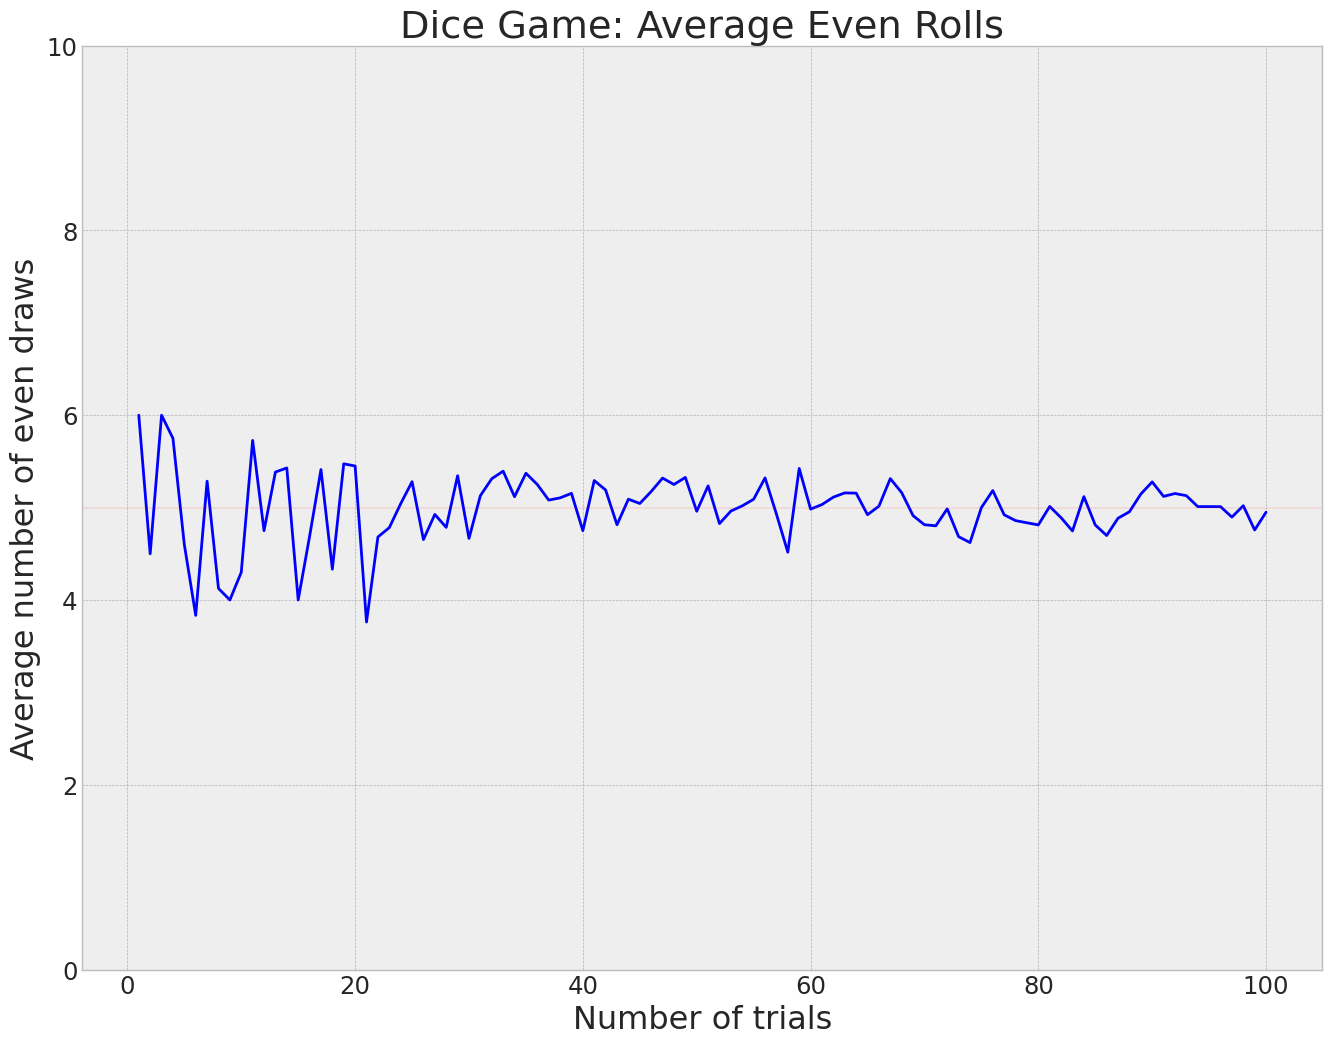

In [163]:
# dice-convergence.R
# Dice example
# convergence plot
import random
import matplotlib.pyplot as plt

def odd_or_even():
    dice_roll = random.randint(1, 6)
    return dice_roll % 2  # 0 is even, 1 is odd

def game():
    nr_odds = sum(odd_or_even() for _ in range(10))
    return 10 - nr_odds

random.seed(1)  # For reproducibility, remove for true randomness

all_runs = []
all_evens = []

for nr_runs in range(1, 101):
    runs = 0
    nr_evens = 0
    while runs < nr_runs:
        nr_evens += game()
        runs += 1
    all_runs.append(runs)
    all_evens.append(nr_evens / runs)

plt.plot(all_runs, all_evens, color='blue')
plt.axhline(y=5, color='red', linestyle='dotted', linewidth=0.3)
plt.xlabel("Number of trials")
plt.ylabel("Average number of even draws")
plt.ylim(0, 10)
plt.title("Dice Game: Average Even Rolls")
plt.grid(True)
plt.show()


------------------------------
Runs: 10
Min: 0.00
Max: 0.83
Mean: 0.17
Stddev: 0.26
------------------------------


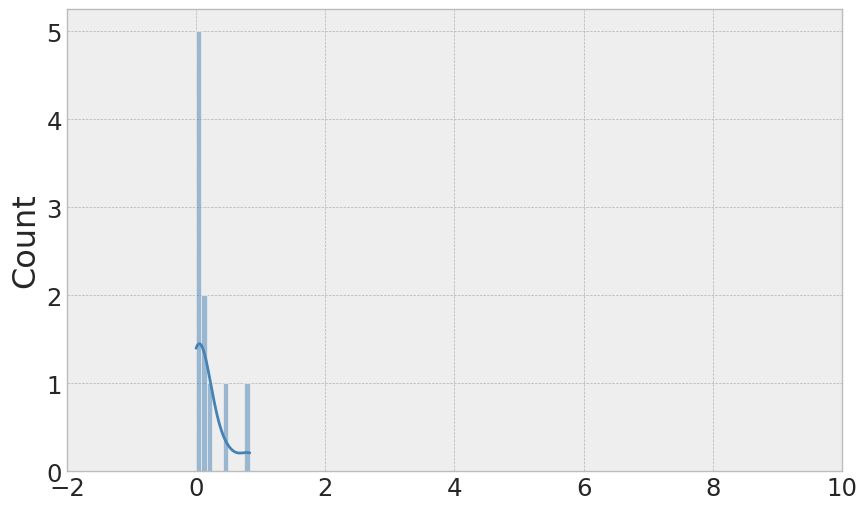

------------------------------
Runs: 100
Min: -0.07
Max: 24.87
Mean: 0.47
Stddev: 2.54
------------------------------


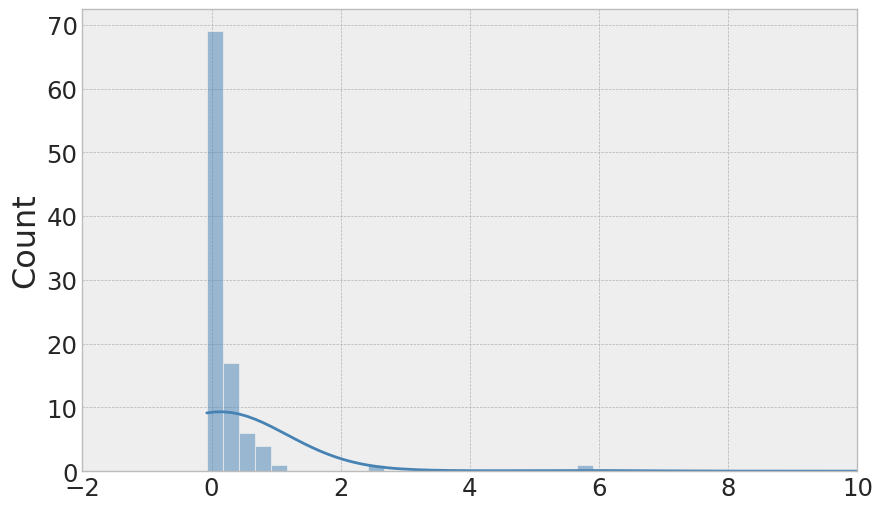

------------------------------
Runs: 1000
Min: -1.61
Max: 98.94
Mean: 0.47
Stddev: 3.45
------------------------------


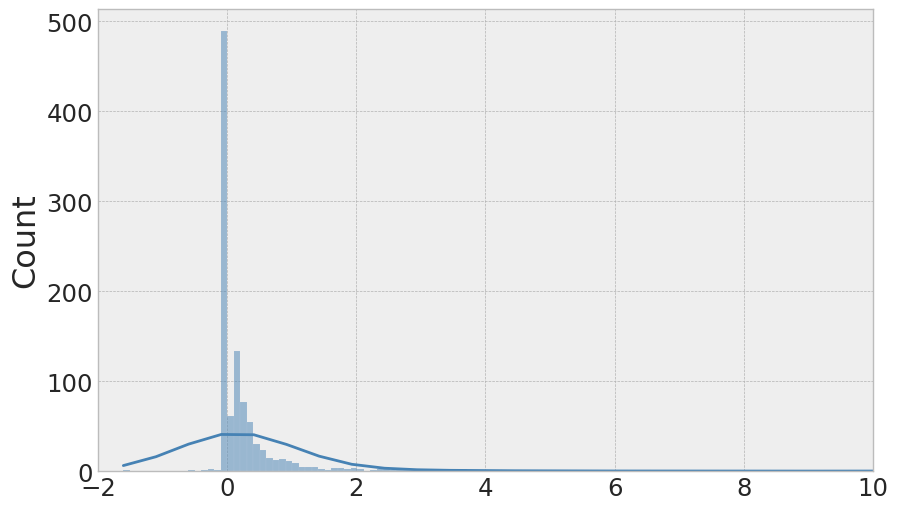

------------------------------
Runs: 10000
Min: -6.93
Max: 10423.90
Mean: 1.62
Stddev: 104.47
------------------------------


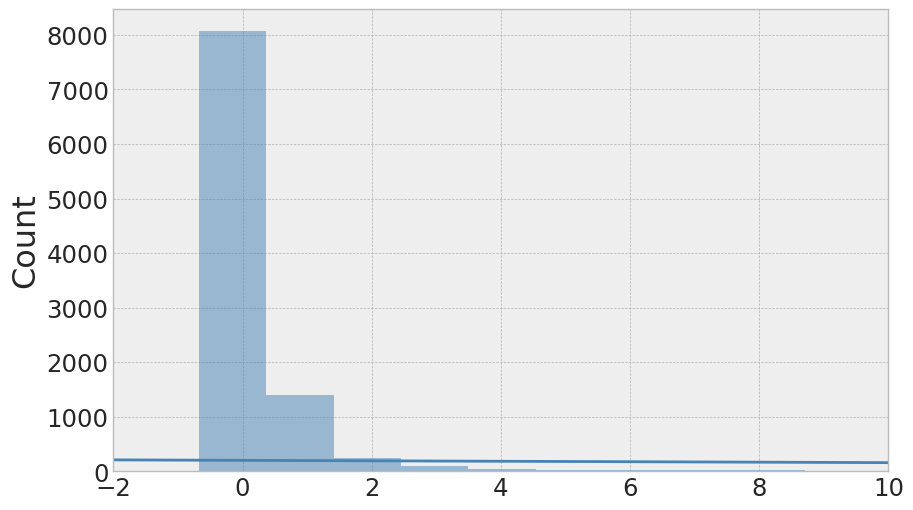

In [164]:
# pdf_compute.R
# Computing a PDF via MC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(19702)


for runs in [10, 100, 1000, 10000]:
    normal_samples = np.random.normal(10, 5, runs)
    poisson_samples = np.random.poisson(0.75, runs)
    uniform_samples = np.random.uniform(0, 100, runs)
    results = (normal_samples * poisson_samples) / uniform_samples

    print("------------------------------")
    print(f"Runs: {runs}")
    print(f"Min: {results.min():.2f}")
    print(f"Max: {results.max():.2f}")
    print(f"Mean: {results.mean():.2f}")
    print(f"Stddev: {results.std():.2f}")
    print("------------------------------")

    binsize = (results.max() - results.min()) / runs
    plt.figure(figsize=(10, 6))
    sns.histplot(results, binwidth=binsize, kde=True, color="steelblue")
    plt.xlim(-2, 10)
    plt.show()
    #plt.savefig(f"mcpdf-{runs}.pdf")


    # Ensure a positive number of bins
    #bins = max(1, int((np.max(results) - np.min(results)) / (runs ** 0.5)))




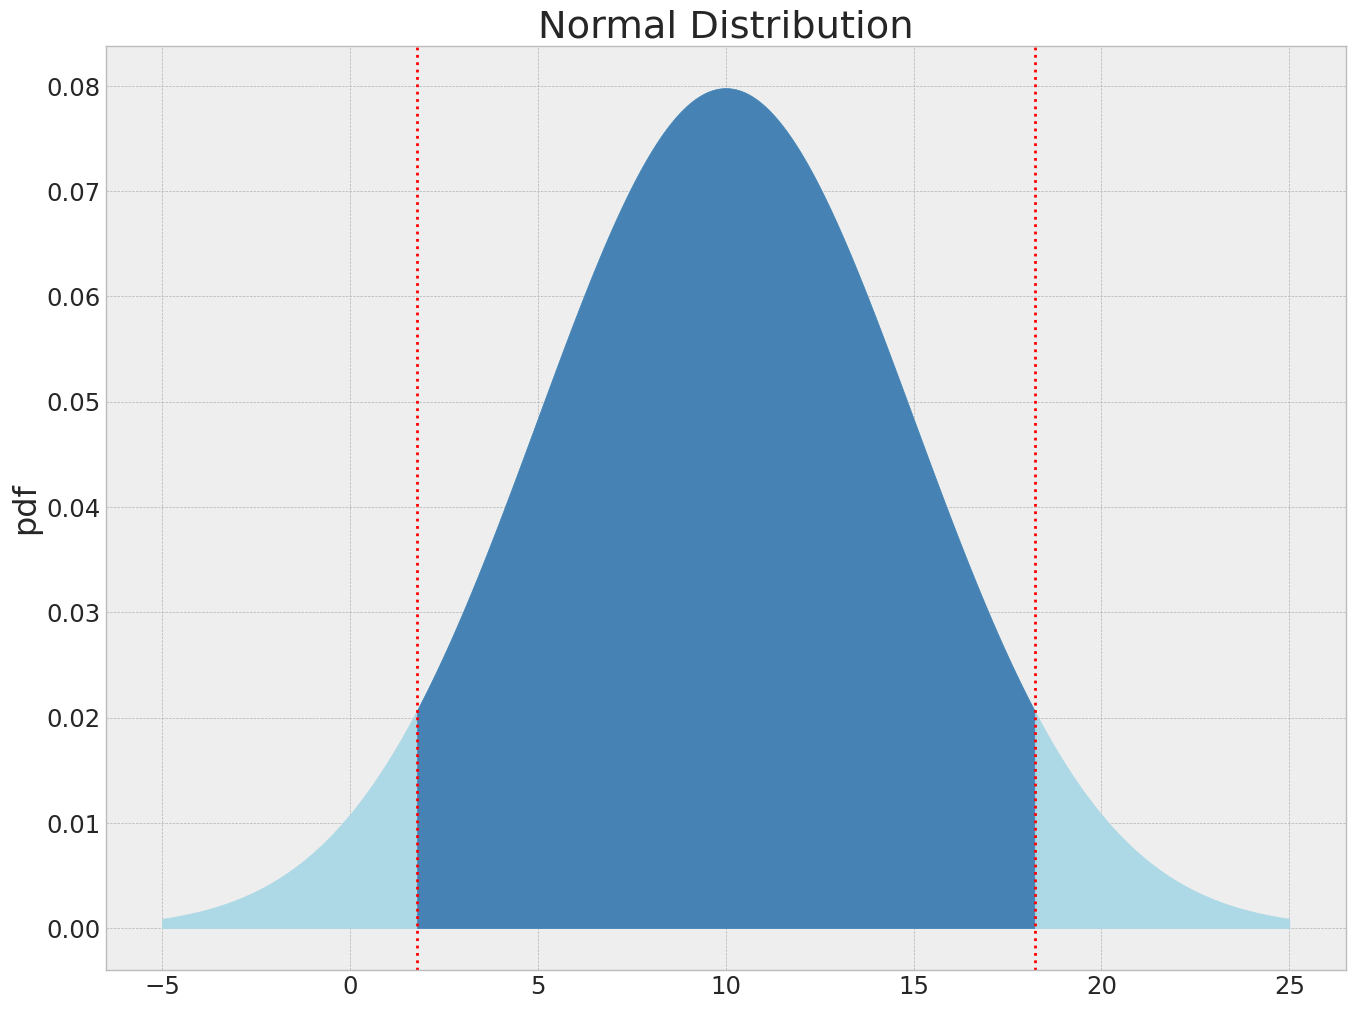

In [165]:
#plot-distro.R
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

mu, stdev = 10, 5
x = np.linspace(-5, 25, 1000)
pdf = norm.pdf(x, mu, stdev)

plt.fill_between(x, pdf, color="lightblue")
plt.fill_between(x, pdf, where=(x > norm.ppf(0.05, mu, stdev)) & (x < norm.ppf(0.95, mu, stdev)), color="steelblue")
plt.axvline(norm.ppf(0.05, mu, stdev), color="red", linestyle="dotted")
plt.axvline(norm.ppf(0.95, mu, stdev), color="red", linestyle="dotted")
plt.ylabel('pdf')
plt.title('Normal Distribution')
plt.savefig('normal.pdf')
plt.show()

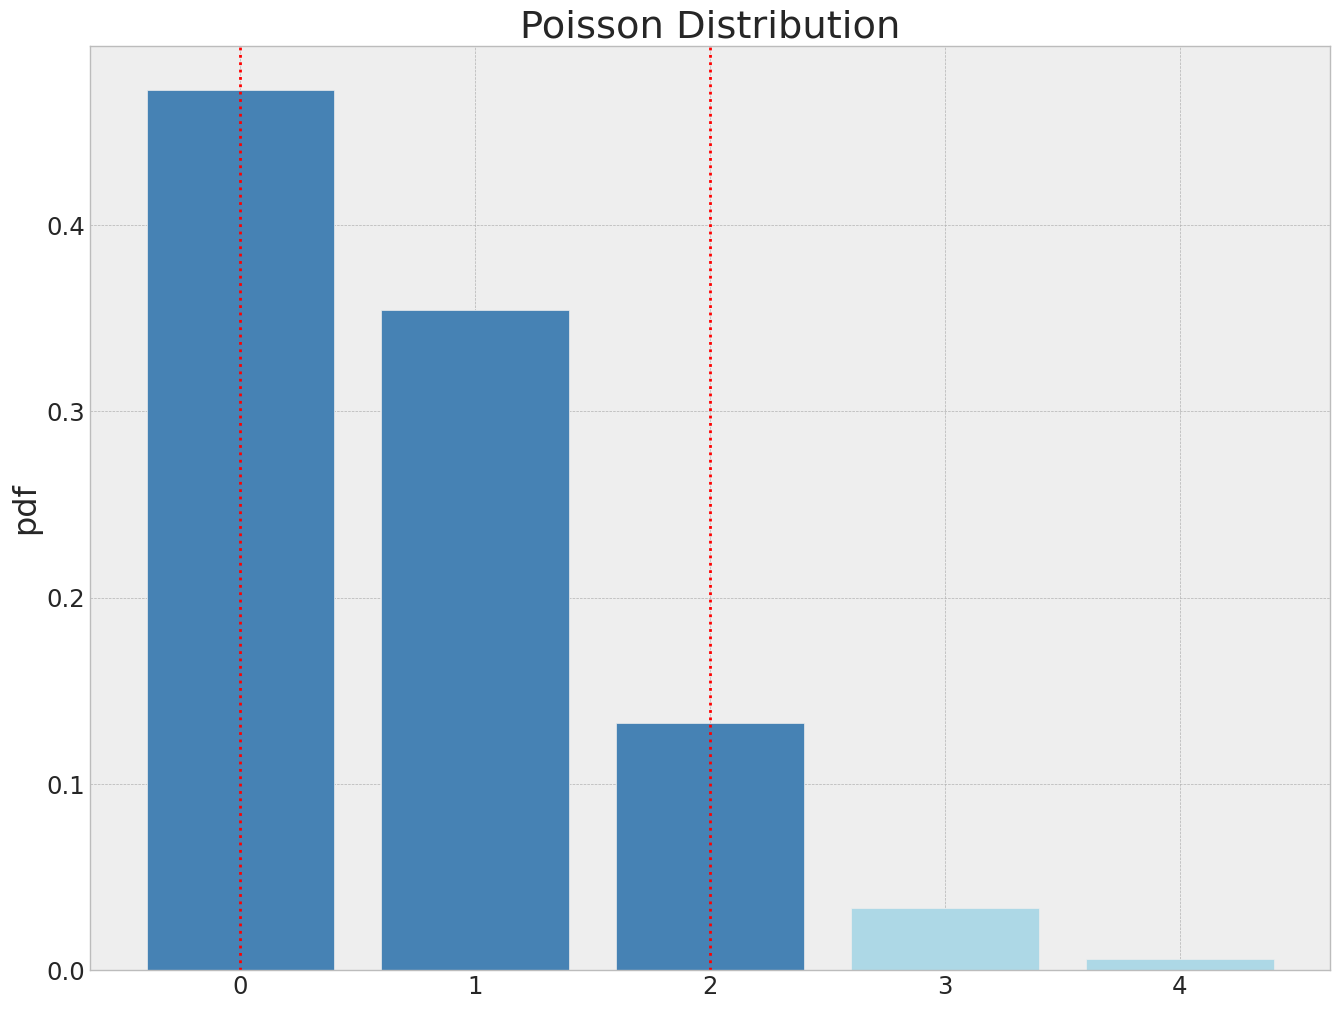

In [166]:
from scipy.stats import poisson

lambda_ = 0.75
x_poisson = np.arange(0, 5)
y_poisson = poisson.pmf(x_poisson, lambda_)

plt.bar(x_poisson, y_poisson, color="lightblue")
plt.bar(x_poisson[:3], y_poisson[:3], color="steelblue")
plt.axvline(poisson.ppf(0.05, lambda_), color="red", linestyle="dotted")
plt.axvline(poisson.ppf(0.95, lambda_), color="red", linestyle="dotted")
plt.ylabel('pdf')
plt.title('Poisson Distribution')
plt.savefig('poisson.pdf')
plt.show()


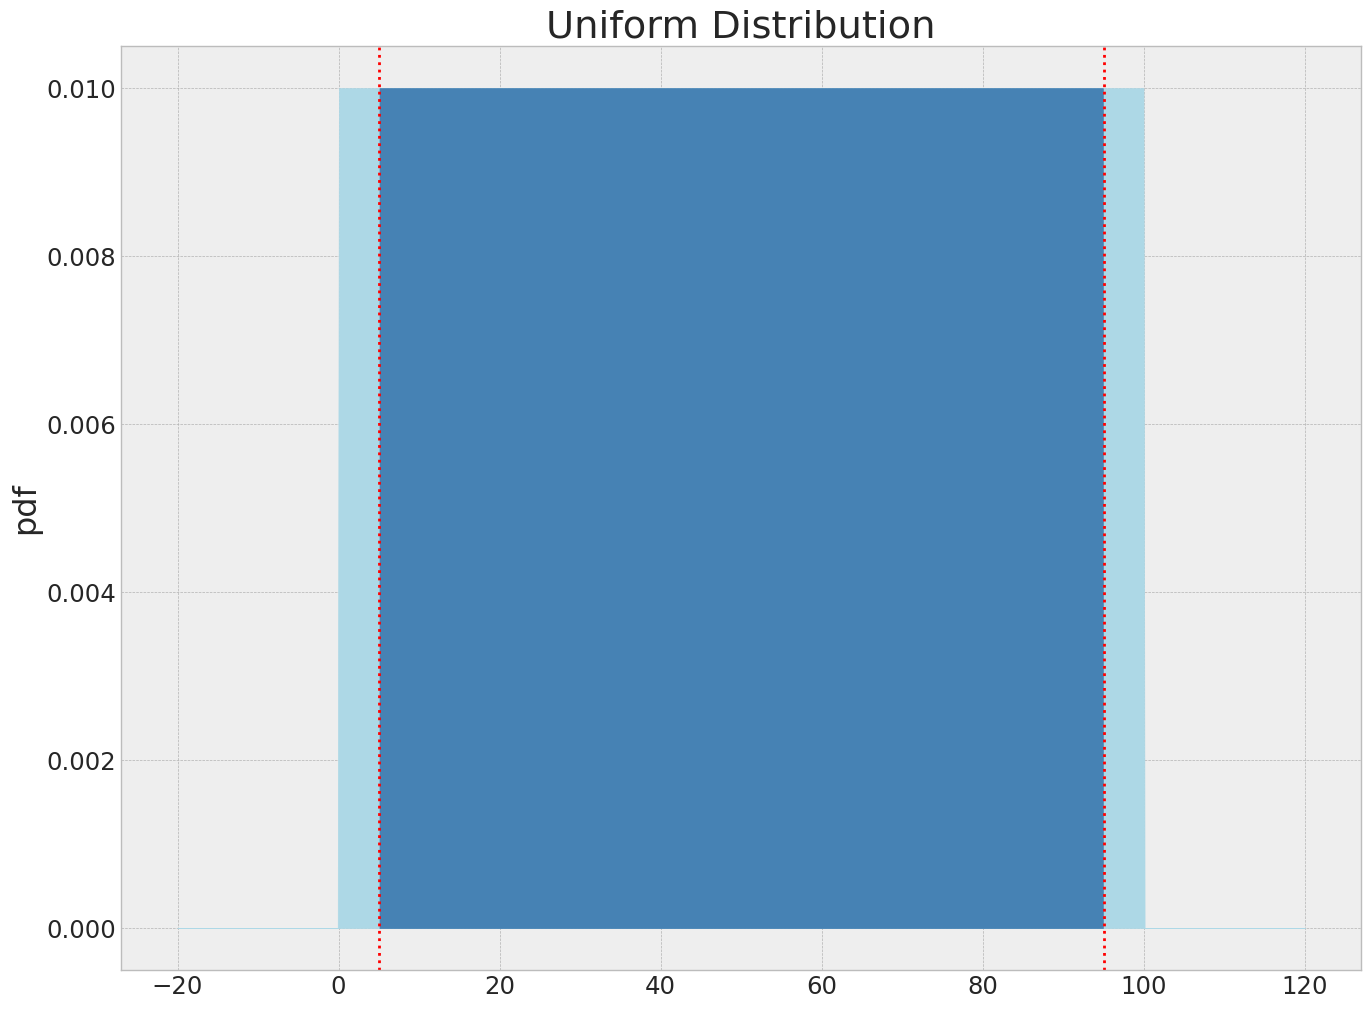

In [167]:
from scipy.stats import uniform

xmin, xmax = 0, 100
x_unif = np.linspace(-20, 120, 1000)
pdf_unif = uniform.pdf(x_unif, xmin, xmax - xmin)

plt.fill_between(x_unif, pdf_unif, color="lightblue")
plt.fill_between(x_unif, pdf_unif, where=(x_unif > xmin + 0.05 * (xmax - xmin)) & (x_unif < xmax - 0.05 * (xmax - xmin)), color="steelblue")
plt.axvline(xmin + 0.05 * (xmax - xmin), color="red", linestyle="dotted")
plt.axvline(xmax - 0.05 * (xmax - xmin), color="red", linestyle="dotted")
plt.ylabel('pdf')
plt.title('Uniform Distribution')
plt.savefig('unif.pdf')
plt.show()

## Lecture 19 - Monte Carlo Exercise
19 Monte-Carlo + sensitivity analysis lab

In [168]:
import pandas as pd
edison_production = pd.read_csv('/content/drive/MyDrive/Coursework/19-702/Resources/Lecture 19 - Monte Carlo Exercise/edison-production.csv', header=0, sep=',')
edison_production

date  manufacturing_cost
0    Jan-07               12441
1    Feb-07               11452
2    Mar-07               14091
3    Apr-07               13182
4    May-07               12245
..      ...                 ...
103  Aug-15               12432
104  Sep-15               10616
105  Oct-15               12906
106  Nov-15               14366
107  Dec-15               13327

[108 rows x 2 columns]

In [169]:
# Question 1
# compute the 10-year NPV


# Setup: Compute the NPV based on fixed points

import numpy as np

def npv(discount_rate, development_cost, initial_market_size, market_growth, market_share, sale_price, manufacturing_cost, horizon, time_to_market, debug):
    # Development costs for years 1 to time_to_market, then 0
    development_costs = np.concatenate((np.full(int(time_to_market), development_cost/time_to_market), np.zeros(horizon - int(time_to_market))))

    # Sales calculation
    sales_times = np.arange(0, horizon - int(time_to_market))
    sales = np.concatenate((np.zeros(int(time_to_market)), market_share * np.full(horizon - int(time_to_market), initial_market_size) * (1 + market_growth)**sales_times))

    sale_prices = np.concatenate((np.zeros(int(time_to_market)), np.full(horizon - int(time_to_market), sale_price)))

    revenue = sales * sale_prices

    manufacturing_costs = np.concatenate((np.zeros(int(time_to_market)), np.full(horizon - int(time_to_market), manufacturing_cost))) * sales

    net_benefit = revenue - (development_costs + manufacturing_costs)

    horizon_times = np.arange(0, horizon)
    npv_vector = net_benefit / ((1 + discount_rate)**horizon_times)

    if debug == 1:
        print("Sales: ", sales)
        print("Sale prices: ", sale_prices)
        print("Revenue: ", revenue)
        print("Development costs: ", development_costs)
        print("Manufacturing costs: ", manufacturing_costs)
        print("Net benefit: ", net_benefit)
        print("NPVs (benefits): ", npv_vector)

    return np.sum(npv_vector)

In [170]:
# Parameters
discount_rate = 0.15
development_cost = 800000000
initial_market_size = 145000
market_growth = 0.05
market_share = 0.45
sale_price = 17500
manufacturing_cost = 13000
horizon = 10
time_to_market = 3.0
debug = 1

# Calculate NPV
answer = npv(discount_rate, development_cost, initial_market_size, market_growth, market_share, sale_price, manufacturing_cost, horizon, time_to_market, debug)
print("NPV: ", answer)


Sales:  [    0.             0.             0.         65250.
 68512.5        71938.125      75535.03125    79311.7828125
 83277.37195313 87441.24055078]
Sale prices:  [    0.     0.     0. 17500. 17500. 17500. 17500. 17500. 17500. 17500.]
Revenue:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.14187500e+09
 1.19896875e+09 1.25891719e+09 1.32186305e+09 1.38795620e+09
 1.45735401e+09 1.53022171e+09]
Development costs:  [2.66666667e+08 2.66666667e+08 2.66666667e+08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Manufacturing costs:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.48250000e+08
 8.90662500e+08 9.35195625e+08 9.81955406e+08 1.03105318e+09
 1.08260584e+09 1.13673613e+09]
Net benefit:  [-2.66666667e+08 -2.66666667e+08 -2.66666667e+08  2.93625000e+08
  3.08306250e+08  3.23721562e+08  3.39907641e+08  3.56903023e+08
  3.74748174e+08  3.93485582e+08]
NPVs (benefits):  [-2.66666667e+08 -2.31884058e+08 -2.01638311e+08  1

In [69]:
# Question 2
# Sensitivity analysis

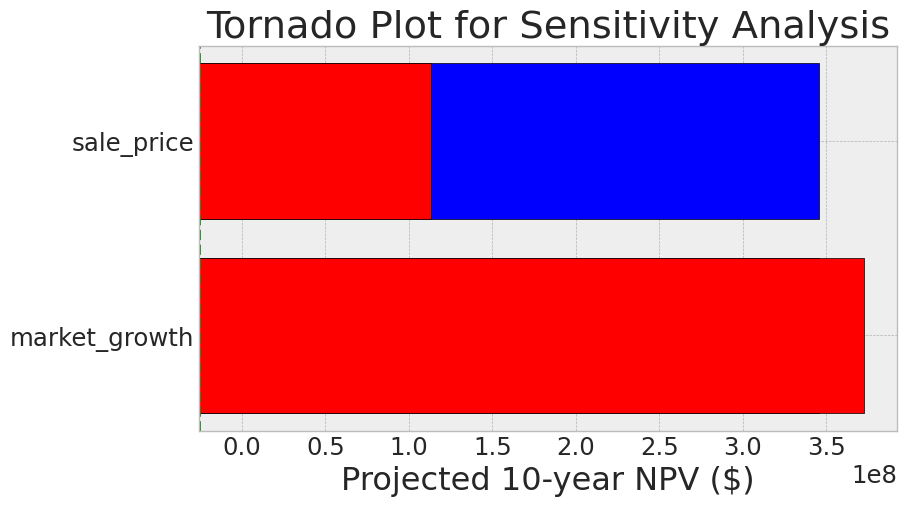

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Setup: Compute the NPV based on fixed points

# NPV Function
def npv(discount_rate, development_cost, initial_market_size, market_growth, market_share, sale_price, manufacturing_cost, horizon, time_to_market, debug=False):
    development_costs = np.concatenate((np.full(time_to_market, development_cost/time_to_market), np.zeros(horizon-time_to_market)))
    sales_times = np.arange(0, horizon-time_to_market)

    # Ensure market_growth is a single value
    if isinstance(market_growth, (list, np.ndarray)):
        raise ValueError("market_growth must be a single value, not a list or array.")

    sales = np.concatenate((np.zeros(time_to_market), market_share * initial_market_size * (1+market_growth)**sales_times))
    sale_prices = np.concatenate((np.zeros(time_to_market), np.full(horizon-time_to_market, sale_price)))
    revenue = sales * sale_prices
    manufacturing_costs = np.concatenate((np.zeros(time_to_market), np.full(horizon-time_to_market, manufacturing_cost))) * sales
    net_benefit = revenue - (development_costs + manufacturing_costs)
    npv_vector = net_benefit / ((1 + discount_rate)**np.arange(horizon))

    if debug:
        print("Sales:", sales, "Sale prices:", sale_prices, "Revenue:", revenue, "Development costs:", development_costs, "Manufacturing costs:", manufacturing_costs, "Net benefit:", net_benefit, "NPVs (benefits):", npv_vector)

    return npv_vector.sum()


def sensitivity_analysis(base_params, variable_params, npv_function):
    results = {}
    for param, values in variable_params.items():
        results[param] = []
        for value in values:
            temp_params = base_params.copy()
            temp_params[param] = value
            result = npv_function(**temp_params)
            results[param].append(result)
    return results

# Sensitivity analysis parameters
sensitivity_params = {
    'market_growth': [0.06, 0.05],
    'sale_price': [16500, 17500]
    # Additional parameters can be added as needed
}

params = {
    'discount_rate': 0.15,
    'development_cost': 800000000,
    'initial_market_size': 145000,
    'market_growth': 0.05,
    'market_share': 0.45,
    'sale_price': 17500,
    'manufacturing_cost': 13000,
    'horizon': 10,
    'time_to_market': 3,
    'debug': False
}

# Assuming sensitivity_results is obtained from the sensitivity_analysis function
sensitivity_results = sensitivity_analysis(params, sensitivity_params, npv)

# Convert results to DataFrame for plotting
tornado_data = pd.DataFrame(sensitivity_results, index=["Lower", "Upper"]).T
tornado_data['Range'] = tornado_data['Upper'] - tornado_data['Lower']
tornado_data = tornado_data.sort_values(by='Range', ascending=False)

# Create the Tornado Plot
fig, ax = plt.subplots(figsize=(9, 5))

# Plotting each parameter's impact
for index, row in tornado_data.iterrows():
    ax.barh(index, row['Upper'] - base_npv, color='blue', edgecolor='black', left=base_npv)
    ax.barh(index, row['Lower'] - base_npv, color='red', edgecolor='black', left=base_npv)

ax.axvline(x=base_npv, color='green', linestyle='--') # Base case line
ax.set_yticks(range(len(tornado_data)))
ax.set_yticklabels(tornado_data.index)
ax.set_xlabel('Projected 10-year NPV ($)')
ax.invert_yaxis()  # Largest range at the top
plt.title('Tornado Plot for Sensitivity Analysis')
plt.show()




# Calculate base NPV
base_npv = npv(**params)

# Sensitivity analysis parameters
sensitivity_params = {
    'market_growth': [0.06, 0.05],
    'sale_price': [16500, 17500]
    # Add more parameters as needed
}


# Corrected Sensitivity Analysis Call
sensitivity_results = sensitivity_analysis(params, sensitivity_params, npv)


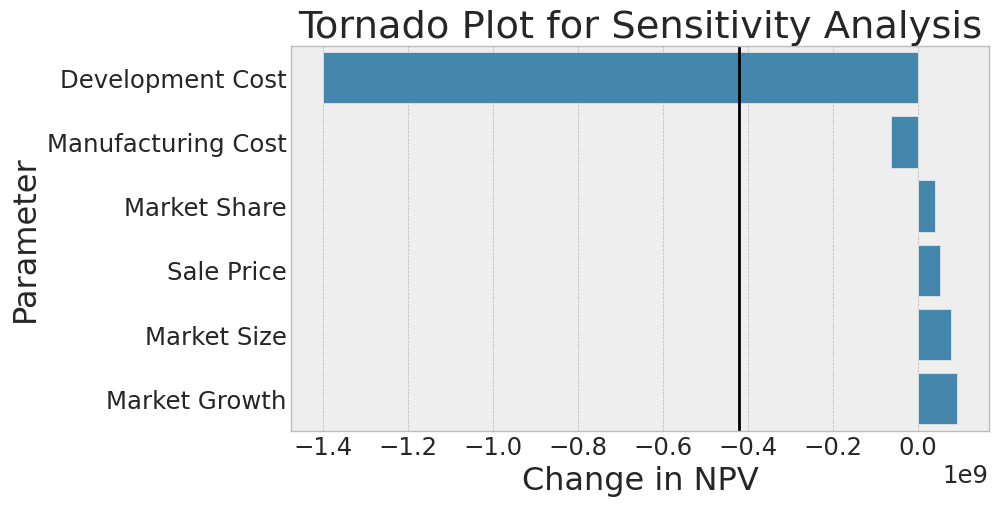

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assumed NPV calculation function
def npv(discount_rate, development_cost, market_size, market_growth, market_share, sale_price, manufacturing_cost, horizon, time_to_market, debug):
    # Sample NPV calculation - this should be replaced with the actual formula
    cash_flows = [(market_size * market_growth * market_share * (sale_price - manufacturing_cost)) for _ in range(horizon)]
    discounted_cash_flows = [cf / (1 + discount_rate) ** (year + time_to_market) for year, cf in enumerate(cash_flows)]
    return np.sum(discounted_cash_flows) - development_cost

# Parameters
debug = 0
discount_rate = 0.05 # Example value
development_cost = 500e6 # Example value
initial_market_size = 100000 # Example value
market_growth = 0.06
market_share = 0.4 # Example value
sale_price = 16500
manufacturing_cost = 12000 # Example value
horizon = 10 # Example value
time_to_market = 2 # Example value

# Base case calculation
base_case = npv(discount_rate, development_cost, initial_market_size, market_growth, market_share, sale_price, manufacturing_cost, horizon, time_to_market, debug)

# Sensitivity analysis
parameters = {
    "Development Cost": (300e6, 1.7e9),
    "Market Growth": (0.01, 0.08),
    "Market Size": (95000, 195000),
    "Market Share": (0.3, 0.5),
    "Sale Price": (16000, 19000),
    "Manufacturing Cost": (11000, 14500)
}

tornado_data = []

for param, (low, high) in parameters.items():
    low_val = npv(discount_rate, low if param == "Development Cost" else development_cost,
                  initial_market_size if param != "Market Size" else low,
                  market_growth if param != "Market Growth" else low,
                  market_share if param != "Market Share" else low,
                  sale_price if param != "Sale Price" else low,
                  manufacturing_cost if param != "Manufacturing Cost" else low,
                  horizon, time_to_market, debug)

    high_val = npv(discount_rate, high if param == "Development Cost" else development_cost,
                   initial_market_size if param != "Market Size" else high,
                   market_growth if param != "Market Growth" else high,
                   market_share if param != "Market Share" else high,
                   sale_price if param != "Sale Price" else high,
                   manufacturing_cost if param != "Manufacturing Cost" else high,
                   horizon, time_to_market, debug)

    tornado_data.append([param, low_val, high_val, high_val - low_val])

tornado_df = pd.DataFrame(tornado_data, columns=["Parameter", "Lower", "Upper", "Range"])
tornado_df = tornado_df.sort_values(by="Range")

# Plotting
plt.figure(figsize=(9, 5))
sns.barplot(x="Range", y="Parameter", data=tornado_df, orient='h')
plt.axvline(x=base_case, color='k', linestyle='-')
plt.xlabel("Change in NPV")
plt.title("Tornado Plot for Sensitivity Analysis")
plt.savefig("edison-tornado.pdf")
plt.show()


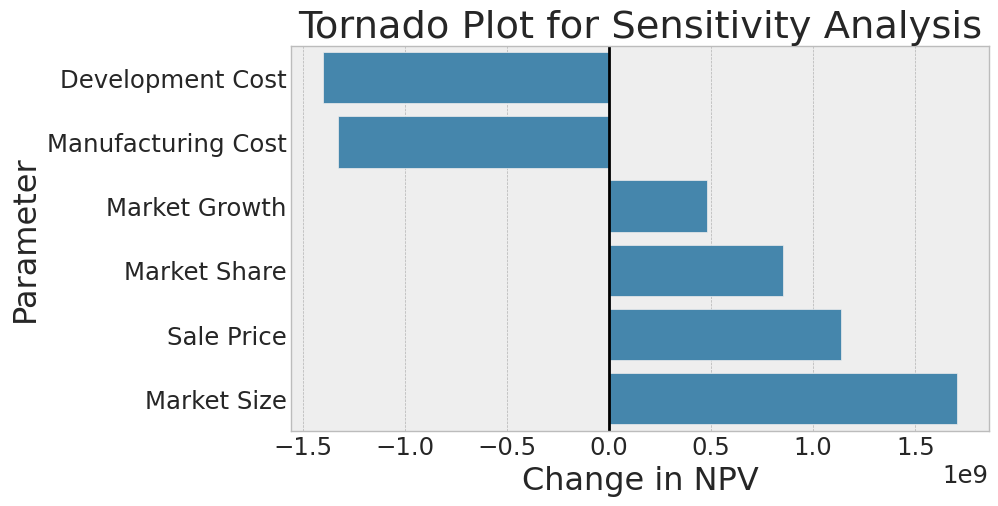

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def npv(discount_rate, development_cost, market_size, market_growth, market_share, sale_price, manufacturing_cost, horizon, time_to_market, debug):
    npv_value = 0
    for year in range(horizon):
        annual_sales = market_size * ((1 + market_growth) ** year)
        annual_revenue = annual_sales * market_share * sale_price
        annual_cost = annual_sales * market_share * manufacturing_cost
        annual_cash_flow = annual_revenue - annual_cost
        discounted_cash_flow = annual_cash_flow / ((1 + discount_rate) ** (year + time_to_market))
        npv_value += discounted_cash_flow
    return npv_value - development_cost

# Parameters
debug = 0
market_growth = 0.06  # updated parameter
sale_price = 16500    # updated parameter


# Sensitivity analysis
development_cost_low, development_cost_high = 300e6, 1.7e9
market_growth_low, market_growth_high = 0.01, 0.08
market_size_low, market_size_high = 95000, 195000
market_share_low, market_share_high = 0.3, 0.5
sale_price_low, sale_price_high = 16000, 19000
manufacturing_cost_low, manufacturing_cost_high = 11000, 14500

# Perform sensitivity analysis for each parameter
vary_development_cost = [npv(discount_rate, development_cost_low, initial_market_size, market_growth, market_share, sale_price, manufacturing_cost, horizon, time_to_market, debug),
                         npv(discount_rate, development_cost_high, initial_market_size, market_growth, market_share, sale_price, manufacturing_cost, horizon, time_to_market, debug)]

vary_market_growth = [npv(discount_rate, development_cost, initial_market_size, market_growth_low, market_share, sale_price, manufacturing_cost, horizon, time_to_market, debug),
                      npv(discount_rate, development_cost, initial_market_size, market_growth_high, market_share, sale_price, manufacturing_cost, horizon, time_to_market, debug)]

vary_market_size = [npv(discount_rate, development_cost, market_size_low, market_growth, market_share, sale_price, manufacturing_cost, horizon, time_to_market, debug),
                    npv(discount_rate, development_cost, market_size_high, market_growth, market_share, sale_price, manufacturing_cost, horizon, time_to_market, debug)]

vary_market_share = [npv(discount_rate, development_cost, initial_market_size, market_growth, market_share_low, sale_price, manufacturing_cost, horizon, time_to_market, debug),
                     npv(discount_rate, development_cost, initial_market_size, market_growth, market_share_high, sale_price, manufacturing_cost, horizon, time_to_market, debug)]

vary_sale_price = [npv(discount_rate, development_cost, initial_market_size, market_growth, market_share, sale_price_low, manufacturing_cost, horizon, time_to_market, debug),
                   npv(discount_rate, development_cost, initial_market_size, market_growth, market_share, sale_price_high, manufacturing_cost, horizon, time_to_market, debug)]

vary_manufacturing_cost = [npv(discount_rate, development_cost, initial_market_size, market_growth, market_share, sale_price, manufacturing_cost_low, horizon, time_to_market, debug),
                           npv(discount_rate, development_cost, initial_market_size, market_growth, market_share, sale_price, manufacturing_cost_high, horizon, time_to_market, debug)]

# Prepare data for tornado plot
tornado_data = pd.DataFrame({
    "Parameter": ["Development Cost", "Market Growth", "Market Size", "Market Share", "Sale Price", "Manufacturing Cost"],
    "Lower": [vary_development_cost[0], vary_market_growth[0], vary_market_size[0], vary_market_share[0], vary_sale_price[0], vary_manufacturing_cost[0]],
    "Upper": [vary_development_cost[1], vary_market_growth[1], vary_market_size[1], vary_market_share[1], vary_sale_price[1], vary_manufacturing_cost[1]]
})
tornado_data["Range"] = tornado_data["Upper"] - tornado_data["Lower"]

# Sorting and plotting
tornado_data = tornado_data.sort_values(by="Range", ascending=True)
plt.figure(figsize=(9, 5))
sns.barplot(x="Range", y="Parameter", data=tornado_data, orient='h')
plt.axvline(x=0, color='k', linestyle='-')  # Replace 0 with the base case NPV value
plt.xlabel("Change in NPV")
plt.title("Tornado Plot for Sensitivity Analysis")
plt.savefig("edison-tornado.pdf")
plt.show()

In [174]:
tornado_data = pd.DataFrame({
    'param': ['Development cost', 'Market growth', 'Initial market size', 'Market share', 'Sale price', 'Manufacturing cost'],
    'lower': np.array([vary_development_cost[0], vary_market_growth[0], vary_market_size[0], vary_market_share[0], vary_sale_price[0], vary_manufacturing_cost[0]]),
    'upper': np.array([vary_development_cost[1], vary_market_growth[1], vary_market_size[1], vary_market_share[1], vary_sale_price[1], vary_manufacturing_cost[1]])
})
tornado_data['range'] = tornado_data['upper'] - tornado_data['lower']

print(tornado_data)

                 param         lower         upper         range
0     Development cost  1.404431e+09  4.430903e+06 -1.400000e+09
1        Market growth  8.793907e+08  1.359387e+09  4.799960e+08
2  Initial market size  1.119209e+09  2.823640e+09  1.704431e+09
3         Market share  7.783232e+08  1.630539e+09  8.522155e+08
4           Sale price  1.015050e+09  2.151337e+09  1.136287e+09
5   Manufacturing cost  1.583193e+09  2.575248e+08 -1.325668e+09


In [175]:
import matplotlib.pyplot as plt

# Sort parameters by absolute range for optimal plot layout
ordered_params = tornado_data.sort_values(by='range', ascending=False)['param'].tolist()
ordered_params

['Initial market size',
 'Sale price',
 'Market share',
 'Market growth',
 'Manufacturing cost',
 'Development cost']

In [176]:
num_bars = len(ordered_params)
bar_width = 0.9
spacing = 0.1  # Adjust as needed
total_width = num_bars * bar_width + (num_bars - 1) * spacing
xmin = i * (bar_width + spacing) - total_width / 2

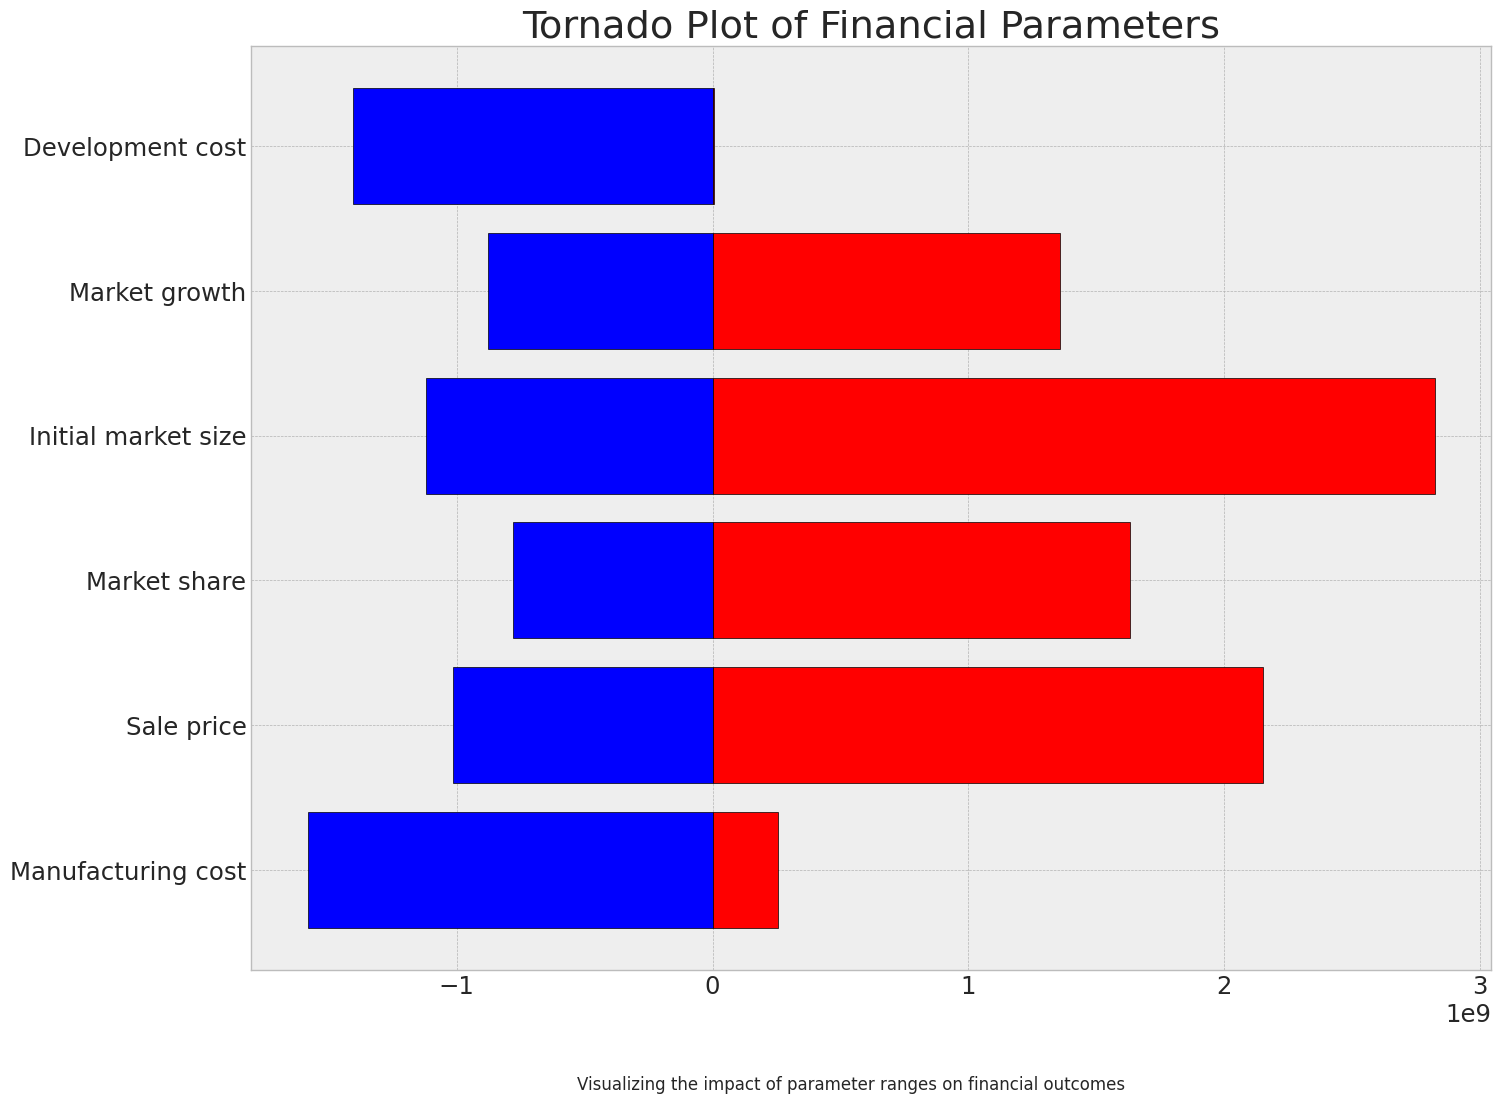

In [177]:
import matplotlib.pyplot as plt
import numpy as np

def create_tornado_plot(param_names, min_values, max_values, title, caption, middle_value=None, filename=None):
    # Determine number of parameters
    num_params = len(param_names)

    # Set middle values if not provided
    if middle_value is None:
        middle_value = np.zeros(num_params)

    # Create figure and axis
    fig, ax = plt.subplots()

    # Calculate differences for plotting
    left_values = middle_value - min_values
    right_values = max_values - middle_value

    # Create bars
    y_positions = np.arange(num_params)
    ax.barh(y_positions, left_values, color='blue', edgecolor='black', align='center', left=middle_value)
    ax.barh(y_positions, right_values, color='red', edgecolor='black', align='center', left=middle_value)

    # Add labels and title
    ax.set_yticks(y_positions)
    ax.set_yticklabels(param_names)
    ax.invert_yaxis()  # labels read top-to-bottom
    #ax.set_xlabel('Value')
    ax.set_title(title)
    plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)

    # Save plot if filename is provided
    if filename:
        plt.savefig(filename)

    plt.show()

# Extract data from the tornado_data DataFrame
param_names = tornado_data['param'].tolist()
lower_values = tornado_data['lower'].tolist()
upper_values = tornado_data['upper'].tolist()

# Create the tornado plot
title = "Tornado Plot of Financial Parameters"
caption = "Visualizing the impact of parameter ranges on financial outcomes"
create_tornado_plot(param_names, lower_values, upper_values, title, caption)


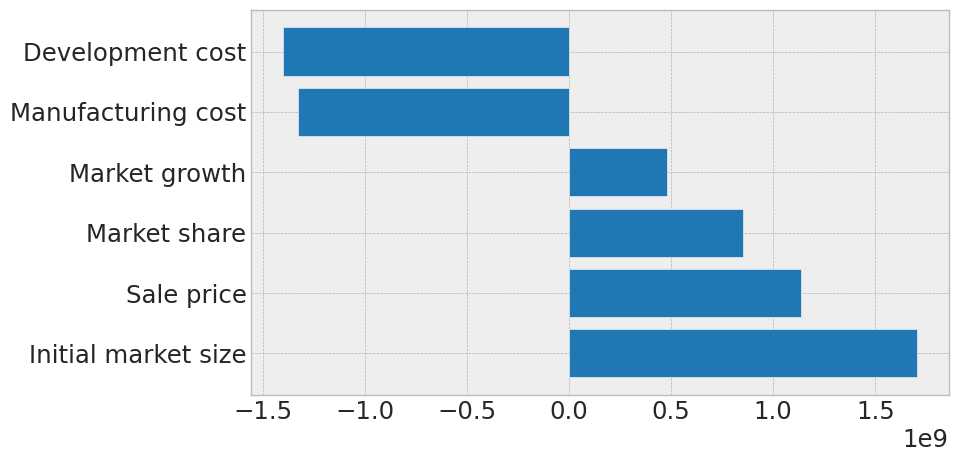

In [178]:
from matplotlib import cm

num_params = len(ordered_params)
cmap = cm.get_cmap('tab20')  # Choose desired colormap
palette = cmap(np.linspace(0, 1, num_params))  # Generate color list from cmap

colors = ['red', 'blue', 'green', 'orange', 'purple']  # Define your desired colours
palette = colors[:num_params]  # Ensure enough colours for all parameters


# Sort parameters by absolute range for optimal plot layout
ordered_params = tornado_data.sort_values(by='range', ascending=False)['param'].tolist()

fig, ax = plt.subplots(figsize=(9, 5))

# Create color palette (using a Matplotlib colormap for this example)
num_params = len(ordered_params)
cmap = plt.cm.tab20  # Access colormap directly to avoid deprecation warning
palette = cmap(np.linspace(0, 1, num_params))  # Generate color list

# Create horizontal bars for each parameter variation
for i, param in enumerate(ordered_params):
    param_data = tornado_data[tornado_data['param'] == param]
    upper_values = param_data['upper'].values
    lower_values = param_data['lower'].values
    ranges = upper_values - lower_values

    # Calculate bar positions and widths
    num_bars = len(upper_values)
    bar_width = 0.8
    spacing = 0.1
    total_width = num_bars * bar_width + (num_bars - 1) * spacing
    base_xmin = i * (total_width + spacing) - total_width / 2
    xmins = [base_xmin + j * (bar_width + spacing) for j in range(num_bars)]

    # Create individual bars with colors, addressing multiple values
    for range_value, xmin, color in zip(ranges, xmins, palette[:num_bars]):  # Slice palette for correct length
        ax.barh(param, range_value, left=xmin, label=param, color=color)

1510.0549990278807
795.53701160791
0.98405


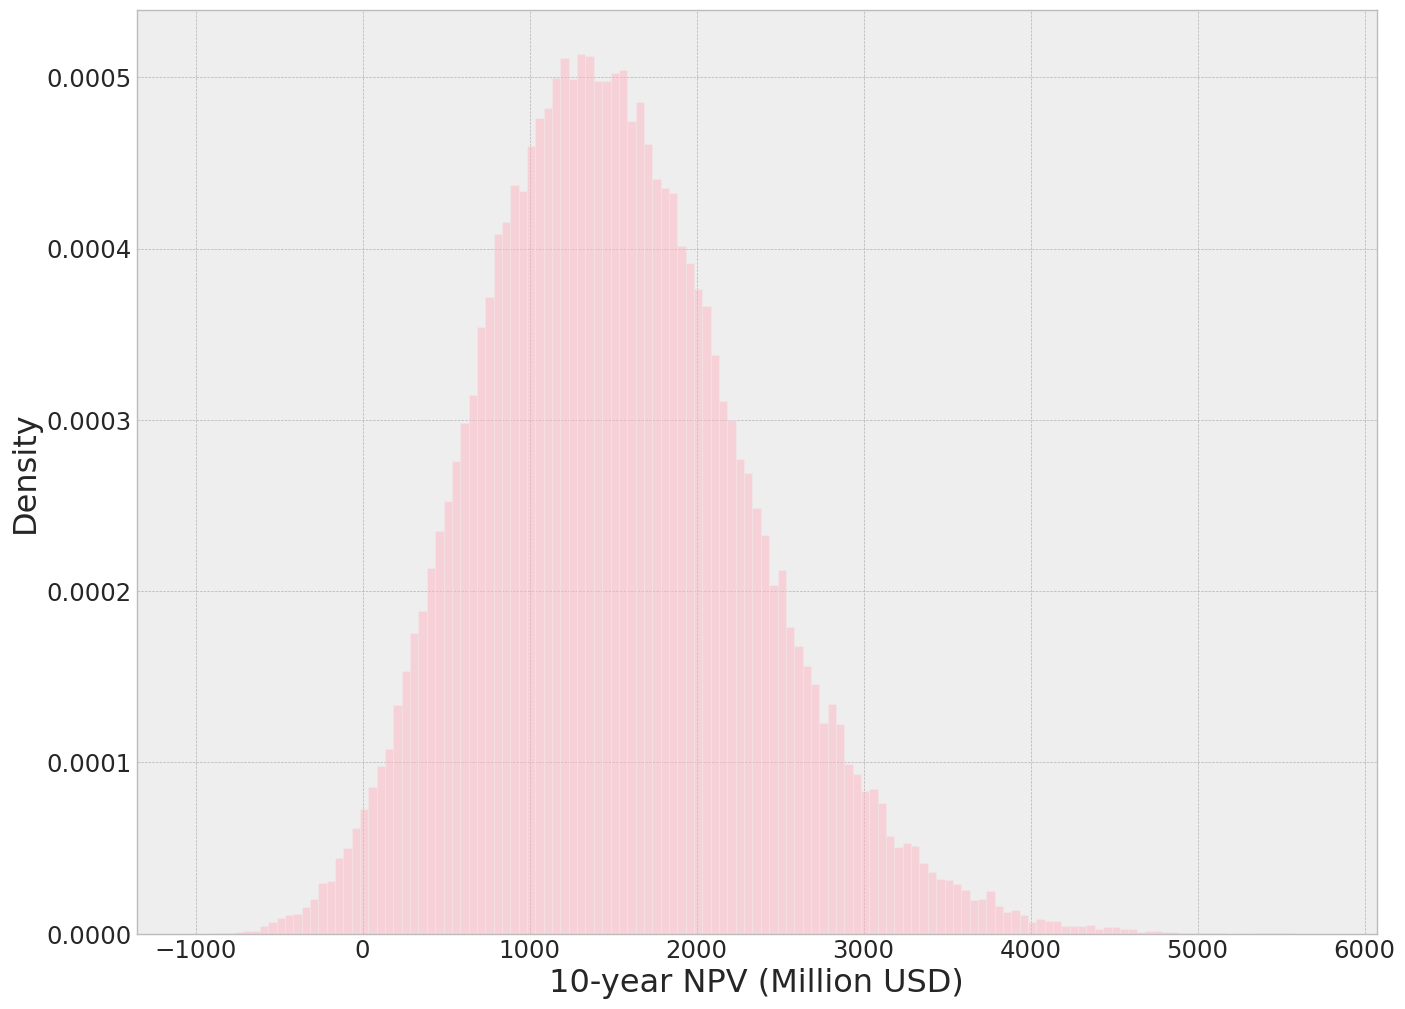

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, triang

# Set the number of runs and random seed
nr_runs = 100000
np.random.seed(19702)

# Define the parameters for the triangular and normal distributions
development_cost = triang.rvs(c=0.25, loc=300e6, scale=(1.7e9 - 300e6), size=nr_runs)
initial_market_size = norm.rvs(loc=145000, scale=25000, size=nr_runs)
market_growth = triang.rvs(c=0.6667, loc=0.01, scale=(0.08 - 0.01), size=nr_runs)
market_share = triang.rvs(c=0.25, loc=0.3, scale=(0.5 - 0.3), size=nr_runs)
sale_price = triang.rvs(c=0.1, loc=16000, scale=(19000 - 16000), size=nr_runs)
manufacturing_cost = triang.rvs(c=0.1538, loc=11000, scale=(14500 - 11000), size=nr_runs)

win = 0
result_array = []

for i in range(nr_runs):
    result = npv(discount_rate, development_cost[i], initial_market_size[i], market_growth[i], market_share[i], sale_price[i], manufacturing_cost[i], horizon, time_to_market, debug)
    if result > 0:
        win += 1
    result_array.append(result)

mean_npv = np.mean(result_array) / 1000000
std_npv = np.std(result_array) / 1000000
print(mean_npv)
print(std_npv)

# Plot the histogram
plt.hist(np.array(result_array) / 1000000, bins=range(int(min(result_array) / 1000000), int(max(result_array) / 1000000) + 1, 50), density=True, color='lightpink', alpha=0.5)
plt.xlabel('10-year NPV (Million USD)')
plt.ylabel('Density')

# Calculate and print the probability of winning
proba_win = win / nr_runs
print(proba_win)


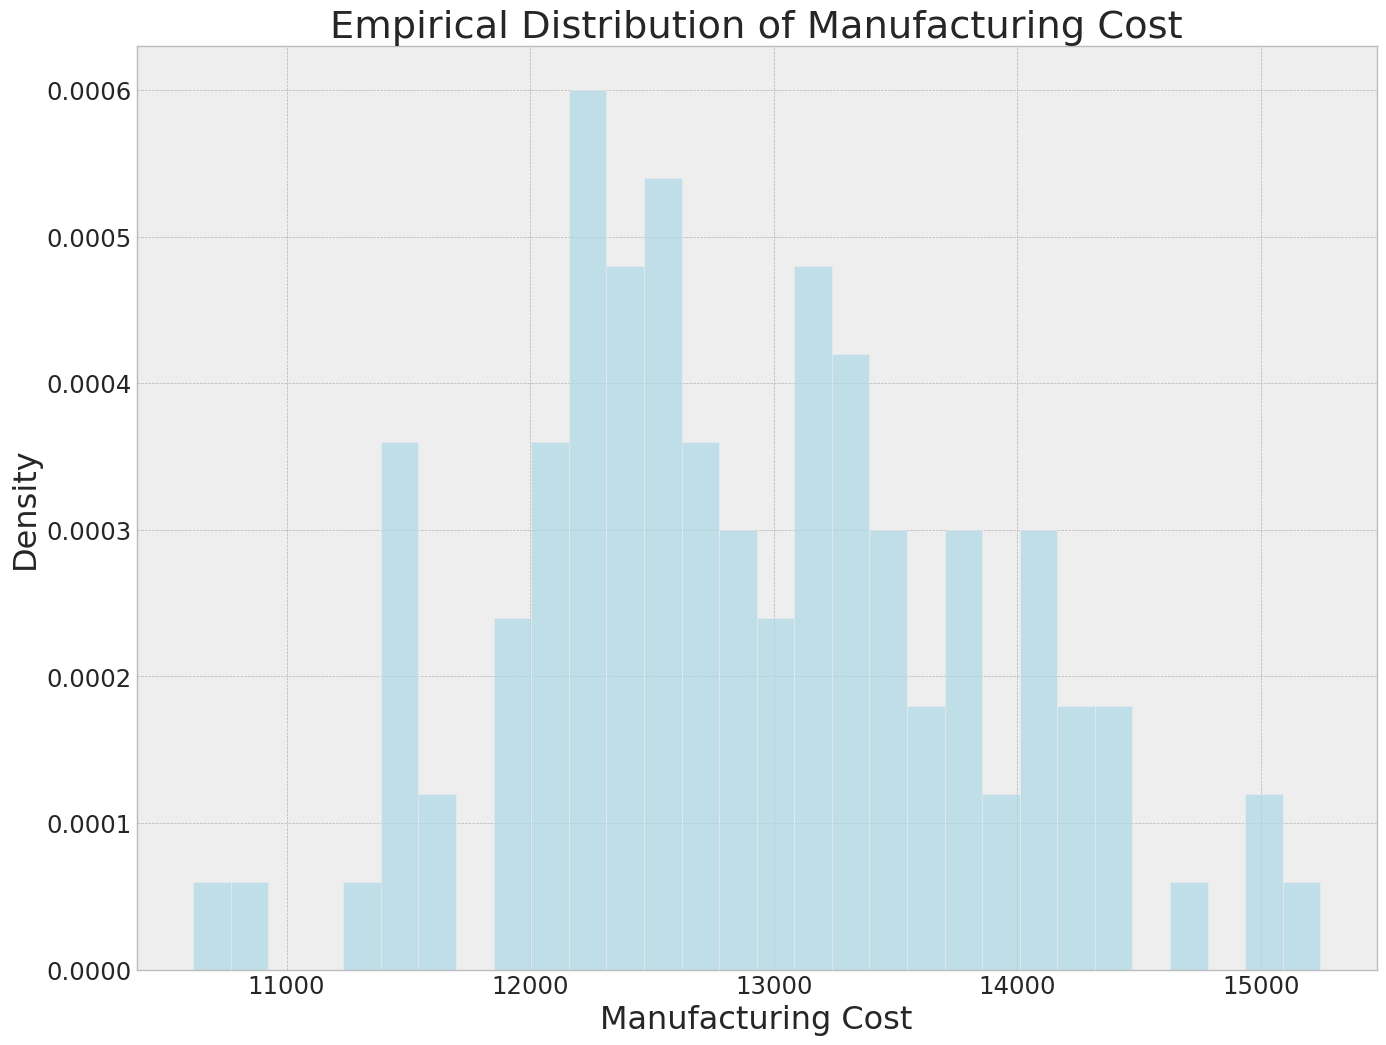

Kolmogorov-Smirnov Test:
KS Statistic: 0.42221148148148147
KS p-value: 5.6669280552973026e-18


In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
import pandas as pd
from scipy.stats import norm
from scipy.stats import kstest
from sklearn.neighbors import KernelDensity


# Load the data from CSV
edison_data = pd.read_csv('/content/drive/MyDrive/Coursework/19-702/Resources/Lecture 19 - Monte Carlo Exercise/edison-production.csv', header=0, sep=',')


# Extract manufacturing cost from the data
manufacturing_cost_empirical = edison_data['manufacturing_cost']

# Plot the empirical distribution using a histogram
plt.figure()
plt.hist(manufacturing_cost_empirical, bins=30, density=True, color='lightblue', alpha=0.7)
plt.xlabel('Manufacturing Cost')
plt.ylabel('Density')
plt.title('Empirical Distribution of Manufacturing Cost')
#plt.savefig('edison-emp.pdf')
#plt.close()
plt.show()

# Fit a kernel density estimate (KDE) to the data
kde = KernelDensity(bandwidth=10000, kernel='gaussian')
kde.fit(manufacturing_cost_empirical.values.reshape(-1, 1))

# Generate data points from the KDE
manufacturing_cost_samples = kde.sample(nr_runs)
manufacturing_cost_samples = manufacturing_cost_samples.reshape(-1)

# Perform the Kolmogorov-Smirnov test to assess goodness of fit
ks_stat, ks_p_value = kstest(manufacturing_cost_empirical, manufacturing_cost_samples)

# Print the results of the Kolmogorov-Smirnov test
print("Kolmogorov-Smirnov Test:")
print("KS Statistic:", ks_stat)
print("KS p-value:", ks_p_value)

In [181]:
manufacturing_cost_empirical = edison_data['manufacturing_cost']

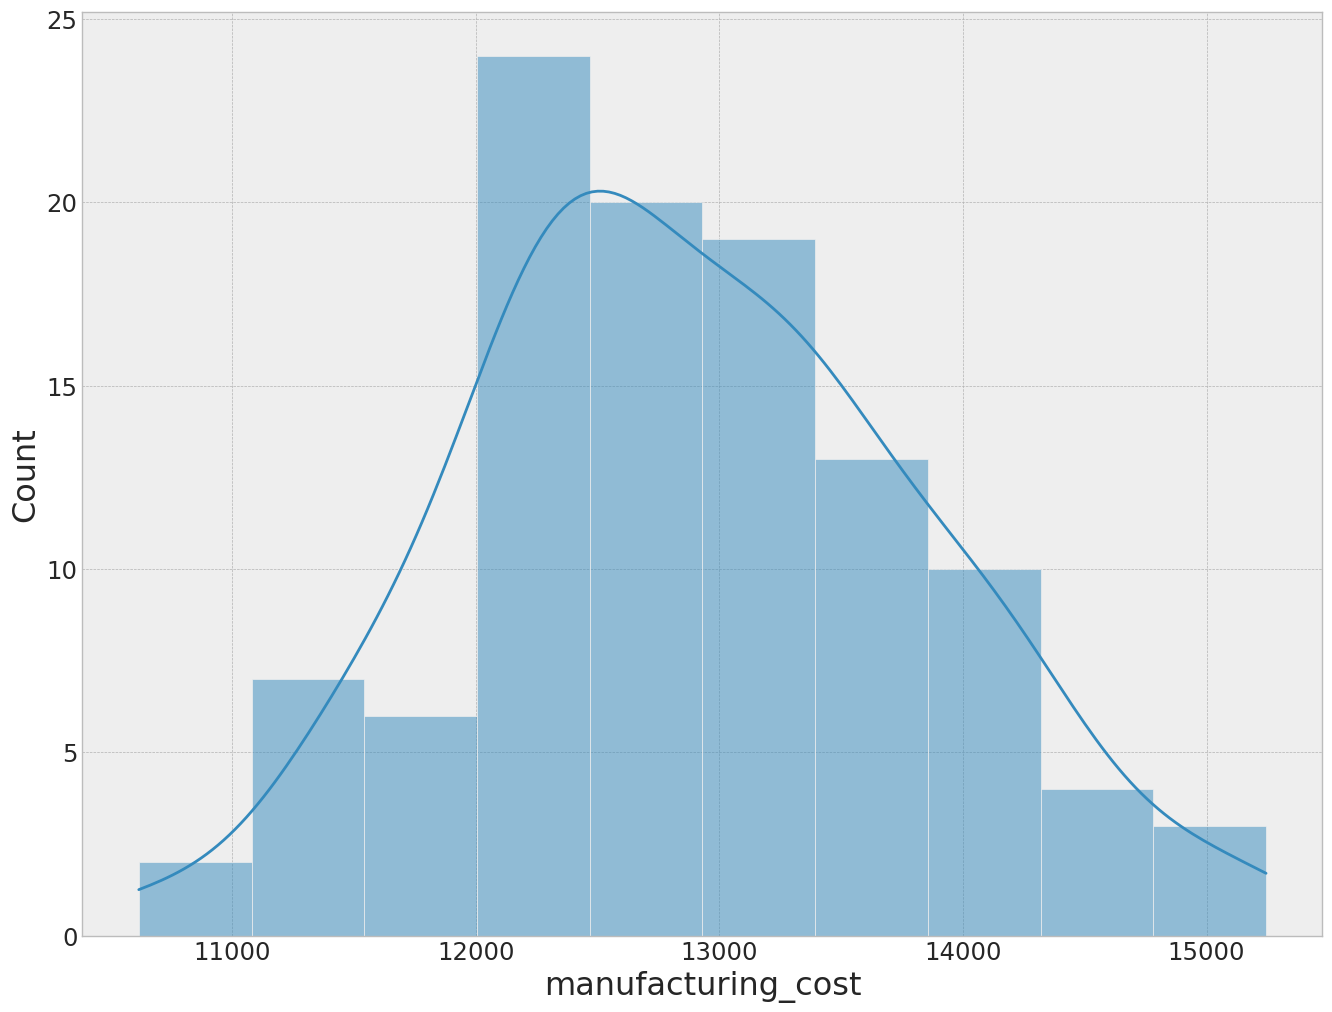

In [182]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import pandas as pd


manufacturing_cost = edison_data['manufacturing_cost']

# Plot the empirical distribution
plt.figure()
sns.histplot(manufacturing_cost, kde=True)
plt.show()

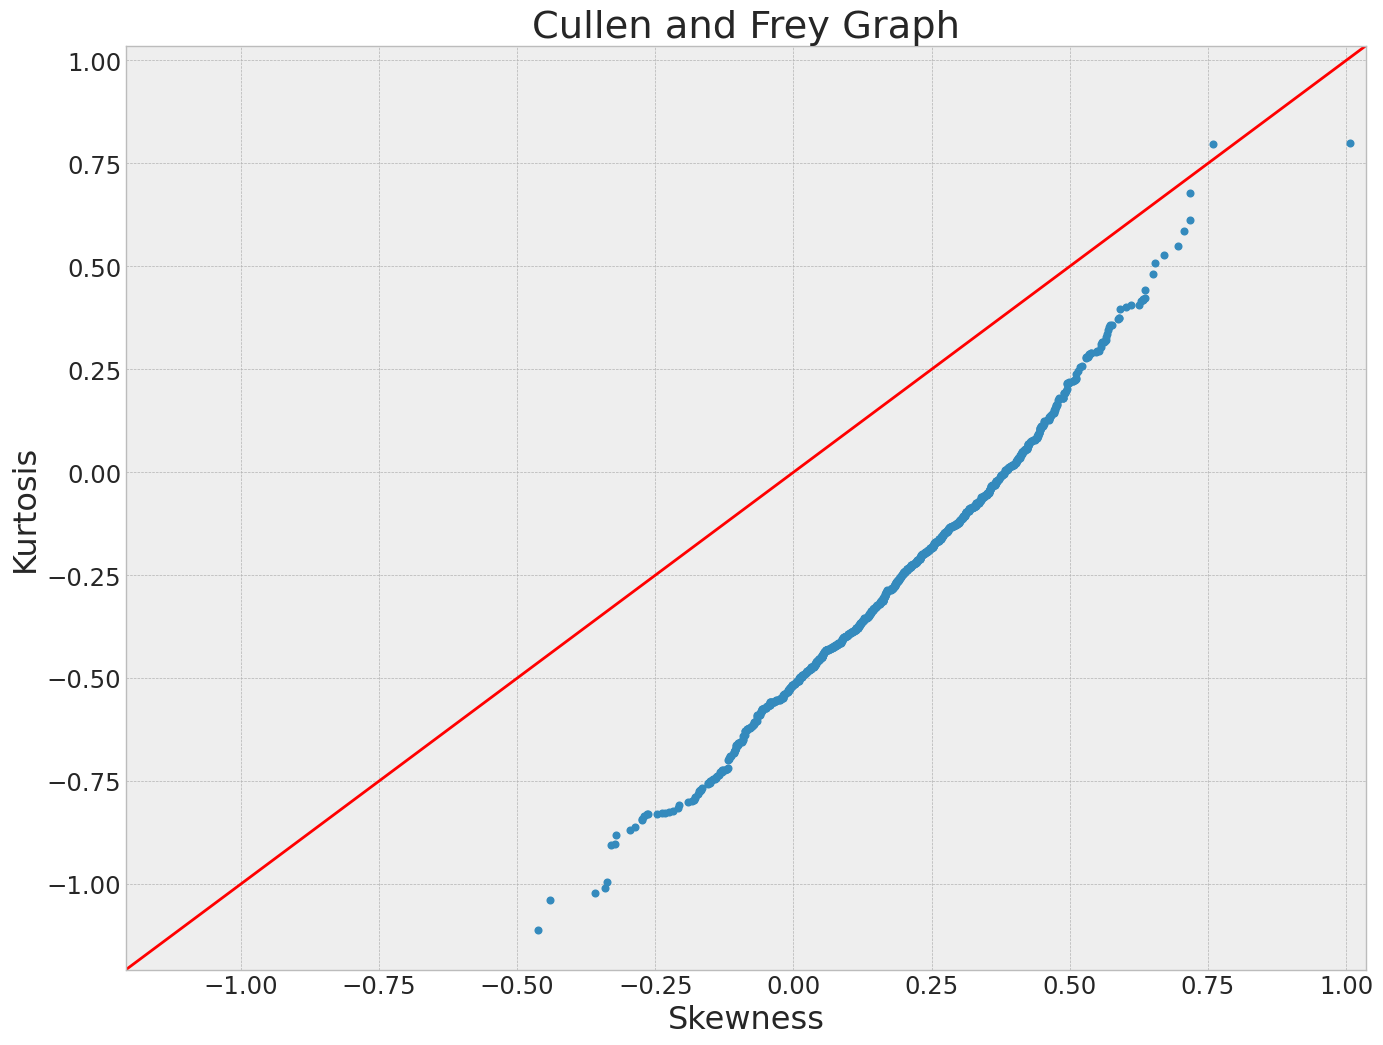

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
import pandas as pd


manufacturing_cost = edison_data['manufacturing_cost']

# Function to plot Cullen and Frey graph
def cullen_frey_plot(data):
    # Bootstrap to estimate skewness and kurtosis
    skews = [skew(np.random.choice(data, size=len(data), replace=True)) for _ in range(1000)]
    kurts = [kurtosis(np.random.choice(data, size=len(data), replace=True), fisher=True) for _ in range(1000)]

    sm.qqplot_2samples(np.array(skews), np.array(kurts), xlabel='Skewness', ylabel='Kurtosis', line='45')
    plt.title('Cullen and Frey Graph')
    plt.show()

# Generate the Cullen and Frey graph
cullen_frey_plot(manufacturing_cost)


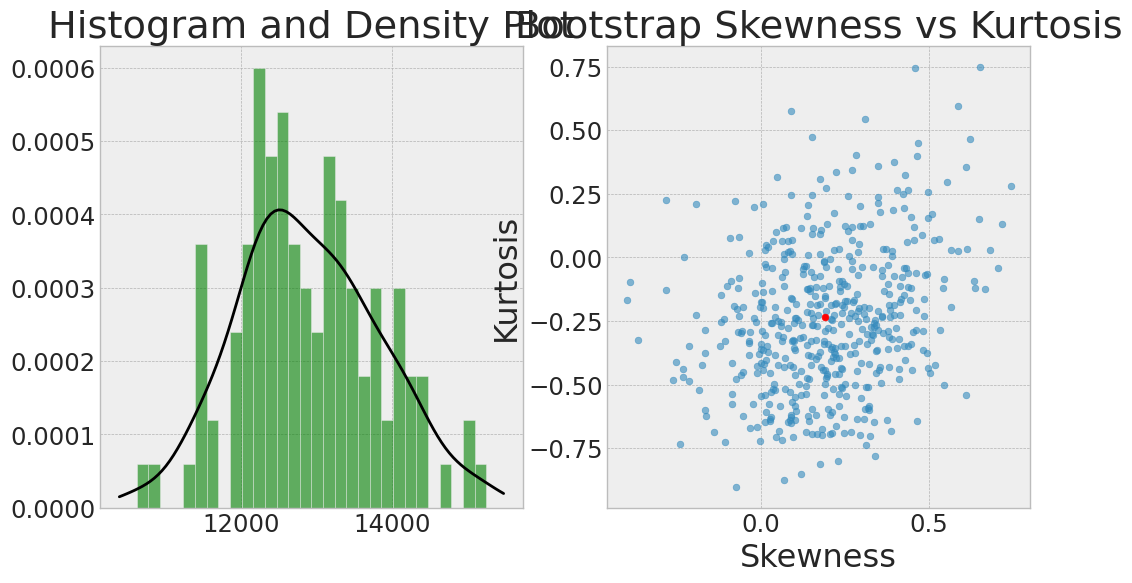

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, gaussian_kde

manufacturing_cost = edison_data['manufacturing_cost']

# Function to plot descriptive statistics
def plot_descdist(data, num_bootstrap=500):
    skewnesses, kurtoses = [], []

    # Bootstrap to estimate skewness and kurtosis
    for _ in range(num_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        skewnesses.append(skew(sample))
        kurtoses.append(kurtosis(sample, fisher=True))

    skewness = skew(data)
    kurtosis_value = kurtosis(data, fisher=True)

    # Plotting histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = gaussian_kde(data)(x)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Histogram and Density Plot"
    plt.title(title)

    # Plotting scatter plot for skewness vs kurtosis
    plt.subplot(1, 2, 2)
    plt.scatter(skewnesses, kurtoses, alpha=0.6)
    plt.scatter(skewness, kurtosis_value, color='red')
    plt.xlabel('Skewness')
    plt.ylabel('Kurtosis')
    plt.title('Bootstrap Skewness vs Kurtosis')
    plt.grid(True)
    plt.show()

# Execute the function
plot_descdist(manufacturing_cost)




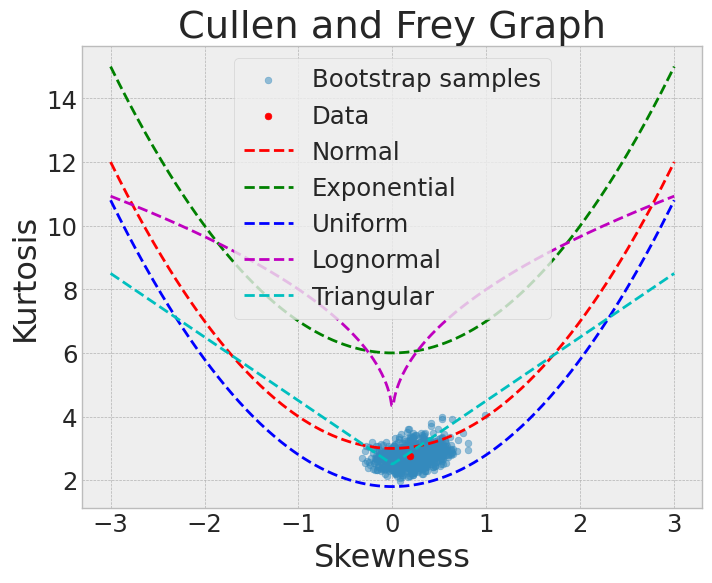

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm, expon, uniform

def theoretical_reference_lines():
    x = np.linspace(-3, 3, 400)
    normal_line = 3 + x**2
    exponential_line = 6 + x**2
    uniform_line = 1.8 + x**2
    lognormal_line = 10 + (x - 0.5)**2
    triangular_line = 2.5 + 2 * np.abs(x)
    lognormal_line = 4 + 4 * np.sqrt(np.abs(x))
    triangular_line = 2.5 + 2 * np.abs(x)
    lognormal_y = np.linspace(3, 20, 400)
    lognormal_x = np.sqrt(np.log(lognormal_y - 3))  # Approximation

    plt.plot(x, normal_line, 'r--', label='Normal')
    plt.plot(x, exponential_line, 'g--', label='Exponential')
    plt.plot(x, uniform_line, 'b--', label='Uniform')
    plt.plot(x, lognormal_line, 'm--', label='Lognormal')
    plt.plot(x, triangular_line, 'c--', label='Triangular')


manufacturing_cost = edison_data['manufacturing_cost']

data_skewness = skew(manufacturing_cost)
data_kurtosis = kurtosis(manufacturing_cost, fisher=False)

boot_skewness, boot_kurtosis = [], []
for _ in range(1000):
    sample = np.random.choice(manufacturing_cost, size=len(manufacturing_cost), replace=True)
    boot_skewness.append(skew(sample))
    boot_kurtosis.append(kurtosis(sample, fisher=False))

plt.figure(figsize=(8, 6))
plt.scatter(boot_skewness, boot_kurtosis, alpha=0.5, label='Bootstrap samples')
plt.scatter(data_skewness, data_kurtosis, color='red', label='Data')

theoretical_reference_lines()

plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
plt.title('Cullen and Frey Graph')
plt.legend()
plt.grid(True)
plt.show()


In [186]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

  1 / 106: ksone
  2 / 106: kstwo
  3 / 106: kstwobign
  4 / 106: norm
  5 / 106: alpha
  6 / 106: anglit
  7 / 106: arcsine
  8 / 106: beta
  9 / 106: betaprime
 10 / 106: bradford
 11 / 106: burr
 12 / 106: burr12
 13 / 106: fisk
 14 / 106: cauchy
 15 / 106: chi
 16 / 106: chi2
 17 / 106: cosine
 18 / 106: dgamma
 19 / 106: dweibull
 20 / 106: expon
 21 / 106: exponnorm
 22 / 106: exponweib
 23 / 106: exponpow
 24 / 106: fatiguelife
 25 / 106: foldcauchy
 26 / 106: f
 27 / 106: foldnorm
 28 / 106: weibull_min
 29 / 106: truncweibull_min
 30 / 106: weibull_max
 31 / 106: genlogistic
 32 / 106: genpareto
 33 / 106: genexpon
 34 / 106: genextreme
 35 / 106: gamma
 36 / 106: erlang
 37 / 106: gengamma
 38 / 106: genhalflogistic
 39 / 106: genhyperbolic
 40 / 106: gompertz
 41 / 106: gumbel_r
 42 / 106: gumbel_l
 43 / 106: halfcauchy
 44 / 106: halflogistic
 45 / 106: halfnorm
 46 / 106: hypsecant
 47 / 106: gausshyper
 48 / 106: invgamma
 49 / 106: invgauss
 50 / 106: geninvgauss
 51 / 1

Text(0, 0.5, 'Frequency')

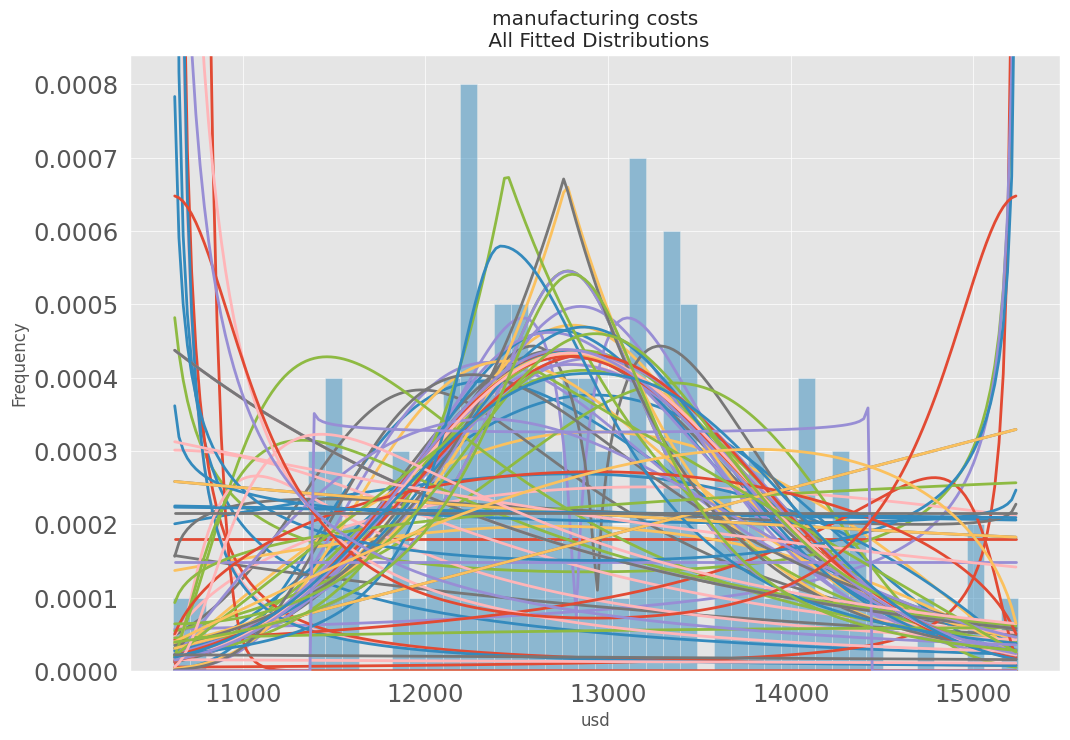

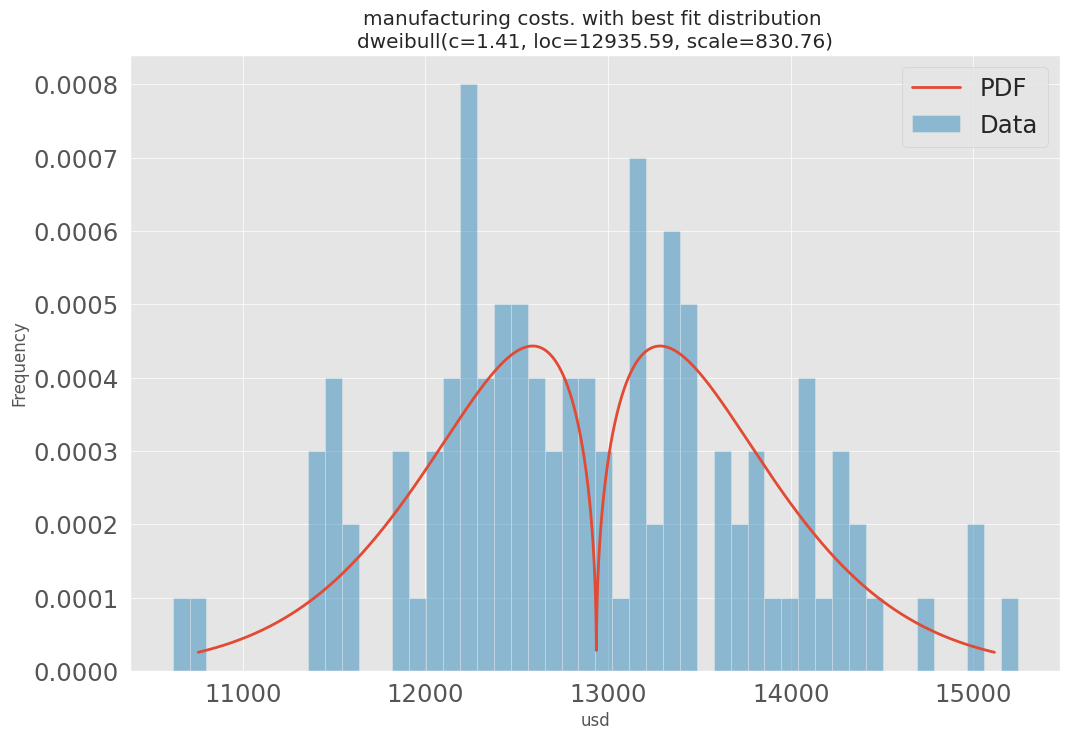

In [187]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')


def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    #distributions_to_consider = ['norm', 'expon', 'gamma','lognorm']
    #for ii, distribution in enumerate(distributions_to_consider):

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))

        except Exception:
            pass


    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = manufacturing_cost = edison_data['manufacturing_cost']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'manufacturing costs\n All Fitted Distributions')
ax.set_xlabel(u'usd')
ax.set_ylabel('Frequency')

# Make PDF with best params
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'manufacturing costs. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'usd')
ax.set_ylabel('Frequency')

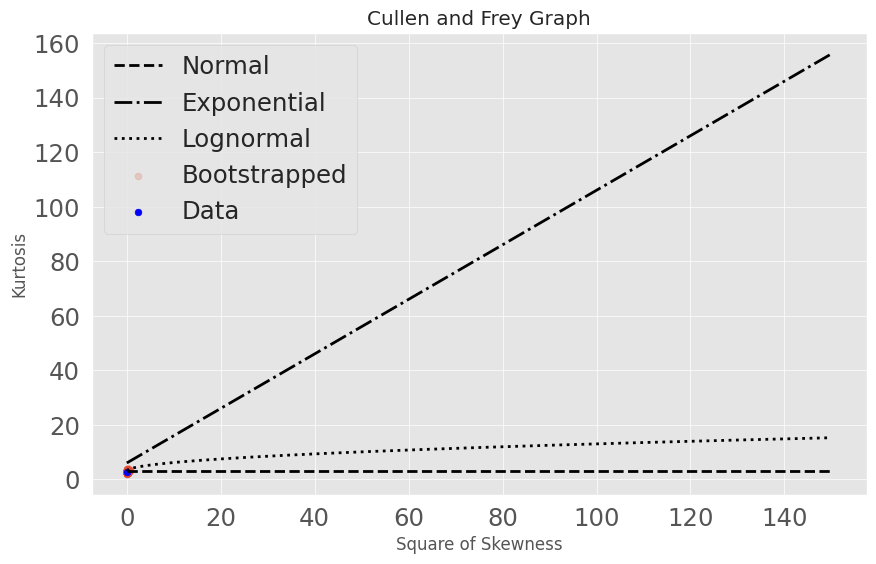

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm

# Function to plot theoretical distribution lines
def theoretical_distribution_lines():
    # Square of skewness values for reference lines
    sq_skewness = np.linspace(0, 150, 400)

    # Normal distribution: kurtosis = 3
    normal_line = 3 * np.ones_like(sq_skewness)

    # Exponential distribution: kurtosis = 9
    exponential_line = 6 + sq_skewness

    # Lognormal distribution: use a function of skewness
    lognormal_line = 3 + np.sqrt(sq_skewness)

    plt.plot(sq_skewness, normal_line, 'k--', label='Normal')
    plt.plot(sq_skewness, exponential_line, 'k-.', label='Exponential')
    plt.plot(sq_skewness, lognormal_line, 'k:', label='Lognormal')

data = edison_data['manufacturing_cost']

# Calculate skewness and kurtosis
data_skew = skew(data)
data_kurt = kurtosis(data, fisher=True) + 3

# Bootstrap to estimate skewness and kurtosis
bootstrap_skewness = []
bootstrap_kurtosis = []
for _ in range(1000):
    sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_skewness.append(skew(sample)**2)
    bootstrap_kurtosis.append(kurtosis(sample, fisher=True) + 3)

# Plotting the Cullen and Frey graph
plt.figure(figsize=(10, 6))
theoretical_distribution_lines()
plt.scatter(bootstrap_skewness, bootstrap_kurtosis, alpha=0.2, label='Bootstrapped')
plt.scatter(data_skew**2, data_kurt, color='blue', label='Data')
plt.xlabel('Square of Skewness')
plt.ylabel('Kurtosis')
plt.title('Cullen and Frey Graph')
plt.legend()
plt.grid(True)
plt.show()


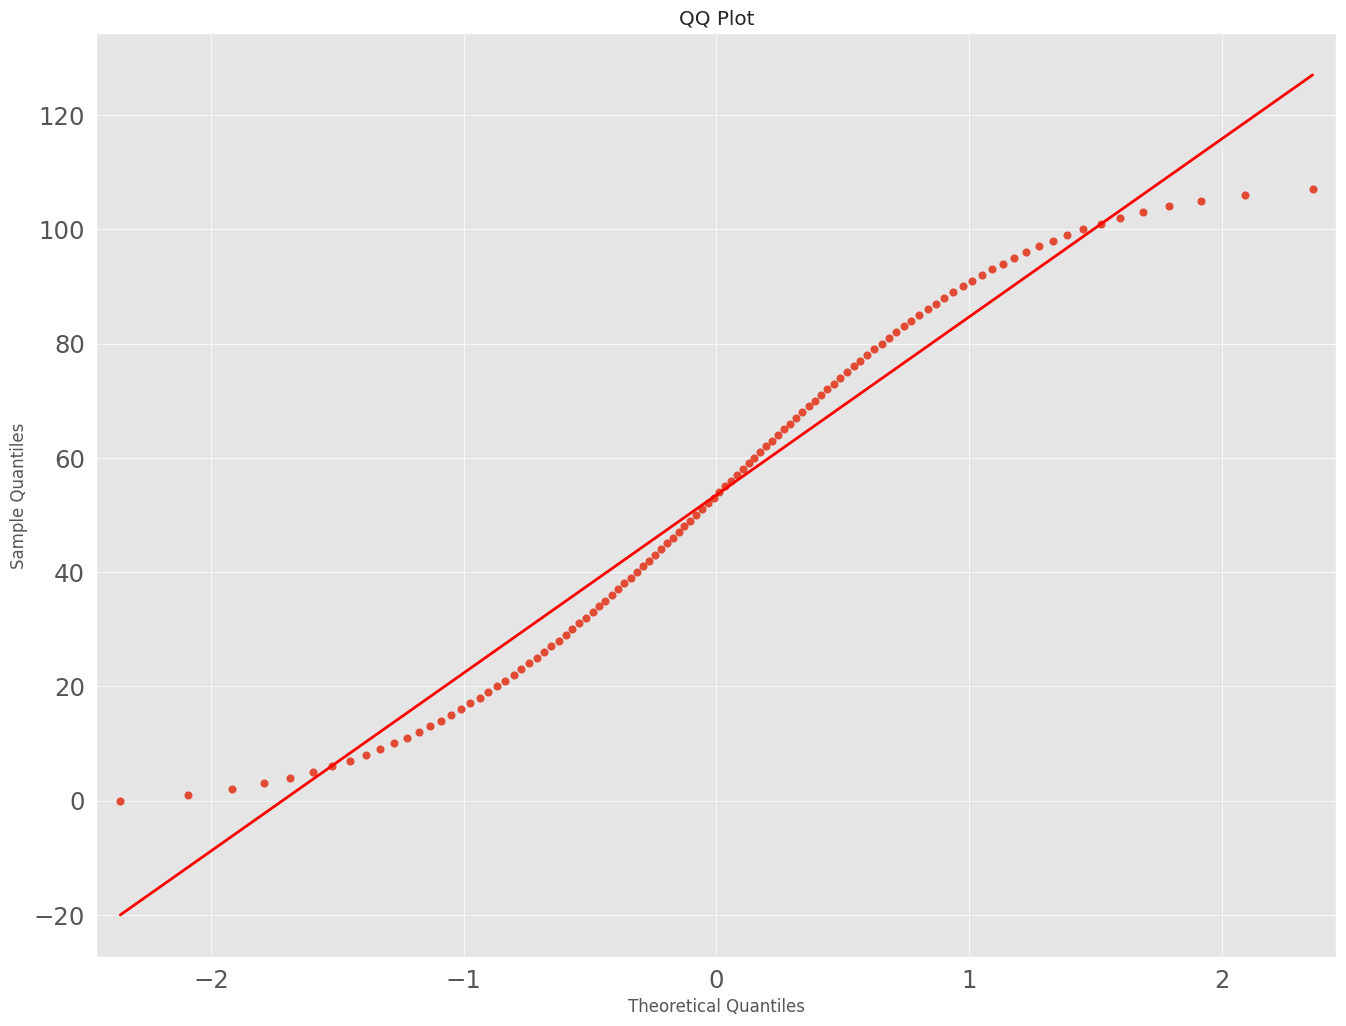

In [190]:
import statsmodels.api as sm
# Create a range of indices for the x-axis
x_indices = np.arange(len(manufacturing_cost_empirical))

# Generate a theoretical quantile-quantile line
sm.qqplot(x_indices, line='s')  # 's' for standardized line, '45' for 45-degree line

# Add a title
plt.title('QQ Plot')

# Show the plot
plt.show()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 3.58508e-08] [loc=12891.148 scale=924.811]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 3.89622e-07] [loc=10616.000 scale=2275.148]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 3.89622e-07] [loc=-1099511617160.000 scale=1099511627776.000]
[distfit] >INFO> [dweibull  ] [0.02 sec] [RSS: 3.74871e-08] [loc=12935.586 scale=830.760]
[distfit] >INFO> [t         ] [0.27 sec] [RSS: 3.58506e-08] [loc=12891.145 scale=924.809]
[distfit] >INFO> [genextreme] [0.24 sec] [RSS: 1.84926e-07] [loc=11235.450 scale=2259.741]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 3.07442e-08] [loc=4735.409 scale=104.995]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 3.07894e-08] [loc=472.763 scale=12384.061]
[distfit] >INFO> [beta      ] [0.04 sec] [RSS: 3.24369e-08] [loc=9302.004 scale=8872.619]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 2.21596e-07] [loc=10616.000 scale=4628.000]
[distfit] >INFO> [loggamma  ] [

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Gamma (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

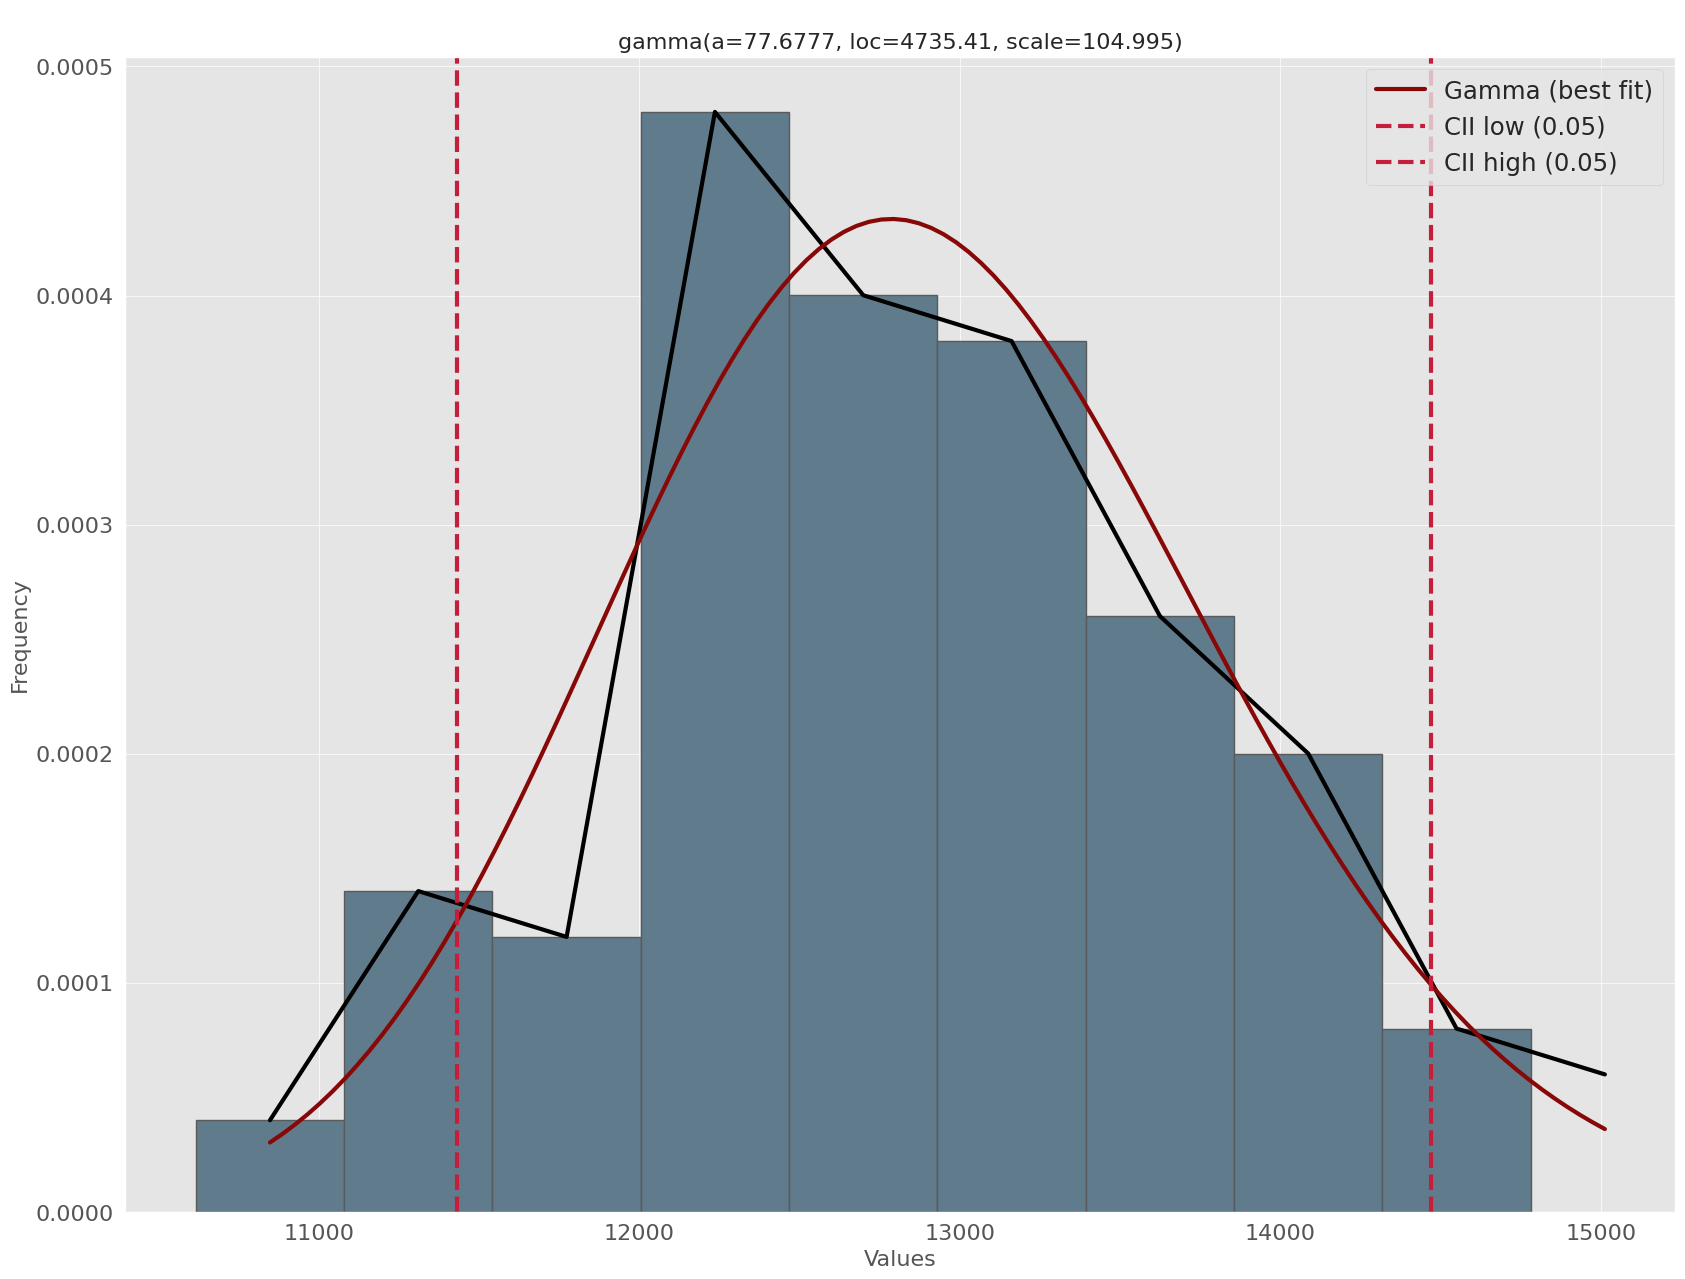

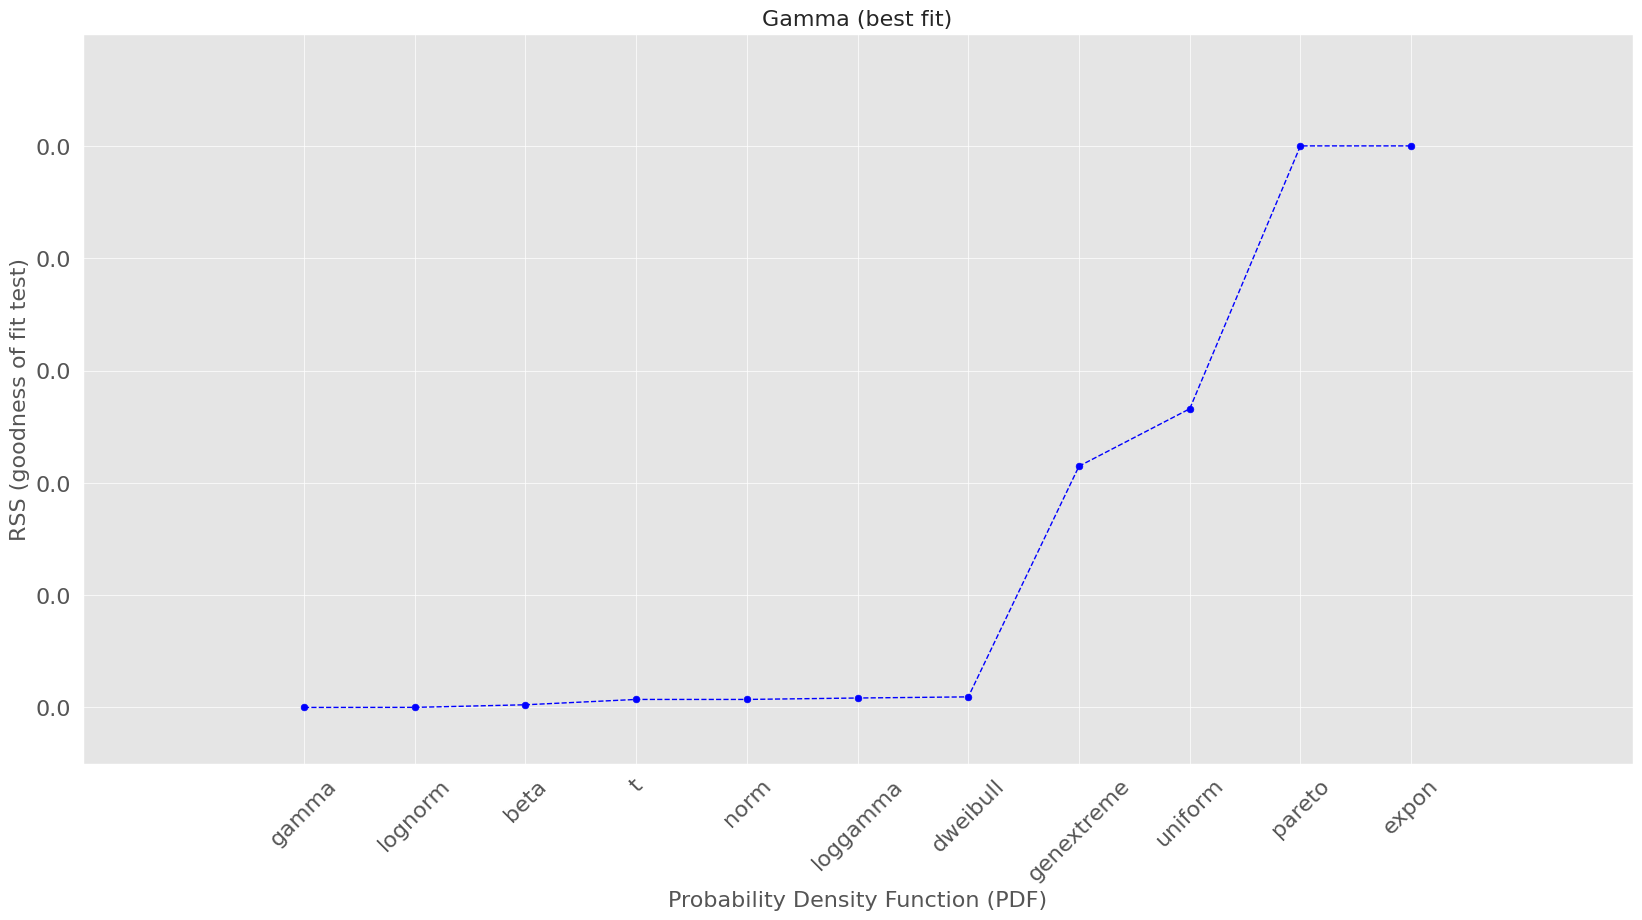

In [191]:
# From the distfit library import the class distfit
from distfit import distfit

# Extract manufacturing cost from the data
manufacturing_cost_empirical = edison_data['manufacturing_cost']

# Fit a normal distribution to the data
mu, std = norm.fit(manufacturing_cost_empirical)

# Initialize
dist = distfit()

# Search for best theoretical fit on your emperical data
dist.fit_transform(manufacturing_cost_empirical)

# Plot
dist.plot()

# summay plot
dist.plot_summary()

In [194]:
dist = distfit(distr='lognorm')
dist.fit_transform(x_indices)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [lognorm] [0.08 sec] [RSS: 0.000668794] [loc=-0.000 scale=0.040]
[distfit] >INFO> Compute confidence intervals [parametric]


{'model': {'name': 'lognorm',
  'score': 0.0006687940524595452,
  'loc': -5e-324,
  'scale': 0.0397958318069658,
  'arg': (71.66200036048215,),
  'params': (71.66200036048215, -5e-324, 0.0397958318069658),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x78ba8f7570a0>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': 2.558741716085591e-53,
  'CII_max_alpha': 6.189402467831058e+49},
 'summary':       name     score  loc     scale                   arg  \
 0  lognorm  0.000669 -0.0  0.039796  (71.66200036048215,)   
 
                                              params  \
 0  (71.66200036048215, -5e-324, 0.0397958318069658)   
 
                                                model bootstrap_score  \
 0  <scipy.stats._distn_infrastructure.rv_continuo...               0   
 
   bootstrap_pass    color  
 0           None  #e41a1c  ,
 'histdata': (array([0.00969193, 0.00899965, 0.00969193, 0.00899965, 0.00899965,
         0.

2024-01-20 20:08:56.070 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=3e-06)
2024-01-20 20:08:56.198 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=3e-06)
2024-01-20 20:08:56.235 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=3e-06)
2024-01-20 20:08:56.250 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=4e-06)
2024-01-20 20:08:56.508 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted burr distribution with error=4e-06)


sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma           0.000003  1766.022045  1774.068439     inf      0.050650   
lognorm         0.000003  1766.127270  1774.173664     inf      0.051078   
beta            0.000003  1764.285940  1775.014465     inf      0.050290   
norm            0.000004  1762.550067  1767.914329     inf      0.063883   
burr            0.000004  1785.692122  1796.420647     inf      0.081177   

         ks_pvalue  
gamma     0.931265  
lognorm   0.926992  
beta      0.934755  
norm      0.745647  
burr      0.451462

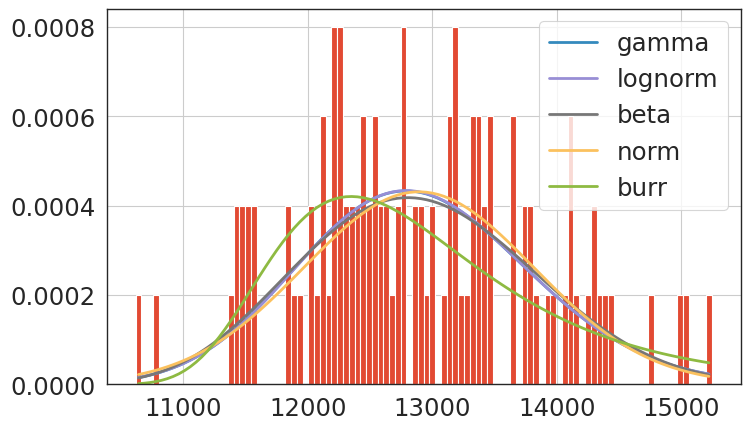

In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

manufacturing_cost_empirical = edison_data['manufacturing_cost']

sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=edison_data, x="manufacturing_cost", kind="hist", bins = 100, aspect = 1.5)

edison_dat = edison_data['manufacturing_cost'].values

f = Fitter(edison_dat,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [196]:
f.get_best(method = 'sumsquare_error')

{'gamma': {'a': 77.67773335242182,
  'loc': 4735.4092394707295,
  'scale': 104.99455250408602}}

In [197]:
f.fitted_param["beta"]



(8.577526782957195, 12.62511852443259, 9302.004373287315, 8872.619090265398)

2024-01-20 20:09:03.865 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=4e-06)
2024-01-20 20:09:03.873 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=7e-06)
2024-01-20 20:09:04.032 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=1e-05)
2024-01-20 20:09:04.326 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=1e-05)
2024-01-20 20:09:04.335 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=3e-06)
2024-01-20 20:09:04.345 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=3e-06)
2024-01-20 20:09:04.349 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=4e-06)
2024-01-20 20:09:04.368 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution wit

sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.000003  1766.022045  1774.068439     inf      0.050650   
lognorm          0.000003  1766.127270  1774.173664     inf      0.051078   
norm             0.000004  1762.550067  1767.914329     inf      0.063883   
rayleigh         0.000004  1731.331075  1736.695337     inf      0.151983   
cauchy           0.000004  1804.489854  1809.854117     inf      0.107486   

          ks_pvalue  
gamma      0.931265  
lognorm    0.926992  
norm       0.745647  
rayleigh   0.012110  
cauchy     0.153217

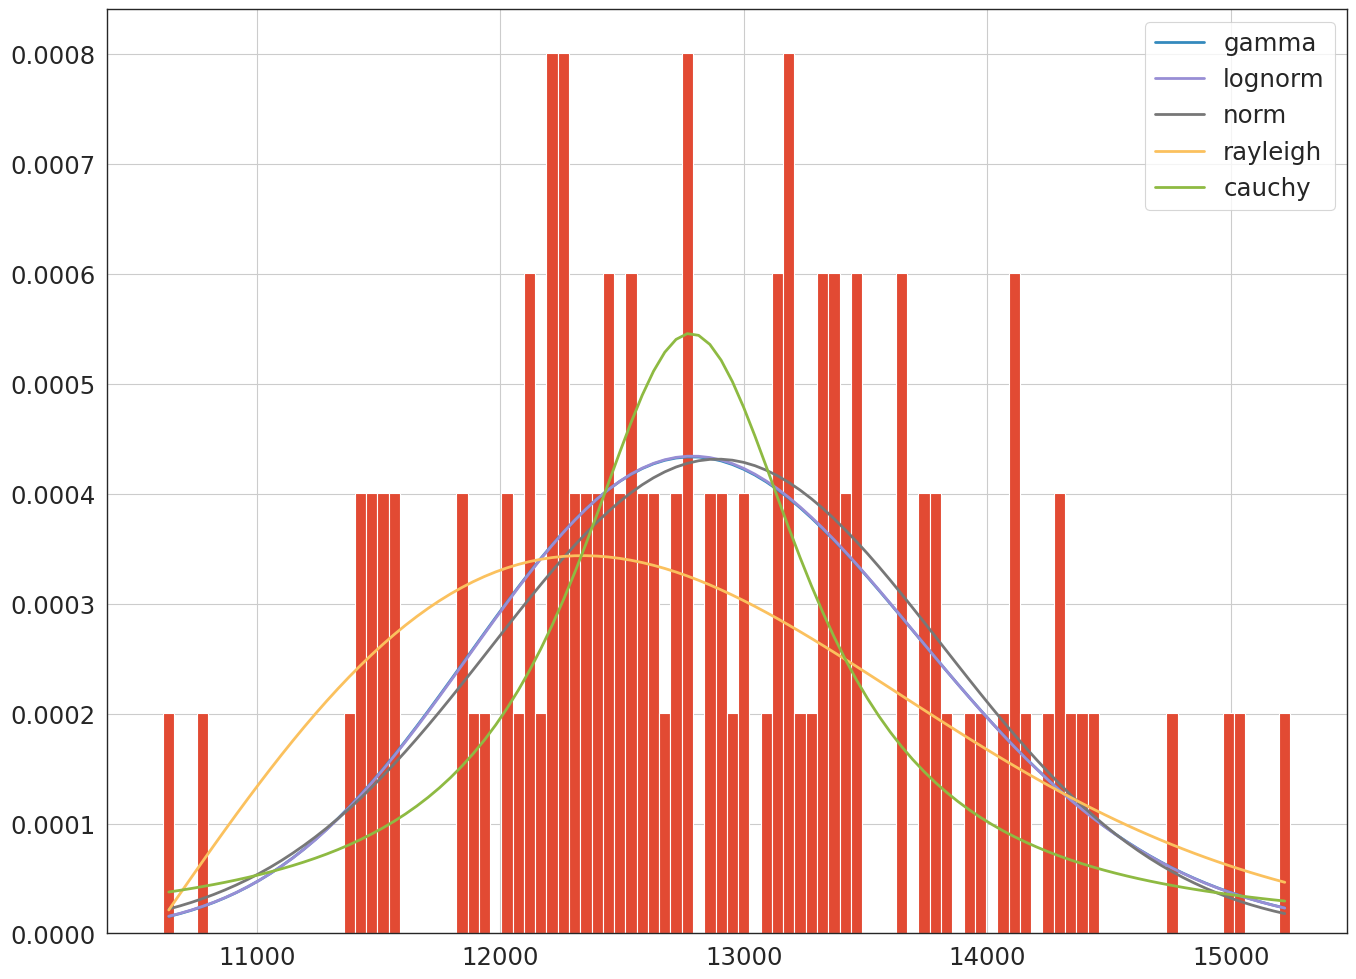

In [198]:
f = Fitter(edison_dat,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [199]:
# Test normal distribution fit
normal_fit = norm.fit(manufacturing_cost_empirical)
normal_stat, normal_p_value = kstest(manufacturing_cost_empirical, 'norm', args=normal_fit)

# Test log-normal distribution fit
lognormal_fit = lognorm.fit(manufacturing_cost_empirical)
lognormal_stat, lognormal_p_value = kstest(manufacturing_cost_empirical, 'lognorm', args=lognormal_fit)

# Print results of goodness-of-fit tests
print("Goodness-of-Fit Tests:")
print("Normal Distribution Fit - KS Statistic:", normal_stat)
print("Normal Distribution Fit - KS p-value:", normal_p_value)

print("Log-Normal Distribution Fit - KS Statistic:", lognormal_stat)
print("Log-Normal Distribution Fit - KS p-value:", lognormal_p_value)

Goodness-of-Fit Tests:
Normal Distribution Fit - KS Statistic: 0.06388275330735854
Normal Distribution Fit - KS p-value: 0.7456472763815815
Log-Normal Distribution Fit - KS Statistic: 0.05107841678623426
Log-Normal Distribution Fit - KS p-value: 0.926991785615372


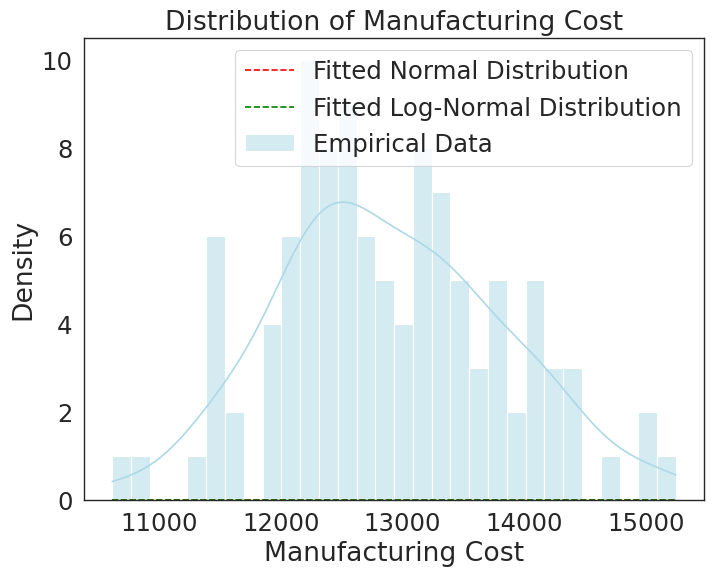

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, lognorm
import seaborn as sns

# Extract manufacturing cost from the data
manufacturing_cost_empirical = edison_data['manufacturing_cost']

# Fit a normal distribution to the data
mu, std = norm.fit(manufacturing_cost_empirical)
xmin, xmax = min(manufacturing_cost_empirical), max(manufacturing_cost_empirical)
x = np.linspace(xmin, xmax, 1000)
pdf_normal = norm.pdf(x, mu, std)

# Fit a log-normal distribution to the data
shape, loc, scale = lognorm.fit(manufacturing_cost_empirical)
pdf_lognormal = lognorm.pdf(x, shape, loc, scale)


# Fit a log-normal distribution to the data
shape, loc, scale = lognorm.fit(manufacturing_cost_empirical)
pdf_lognormal = lognorm.pdf(x, shape, loc, scale)


# Plot the empirical data and the fitted distributions
plt.figure(figsize=(8, 6))
sns.histplot(manufacturing_cost_empirical, bins=30, kde=True, color='lightblue', label='Empirical Data')
plt.plot(x, pdf_normal, 'r--', label='Fitted Normal Distribution')
plt.plot(x, pdf_lognormal, 'g--', label='Fitted Log-Normal Distribution')
plt.xlabel('Manufacturing Cost')
plt.ylabel('Density')
plt.title('Distribution of Manufacturing Cost')
plt.legend()
plt.savefig('distribution_fits.png')
plt.show()

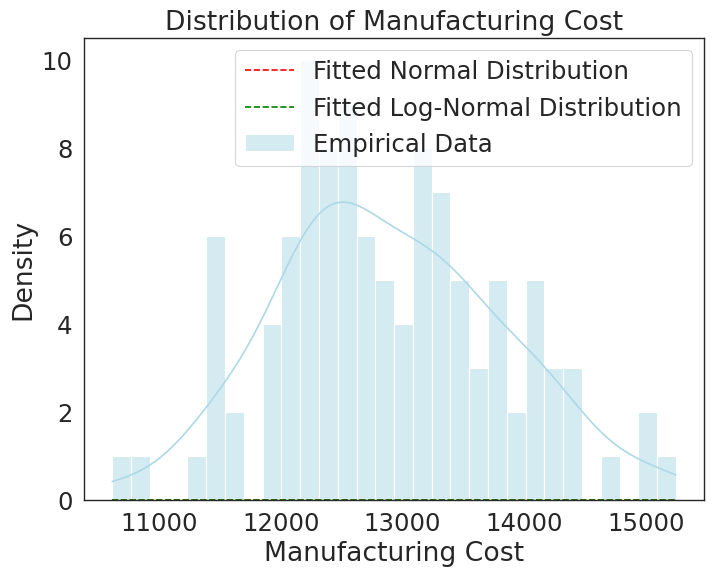

In [201]:
# Fit a normal distribution to the data
mu, std = norm.fit(manufacturing_cost_empirical)

# Fit a log-normal distribution to the data
shape, loc, scale = lognorm.fit(manufacturing_cost_empirical)

# Create a range of values for the x-axis
x = np.linspace(min(manufacturing_cost_empirical), max(manufacturing_cost_empirical), 1000)

# Calculate the PDF values for the fitted distributions
pdf_normal = norm.pdf(x, mu, std)
pdf_lognormal = lognorm.pdf(x, shape, loc, scale)

# Plot the empirical data and the fitted distributions
plt.figure(figsize=(8, 6))
sns.histplot(manufacturing_cost_empirical, bins=30, kde=True, color='lightblue', label='Empirical Data')
plt.plot(x, pdf_normal, 'r--', label='Fitted Normal Distribution')
plt.plot(x, pdf_lognormal, 'g--', label='Fitted Log-Normal Distribution')
plt.xlabel('Manufacturing Cost')
plt.ylabel('Density')
plt.title('Distribution of Manufacturing Cost')
plt.legend()
plt.savefig('distribution_fits.png')
plt.show()

In [222]:
# Generate new manufacturing cost data based on the KDE
np.random.seed(19702)
manufacturing_cost = kde.sample(nr_runs)
manufacturing_cost = manufacturing_cost.reshape(-1)

# Fit a normal distribution to the manufacturing_cost data
mean, std_dev = norm.fit(manufacturing_cost)

# Now, you can define fit_n as a tuple containing mean and std_dev
fit_n = (mean, std_dev)

# Generate new manufacturing cost data using the best fit
np.random.seed(19702)
manufacturing_cost = norm.rvs(loc=fit_n[0], scale=fit_n[1], size=nr_runs)

# Initialize variables
win = 0
result_array = []

# Simulate and calculate NPV
for i in range(nr_runs):
    result = npv(discount_rate, development_cost[i], initial_market_size[i], market_growth[i], market_share[i], sale_price[i], manufacturing_cost[i], horizon, time_to_market, debug)
    if result > 0:
        win += 1
    result_array.append(result)

# Calculate mean and standard deviation of NPV
mean_npv = np.mean(result_array) / 1000000
std_npv = np.std(result_array) / 1000000
print("Mean NPV:", mean_npv)
print("Standard Deviation of NPV:", std_npv)

# Plot the histogram of NPV
plt.figure()
plt.hist(np.array(result_array) / 1000000, bins=range(int(min(result_array) / 1000000), int(max(result_array) / 1000000) + 1, 50), density=True, color='lightpink', alpha=0.7)
plt.xlabel('10-year NPV (Million USD)')
plt.ylabel('Density')
plt.title('Histogram of 10-year NPV')
plt.savefig('edison-hist-mc-2.pdf')
plt.close()

# Calculate the probability of winning
proba_win = win / nr_runs
print("Probability of Winning:", proba_win)

Mean NPV: 851.4370678935396
Standard Deviation of NPV: 4155.40455960484
Probability of Winning: 0.57986


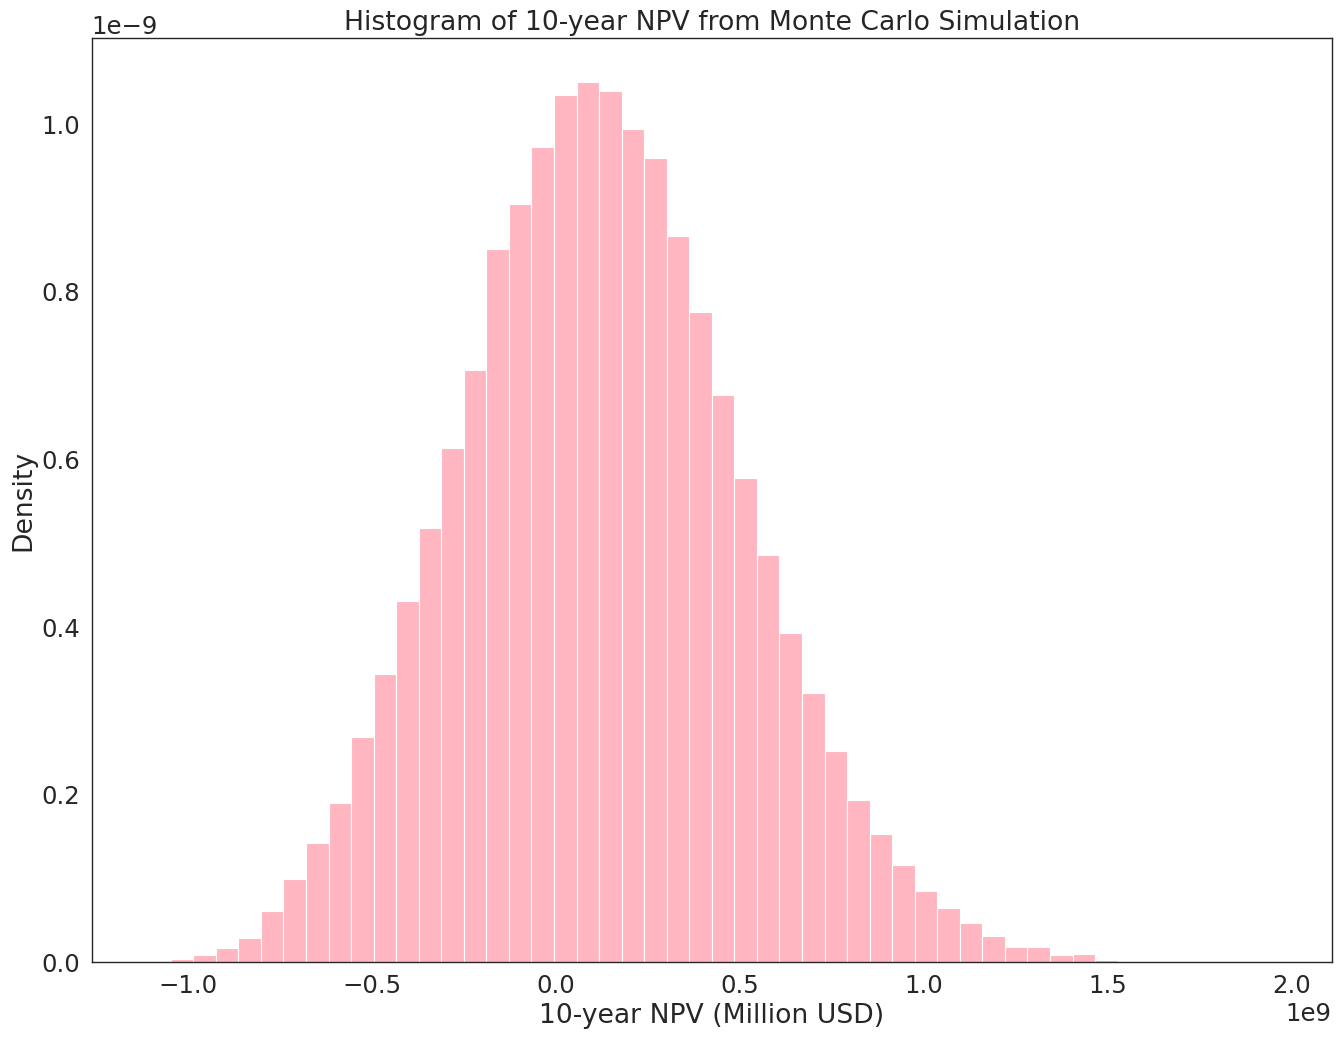

In [223]:
def monte_carlo_simulation(npv_function, fixed_params, distributions, nr_runs):
    results = []
    wins = 0
    for _ in range(nr_runs):
        variable_params = {param: dist.rvs() for param, dist in distributions.items()}
        scenario = {**fixed_params, **variable_params}
        result = npv_function(**scenario)
        results.append(result)
        if result > 0:
            wins += 1
    return np.mean(results), np.std(results), wins / nr_runs, results

# Fixed parameters for Monte Carlo simulation
fixed_params = {
    'discount_rate': params['discount_rate'],
    'horizon': params['horizon'],
    'time_to_market': params['time_to_market'],
    'debug': False
}


distributions = {
    'development_cost': stats.triang(c=(800000000-300000000)/(1700000000-300000000), loc=300000000, scale=1700000000-300000000),
    'initial_market_size': stats.norm(loc=145000, scale=25000),
    'market_growth': stats.triang(c=(0.07-0.01)/(0.08-0.01), loc=0.01, scale=0.08-0.01),
    'market_share': stats.triang(c=(0.45-0.3)/(0.5-0.3), loc=0.3, scale=0.5-0.3),
    'sale_price': stats.triang(c=(16500-16000)/(19000-16000), loc=16000, scale=19000-16000),
    'manufacturing_cost': stats.triang(c=(13000-11000)/(14500-11000), loc=11000, scale=14500-11000)
}

# Monte Carlo simulation call
mean_npv, std_npv, proba_win, mc_results = monte_carlo_simulation(npv, fixed_params, distributions, 100000)

# Plotting results
plt.hist(mc_results, bins=50, color='lightpink', density=True)
plt.title("Histogram of 10-year NPV from Monte Carlo Simulation")
plt.xlabel("10-year NPV (Million USD)")
plt.ylabel("Density")
plt.show()

# Bayes inference


Recall:


1. Bayes' Theorem:
$P(H|E) = \frac{P(E|H) \cdot P(H)}{P(E)}$ \\
where $P(H|E)$ is the posterior probability of hypothesis $H$ given evidence $E$, \\
$P(E|H)$ is the likelihood, $P(H)$  is the prior probability of $H$, \\
and $P(E)$ is the marginal probability of $E$.


2. Union (Inclusion-Exclusion Principle): \\
$P(A \cup B) = P(A) + P(B) - P(A \cap B)$ \\
The probability of either event $A$  or $B$ happening.


3. Intersection: \\
$P(A \cap B) = P(A) \cdot P(B|A)$ \\
The probability of both events $A$ and $B$  happening.


4. Conditional Probability: \\
$P(A|B) = \frac{P(A \cap B)}{P(B)}$ \\
The probability of event  $A$ given that $B$ has occurred.


5. Total Probability Theorem: \\
$P(B) = \sum_{i} P(B|A_i) \cdot P(A_i)$ \\
The probability of $B$ occurring, summed over different conditions $A_i$.

E.g.:

P(A | B) = P(B | A) * P(A) / P(B)

To calculate P(A | B) when you have P(B | A), can rearrange the formula:

P(A | B) = (P(B | A) * P(A)) / P(B)

In this formula:

P(A | B) is the conditional probability of event A given event B.
P(B | A) is the conditional probability of event B given event A.
P(A) is the prior probability of event A.
P(B) is the marginal probability of event B.

use "reverse conditional probabilities", "reverse bayes"

Backward Conditional Probability tree (other names for the same thing)

https://en.wikipedia.org/wiki/Bayes%27_theorem

https://www.math.unl.edu/~sdunbar1/ExperimentationCR/Lessons/Probability/BayesTheorem/bayes_theorem.shtml


In [205]:
import numpy as np
import pandas as pd

# Define the joint probabilities for 'Actual Weather' and 'Weather Forecast'
joint_probabilities = np.array([[0.3, 0.1], [0.15, 0.45]])

# Calculate the priors for actual weather
priors_actual = joint_probabilities.sum(axis=1)

# Calculate the priors for forecasted weather
priors_forecast = joint_probabilities.sum(axis=0)

# Calculate the conditional probabilities
conditional_probabilities = {
    'P(Sunny|Forecast Sunny)': joint_probabilities[0, 0] / priors_forecast[0],
    'P(Cloudy|Forecast Cloudy)': joint_probabilities[1, 1] / priors_forecast[1],
    'P(Cloudy|Forecast Sunny)': joint_probabilities[1, 0] / priors_forecast[0],
    'P(Sunny|Forecast Cloudy)': joint_probabilities[0, 1] / priors_forecast[1]
}

# Construct the joint probability
joint_probability_df = pd.DataFrame(joint_probabilities, index=['Sunny', 'Cloudy'], columns=['Sunny', 'Cloudy'])

# Add priors to the DataFrame
joint_probability_df['Priors'] = priors_actual
joint_probability_df.loc['Priors'] = np.append(priors_forecast, 1)  # The sum of all priors should be 1

print(joint_probability_df)

        Sunny  Cloudy  Priors
Sunny    0.30    0.10     0.4
Cloudy   0.15    0.45     0.6
Priors   0.45    0.55     1.0


# bayesian decision tree

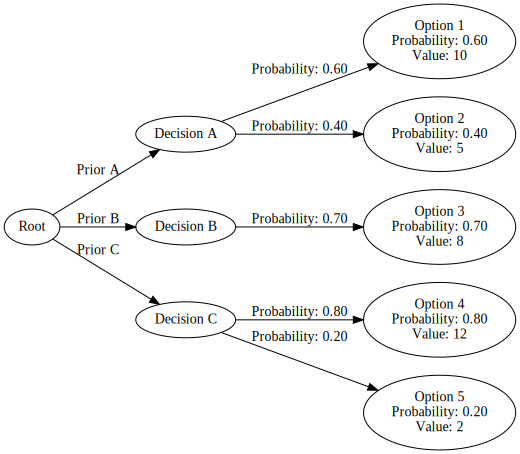

In [206]:
from graphviz import Digraph

# Create a Digraph object
dot = Digraph(comment='Decision Tree with Probabilities and Values', graph_attr={'rankdir': 'LR'})

# Create decision nodes
root = 'Root'  # Root node
node_A = 'Decision A'
node_B = 'Decision B'
node_C = 'Decision C'

# Build the decision tree structure
dot.node(root)
dot.node(node_A)
dot.node(node_B)
dot.node(node_C)

# Connect the root to decision nodes A, B, and C
dot.edge(root, node_A, label='Prior A')
dot.edge(root, node_B, label='Prior B')
dot.edge(root, node_C, label='Prior C')

# Adding outcome nodes for Decision A, B, and C with probabilities and values
outcomes_A = [('Option 1', 0.6, 10), ('Option 2', 0.4, 5)]
outcomes_B = [('Option 3', 0.7, 8)]
outcomes_C = [('Option 4', 0.8, 12), ('Option 5', 0.2, 2)]

# Connecting decision nodes to outcome nodes with probabilities and values
for outcome, probability, value in outcomes_A:
    dot.node(outcome, label=f'{outcome}\nProbability: {probability:.2f}\nValue: {value}')
    dot.edge(node_A, outcome, label=f'Probability: {probability:.2f}')

for outcome, probability, value in outcomes_B:
    dot.node(outcome, label=f'{outcome}\nProbability: {probability:.2f}\nValue: {value}')
    dot.edge(node_B, outcome, label=f'Probability: {probability:.2f}')

for outcome, probability, value in outcomes_C:
    dot.node(outcome, label=f'{outcome}\nProbability: {probability:.2f}\nValue: {value}')
    dot.edge(node_C, outcome, label=f'Probability: {probability:.2f}')

dot.render('decision_tree', format='png', cleanup=True)
dot.view('decision_tree')


display(dot)

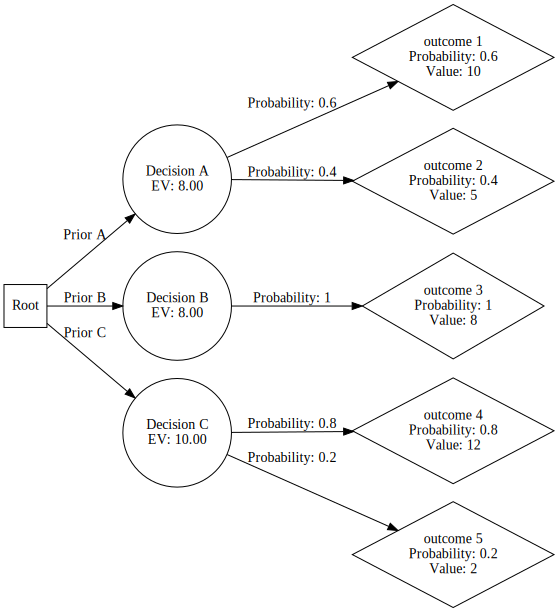

In [207]:
from graphviz import Digraph

# Create a Digraph object
dot = Digraph(comment='Decision Tree with Probabilities and Values', graph_attr={'rankdir': 'LR'})

# Create decision nodes as squares
dot.node('Root', shape='square', label='Root')
dot.node('Decision A', shape='circle', label='Decision A')
dot.node('Decision B', shape='circle', label='Decision B')
dot.node('Decision C', shape='circle', label='Decision C')

# Connect the root to decision nodes A, B, and C
dot.edge('Root', 'Decision A', label='Prior A')
dot.edge('Root', 'Decision B', label='Prior B')
dot.edge('Root', 'Decision C', label='Prior C')

# Adding outcome nodes for Decision A, B, and C with probabilities and values as diamonds
dot.node('outcome 1', shape='diamond', label='outcome 1\nProbability: 0.6\nValue: 10')
dot.node('outcome 2', shape='diamond', label='outcome 2\nProbability: 0.4\nValue: 5')
dot.node('outcome 3', shape='diamond', label='outcome 3\nProbability: 1\nValue: 8')
dot.node('outcome 4', shape='diamond', label='outcome 4\nProbability: 0.8\nValue: 12')
dot.node('outcome 5', shape='diamond', label='outcome 5\nProbability: 0.2\nValue: 2')

# Calculate the Expected Value (EV) for each decision node
ev_A = (0.6 * 10) + (0.4 * 5)
ev_B = 1 * 8
ev_C = (0.8 * 12) + (0.2 * 2)

# Display the EV in the labels of decision nodes
dot.node('Decision A', label=f'Decision A\nEV: {ev_A:.2f}')
dot.node('Decision B', label=f'Decision B\nEV: {ev_B:.2f}')
dot.node('Decision C', label=f'Decision C\nEV: {ev_C:.2f}')

# Connecting decision nodes to outcome nodes with probabilities
dot.edge('Decision A', 'outcome 1', label='Probability: 0.6')
dot.edge('Decision A', 'outcome 2', label='Probability: 0.4')
dot.edge('Decision B', 'outcome 3', label='Probability: 1')
dot.edge('Decision C', 'outcome 4', label='Probability: 0.8')
dot.edge('Decision C', 'outcome 5', label='Probability: 0.2')

dot.render('decision_tree', format='png', cleanup=True)
dot.view('decision_tree')
display(dot)

# tornado plot

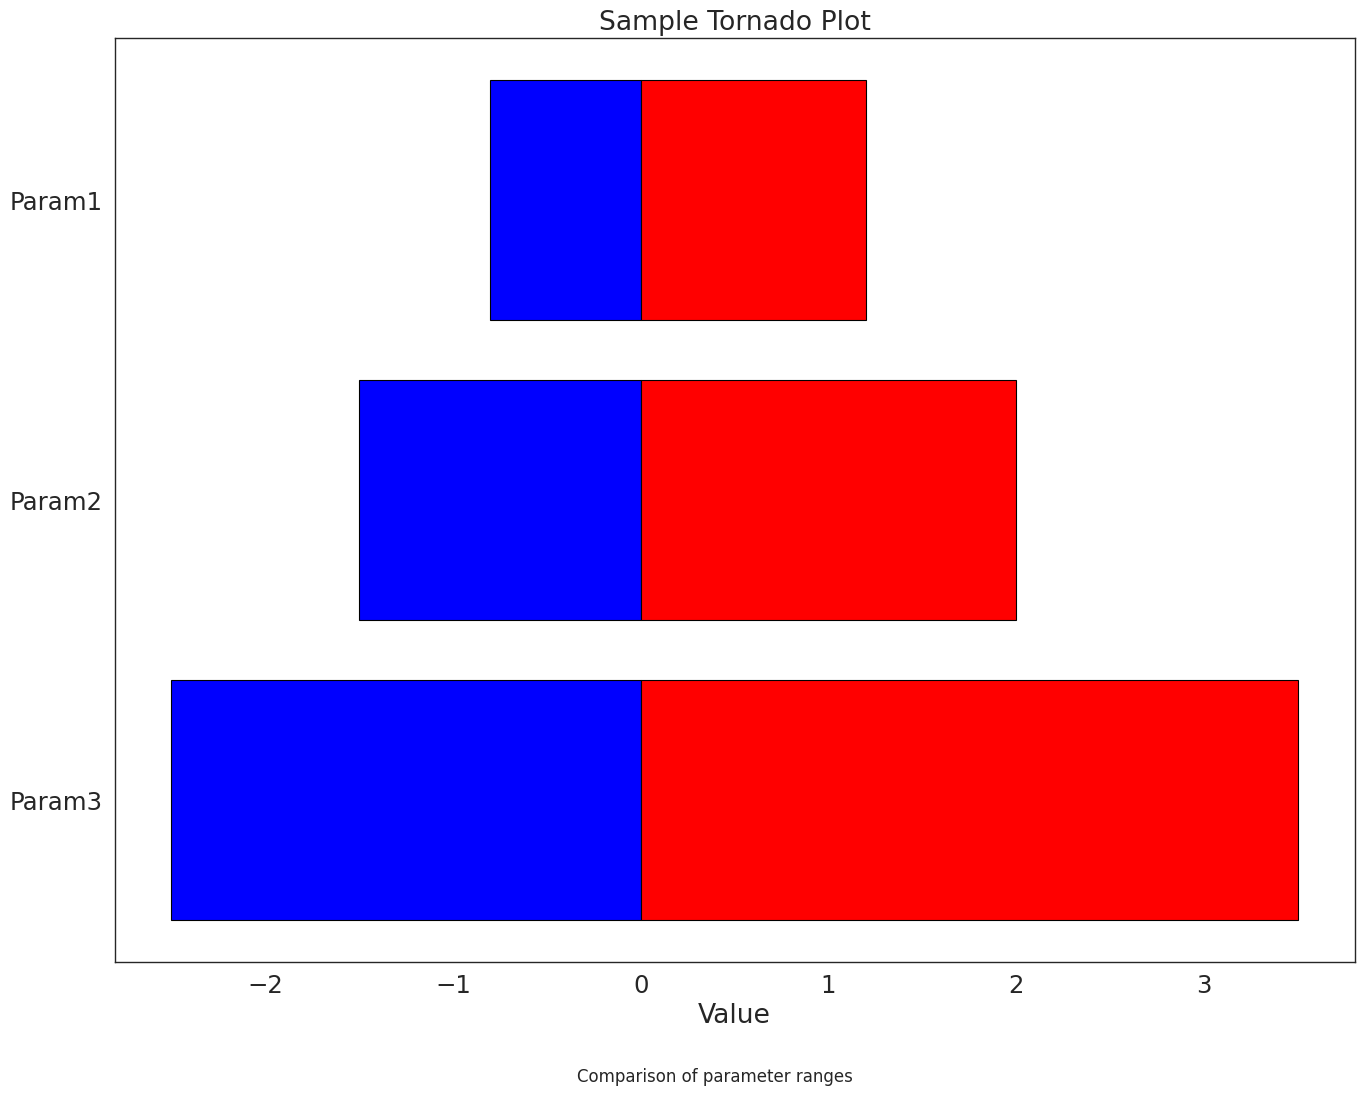

In [208]:
import matplotlib.pyplot as plt
import numpy as np

def create_tornado_plot(param_names, min_values, max_values, title, caption, middle_value=None, filename=None):
    # Determine number of parameters
    num_params = len(param_names)

    # Set middle values if not provided
    if middle_value is None:
        middle_value = np.zeros(num_params)

    # Create figure and axis
    fig, ax = plt.subplots()

    # Calculate differences for plotting
    left_values = middle_value - min_values
    right_values = max_values - middle_value

    # Create bars
    y_positions = np.arange(num_params)
    ax.barh(y_positions, left_values, color='blue', edgecolor='black', align='center', left=middle_value)
    ax.barh(y_positions, right_values, color='red', edgecolor='black', align='center', left=middle_value)

    # Add labels and title
    ax.set_yticks(y_positions)
    ax.set_yticklabels(param_names)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Value')
    ax.set_title(title)
    plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)

    # Save plot if filename is provided
    if filename:
        plt.savefig(filename)

    plt.show()

# Example usage
param_names = ['Param1', 'Param2', 'Param3']
min_values = [0.8, 1.5, 2.5]
max_values = [1.2, 2.0, 3.5]
title = "Sample Tornado Plot"
caption = "Comparison of parameter ranges"

create_tornado_plot(param_names, min_values, max_values, title, caption)


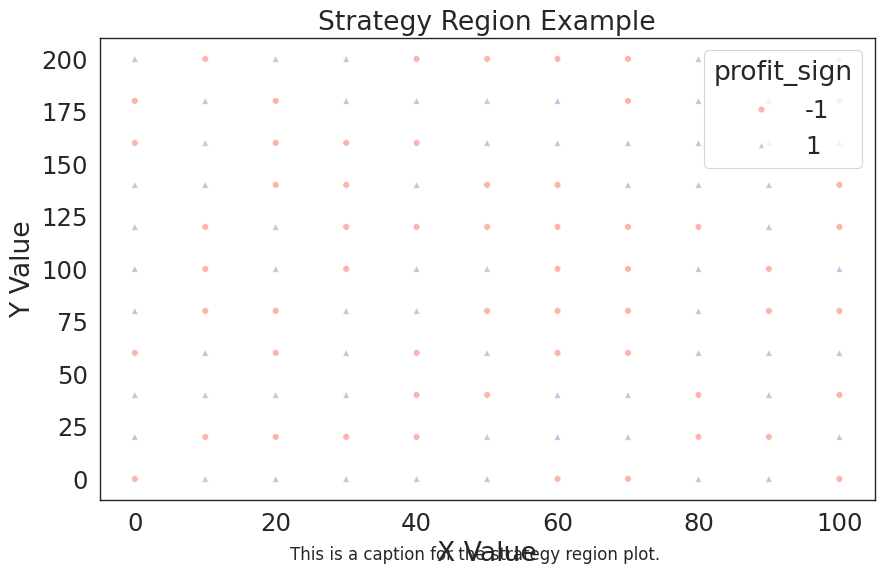

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# PosNeg Function
def PosNeg(val1, val2):
    result = np.random.choice([-1, 1], size=len(val1))
    if result.dtype != 'int64':
        raise ValueError("Must return vector of numbers")
    return result

# StratRegion Function
def StratRegion(val1, val2, title, caption, x_axis, y_axis, option_a, option_b, filename=None, directory='.', brewerScheme='Pastel1'):
    if any(arg is None for arg in [val1, val2, title, caption, x_axis, y_axis, option_a, option_b]):
        raise ValueError("ERROR: Missing argument(s)")

    # Creating a grid of values
    fracs = np.linspace(0, 1, 11)  # produce a point for each 10% increment
    grid = pd.DataFrame([(x, y) for x in val1 * fracs for y in val2 * fracs], columns=[x_axis, y_axis])

    # Apply PosNeg function
    grid['profit_sign'] = PosNeg(grid[x_axis], grid[y_axis])

    # Map profit_sign to marker styles
    marker_map = {-1: 'o', 1: '^'}  # option_a and option_b can be different markers like 'o', '^', 's', etc.

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=grid, x=x_axis, y=y_axis, hue='profit_sign', palette=brewerScheme, style='profit_sign', markers=marker_map)
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.figtext(0.5, 0.01, caption, ha="center", fontsize=12)

    # Save the plot if filename is provided
    if filename:
        plt.savefig(f"{directory}/{filename}.png")

    plt.show()

# Example Usage
val1 = 100
val2 = 200
title = "Strategy Region Example"
caption = "This is a caption for the strategy region plot."
x_axis = "X Value"
y_axis = "Y Value"
option_a = 'o'
option_b = '^'
filename = "strat_region_plot"

StratRegion(val1, val2, title, caption, x_axis, y_axis, option_a, option_b, filename)


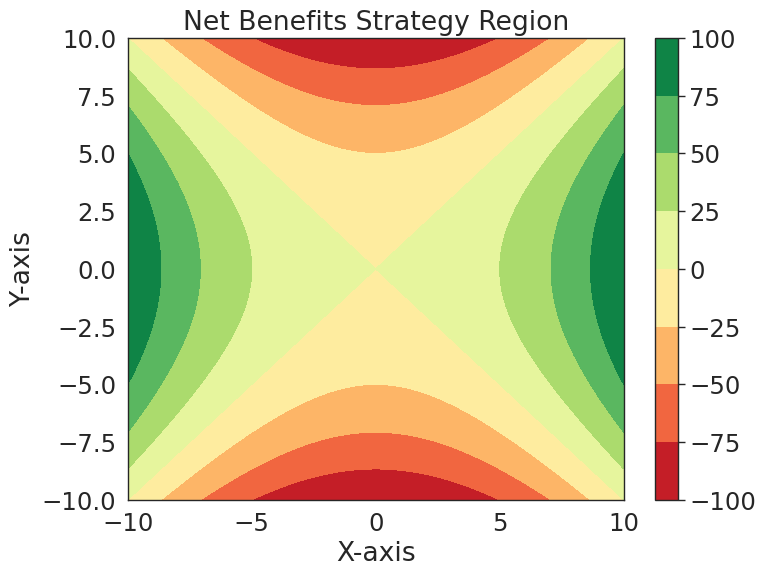

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Define the net benefits function
def net_benefits(x, y):
    # Example: Net benefit as a function of x and y
    return x**2 - y**2

# Set the range for x and y values
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)

# Calculate net benefits for each point in the grid
Z = net_benefits(X, Y)

# Plotting the strategy region
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, cmap='RdYlGn')
plt.colorbar(contour)
plt.title('Net Benefits Strategy Region')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


# extended pearson tukey probabilities

In [210]:
import numpy as np

def extended_pearson_tukey_probabilities(data):
    """
    Assign probabilities to data points using the Extended Pearson-Tukey method.

    :param data: Array-like, the data to be analyzed.
    :return: Array of probabilities corresponding to each data point.
    """
    sorted_data = np.sort(data)
    n = len(data)

    # Empirical Cumulative Distribution Function (ECDF)
    ecdf = (np.arange(1, n+1) - 0.5) / n

    probabilities = np.zeros(n)
    for i in range(n):
        value = sorted_data[i]
        probabilities[np.where(data == value)] = ecdf[i]

    return probabilities

data = np.array([10, 12, 13, 14, 15, 16, 17, 18, 19, 20])
probabilities = extended_pearson_tukey_probabilities(data)
print(probabilities)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


In [211]:
import numpy as np
import scipy.stats as stats

def extended_pearson_tukey_discretization(data):
    """
    Discretizes a continuous distribution into a 3-branch uncertainty node using
    the Extended Pearson-Tukey method.

    :param data: Array-like, the data representing the continuous distribution.
    :return: Tuple of (outcomes, probabilities)
    """
    # Calculate key statistics
    median = np.median(data)
    lower_quartile, upper_quartile = np.percentile(data, [25, 75])

    # Outcomes: Median, Lower Quartile, Upper Quartile
    outcomes = [lower_quartile, median, upper_quartile]

    # Probabilities
    # For a symmetric distribution, probabilities are set at 25%, 50%, 25%.
    probabilities = [0.25, 0.50, 0.25]

    return outcomes, probabilities


data = np.random.normal(loc=0, scale=1, size=1000)  # Example with a normal distribution
outcomes, probabilities = extended_pearson_tukey_discretization(data)
print("Outcomes:", outcomes)
print("Probabilities:", probabilities)


Outcomes: [-0.6639188474677946, -0.020012166820207213, 0.6559144620174429]
Probabilities: [0.25, 0.5, 0.25]


#Value of Perfect and Imperfect Information
# calculate vpi

Expected value (EV) as:

$$EV = \sum_{i} p_i x_i$$

$p_i$ represents a sequence of probabilities associated with each value of i. \\
$ x_i$ represents a sequence of values associated with each value of i.



expected value of perfect information (EVPI)
expected value of imperfect information (EVII)

In [212]:
def calculate_vopi_voii(payoffs, probabilities, imperfect_info_effect):
    """
    Calculate the Value of Perfect and Imperfect Information.

    :param payoffs: Dictionary with payoffs for each decision under each state of nature.
    :param probabilities: Probabilities of each state of nature.
    :param imperfect_info_effect: Function to adjust payoffs based on imperfect information.
    :return: VOPI and VOII.
    """
    # Expected value without additional information
    EV_wo = max(sum(payoff * prob for payoff, prob in zip(decision, probabilities)) for decision in payoffs.values())

    # Expected value with perfect information
    EV_wPI = sum(max(payoffs[decision][state] for decision in payoffs) * prob for state, prob in enumerate(probabilities))

    # Value of Perfect Information
    VOPI = EV_wPI - EV_wo

    # Adjust payoffs based on imperfect information
    adjusted_payoffs = {decision: imperfect_info_effect(payoff) for decision, payoff in payoffs.items()}

    # Expected value with imperfect information
    EV_wII = max(sum(payoff * prob for payoff, prob in zip(decision, probabilities)) for decision in adjusted_payoffs.values())

    # Value of Imperfect Information
    VOII = EV_wII - EV_wo

    return VOPI, VOII

# Payoffs for each decision under each state
payoffs = {
    'decision_1': [10, 20, 30],
    'decision_2': [15, 15, 15],
    'decision_3': [5, 25, 35]
}
probabilities = [0.3, 0.4, 0.3]

# Function to model the effect of imperfect information on payoffs
def adjust_payoffs_for_imperfect_info(payoffs):
    return [p * 1.1 for p in payoffs]  # Example: Increase payoffs by 10%

VOPI, VOII = calculate_vopi_voii(payoffs, probabilities, adjust_payoffs_for_imperfect_info)

print("Value of Perfect Information:", VOPI)
print("Value of Imperfect Information:", VOII)


Value of Perfect Information: 3.0
Value of Imperfect Information: 2.200000000000003


In [213]:
import numpy as np

def calculate_vopi_voii(decisions, states, probabilities, payoffs):
    EV_wo = max(np.dot(payoffs[decision], probabilities) for decision in decisions)

    EV_wPI = sum(max(payoffs[decision][i] for decision in decisions) * probabilities[i] for i in states)
    VOPI = EV_wPI - EV_wo

    # Assuming imperfect information improves the expected payoff for each project by 10%
    EV_wII = max(np.dot([p * 1.1 for p in payoffs[decision]], probabilities) for decision in decisions)
    VOII = EV_wII - EV_wo

    return VOPI, VOII

# Definitions
decisions = ['A', 'B', 'No Investment']
states = [0, 1]  # High Growth, Low Growth
probabilities = [0.6, 0.4]
payoffs = {
    'A': [100, -50],
    'B': [50, 20],
    'No Investment': [0, 0]
}

VOPI, VOII = calculate_vopi_voii(decisions, states, probabilities, payoffs)

print("Value of Perfect Information: $", VOPI, "k")
print("Value of Imperfect Information: $", VOII, "k")


Value of Perfect Information: $ 28.0 k
Value of Imperfect Information: $ 4.0 k


# Montecarlo

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Setup: Compute the NPV based on fixed points

# NPV Function
def npv(discount_rate, development_cost, initial_market_size, market_growth, market_share, sale_price, manufacturing_cost, horizon, time_to_market, debug=False):
    development_costs = np.concatenate((np.full(time_to_market, development_cost/time_to_market), np.zeros(horizon-time_to_market)))
    sales_times = np.arange(0, horizon-time_to_market)

    # Ensure market_growth is a single value
    if isinstance(market_growth, (list, np.ndarray)):
        raise ValueError("market_growth must be a single value, not a list or array.")

    sales = np.concatenate((np.zeros(time_to_market), market_share * initial_market_size * (1+market_growth)**sales_times))
    sale_prices = np.concatenate((np.zeros(time_to_market), np.full(horizon-time_to_market, sale_price)))
    revenue = sales * sale_prices
    manufacturing_costs = np.concatenate((np.zeros(time_to_market), np.full(horizon-time_to_market, manufacturing_cost))) * sales
    net_benefit = revenue - (development_costs + manufacturing_costs)
    npv_vector = net_benefit / ((1 + discount_rate)**np.arange(horizon))

    if debug:
        print("Sales:", sales, "Sale prices:", sale_prices, "Revenue:", revenue, "Development costs:", development_costs, "Manufacturing costs:", manufacturing_costs, "Net benefit:", net_benefit, "NPVs (benefits):", npv_vector)

    return npv_vector.sum()

In [216]:
def sensitivity_analysis(base_params, variable_params, npv_function):
    results = {}
    for param, values in variable_params.items():
        results[param] = []
        for value in values:
            temp_params = base_params.copy()
            temp_params[param] = value
            result = npv_function(**temp_params)
            results[param].append(result)
    return results

# Sensitivity analysis parameters
sensitivity_params = {
    'market_growth': [0.06, 0.05],
    'sale_price': [16500, 17500]
}


params = {
    'discount_rate': 0.15,
    'development_cost': 800000000,
    'initial_market_size': 145000,
    'market_growth': 0.05,
    'market_share': 0.45,
    'sale_price': 17500,
    'manufacturing_cost': 13000,
    'horizon': 10,
    'time_to_market': 3,
    'debug': False
}

# Assuming sensitivity_results is obtained from the sensitivity_analysis function
sensitivity_results = sensitivity_analysis(params, sensitivity_params, npv)

In [217]:
sensitivity_results

{'market_growth': [372253775.314318, 345579619.0105385],
 'sale_price': [113186584.58223577, 345579619.0105385]}

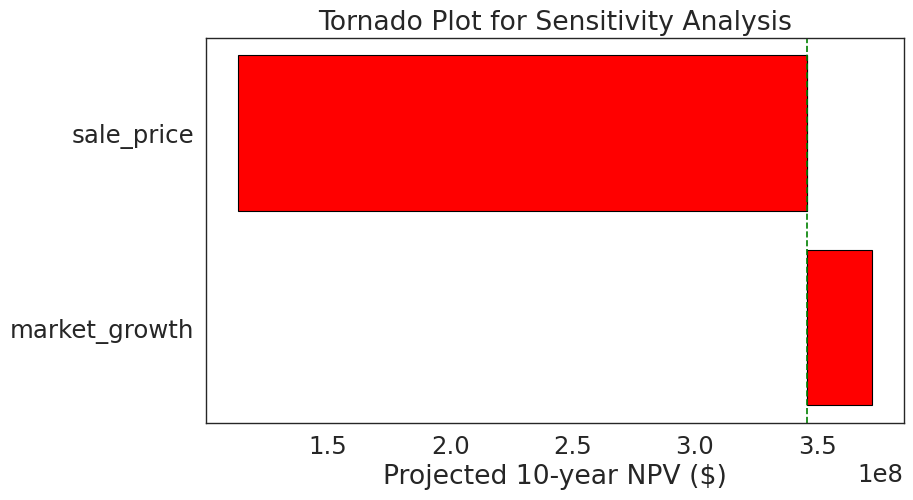

In [218]:
tornado_data = pd.DataFrame(sensitivity_results, index=["Lower", "Upper"]).T
tornado_data['Range'] = tornado_data['Upper'] - tornado_data['Lower']
tornado_data = tornado_data.sort_values(by='Range', ascending=False)

# Create the Tornado Plot
fig, ax = plt.subplots(figsize=(9, 5))


# Calculate base NPV
base_npv = npv(**params)

# Plotting each parameter's impact
for index, row in tornado_data.iterrows():
    ax.barh(index, row['Upper'] - base_npv, color='blue', edgecolor='black', left=base_npv)
    ax.barh(index, row['Lower'] - base_npv, color='red', edgecolor='black', left=base_npv)

ax.axvline(x=base_npv, color='green', linestyle='--') # Base case line
ax.set_yticks(range(len(tornado_data)))
ax.set_yticklabels(tornado_data.index)
ax.set_xlabel('Projected 10-year NPV ($)')
ax.invert_yaxis()  # Largest range at the top
plt.title('Tornado Plot for Sensitivity Analysis')
plt.show()


params = {
    'discount_rate': 0.15,
    'development_cost': 800000000,
    'initial_market_size': 145000,
    'market_growth': 0.05,
    'market_share': 0.45,
    'sale_price': 17500,
    'manufacturing_cost': 13000,
    'horizon': 10,
    'time_to_market': 3,
    'debug': False
}



# Sensitivity analysis parameters
sensitivity_params = {
    'market_growth': [0.06, 0.05],
    'sale_price': [16500, 17500]
    # Add more parameters as needed
}


# Corrected Sensitivity Analysis Call
sensitivity_results = sensitivity_analysis(params, sensitivity_params, npv)

Mean NPV:  124408420.48733853
Standard Deviation of NPV:  383816306.3576924
Probability of Positive NPV:  0.61967


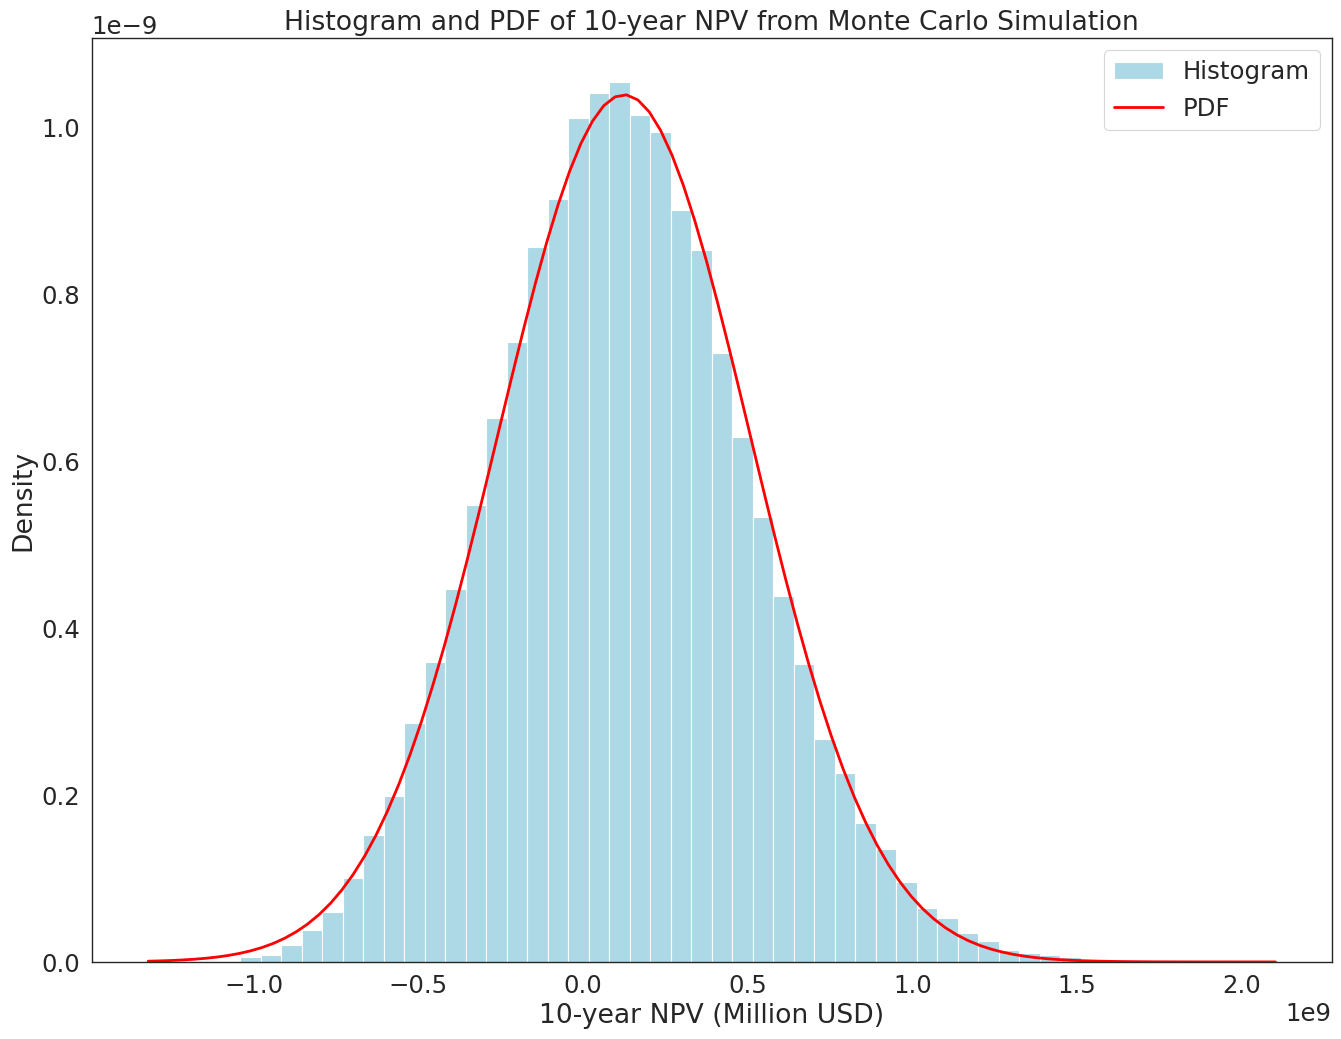

In [219]:
def monte_carlo_simulation(npv_function, fixed_params, distributions, nr_runs):
    results = []
    wins = 0
    for _ in range(nr_runs):
        variable_params = {param: dist.rvs() for param, dist in distributions.items()}
        scenario = {**fixed_params, **variable_params}
        result = npv_function(**scenario)
        results.append(result)
        if result > 0:
            wins += 1
    return np.mean(results), np.std(results), wins / nr_runs, results

# Fixed parameters for Monte Carlo simulation
fixed_params = {
    'discount_rate': params['discount_rate'],
    'horizon': params['horizon'],
    'time_to_market': params['time_to_market'],
    'debug': False
}

# Distributions for varying parameters in Monte Carlo simulation
distributions = {
    'development_cost': stats.triang(c=(800000000-300000000)/(1700000000-300000000), loc=300000000, scale=1700000000-300000000),
    'initial_market_size': stats.norm(loc=145000, scale=25000),
    'market_growth': stats.triang(c=(0.07-0.01)/(0.08-0.01), loc=0.01, scale=0.08-0.01),
    'market_share': stats.triang(c=(0.45-0.3)/(0.5-0.3), loc=0.3, scale=0.5-0.3),
    'sale_price': stats.triang(c=(16500-16000)/(19000-16000), loc=16000, scale=19000-16000),
    'manufacturing_cost': stats.triang(c=(13000-11000)/(14500-11000), loc=11000, scale=14500-11000)
}

# Monte Carlo simulation call
mean_npv, std_npv, proba_win, mc_results = monte_carlo_simulation(npv, fixed_params, distributions, 100000)


print("Mean NPV: ", mean_npv)
print("Standard Deviation of NPV: ", std_npv)
print("Probability of Positive NPV: ", proba_win)

# Plotting results
plt.hist(mc_results, bins=50, color='lightblue', density=True, label='Histogram')

# Plotting the PDF line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = stats.norm.pdf(x, mean_npv, std_npv)
plt.plot(x, pdf, 'r-', linewidth=2, label='PDF')

plt.title("Histogram and PDF of 10-year NPV from Monte Carlo Simulation")
plt.xlabel("10-year NPV (Million USD)")
plt.ylabel("Density")
plt.legend()
plt.show()

Mean NPV:  344879394.74539554
Standard Deviation of NPV:  459890538.9699827
Probability of Positive NPV:  0.762


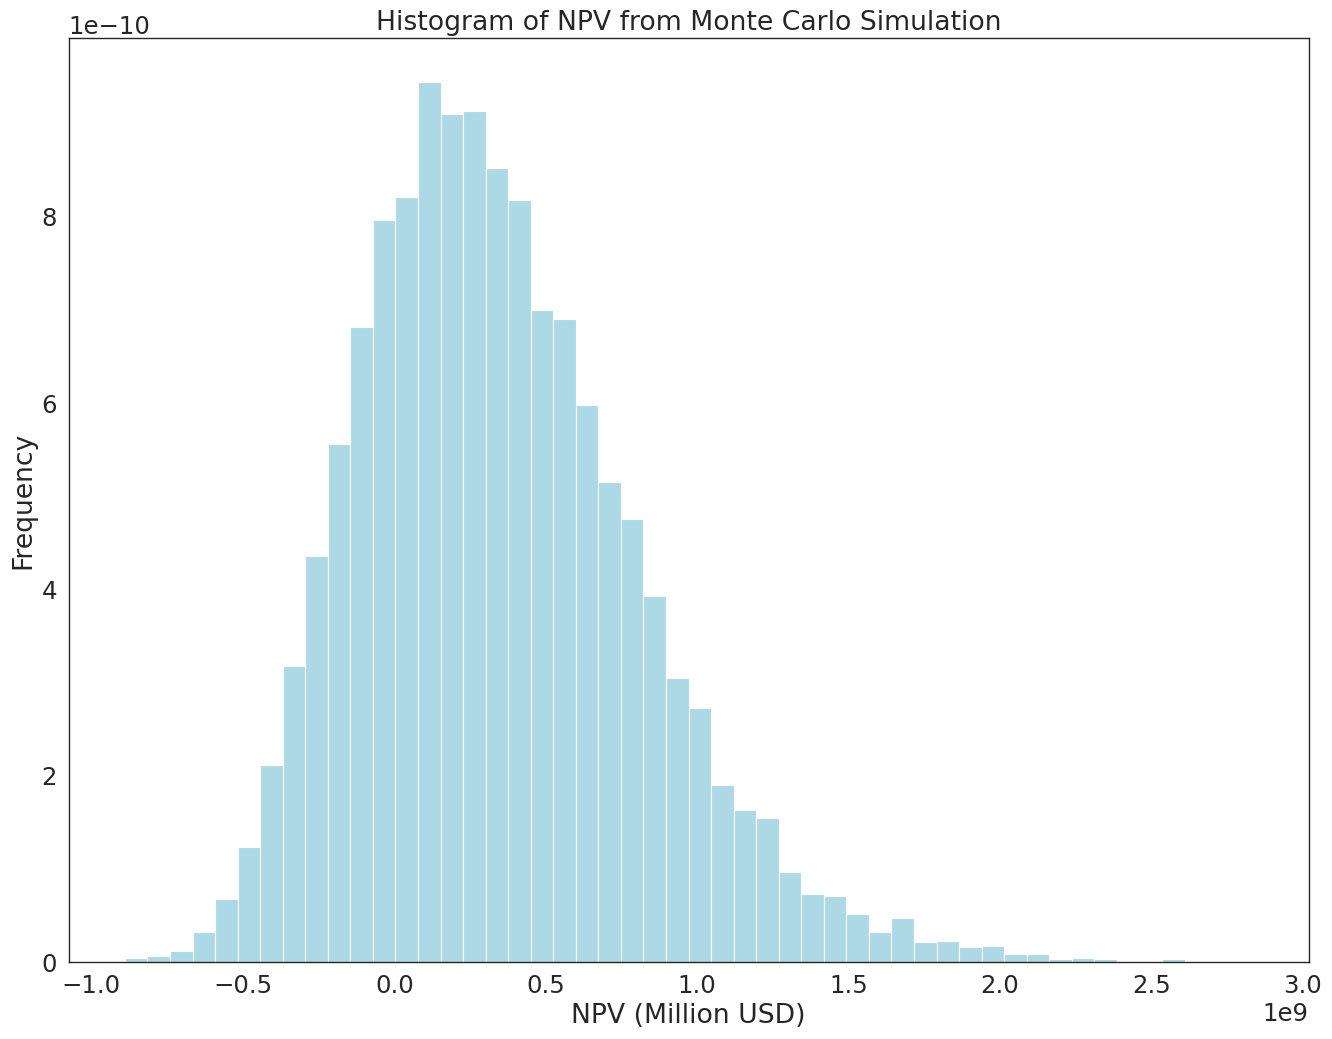

In [117]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Function to calculate Net Present Value (NPV)
def npv(discount_rate, development_cost, initial_market_size, market_growth, market_share, sale_price, manufacturing_cost, horizon, time_to_market, debug):
    """
    Calculates the NPV for a given set of parameters over a specified horizon.
    Accounts for development costs, sales, manufacturing costs, and discounts future cash flows.
    """
    # Development costs calculation: spread over 'time_to_market' years
    development_costs = np.full(horizon, 0)
    development_costs[:int(time_to_market)] = development_cost / time_to_market

    # Sales calculation: based on market size, growth, and share, starting after time_to_market
    sales = np.zeros(horizon)
    sales[int(time_to_market):] = market_share * initial_market_size * (1 + market_growth)**np.arange(horizon - int(time_to_market))

    # Revenue and manufacturing costs
    revenue = np.zeros(horizon)
    revenue[int(time_to_market):] = sales[int(time_to_market):] * sale_price
    manufacturing_costs = sales * manufacturing_cost

    # Net benefit calculation
    net_benefit = revenue - (development_costs + manufacturing_costs)

    # Discounting future cash flows
    npv_vector = net_benefit / ((1 + discount_rate)**np.arange(horizon))

    # Debugging output
    if debug:
        print("Sales: ", sales)
        print("Revenue: ", revenue)
        print("Development costs: ", development_costs)
        print("Manufacturing costs: ", manufacturing_costs)
        print("Net benefit: ", net_benefit)
        print("Discounted Net Benefits: ", npv_vector)

    return np.sum(npv_vector)


def monte_carlo_simulation(npv_function, fixed_params, distributions, nr_runs):
    """
    Conducts a Monte Carlo simulation for the NPV calculation.
    Combines fixed parameters with variable parameters drawn from specified probability distributions.
    """
    results = []
    wins = 0
    for _ in range(nr_runs):
        variable_params = {param: dist.rvs() for param, dist in distributions.items()}
        scenario = {**fixed_params, **variable_params}
        result = npv_function(**scenario)
        results.append(result)
        if result > 0:
            wins += 1
    return np.mean(results), np.std(results), wins / nr_runs, results

# Define fixed parameters and distributions for the Monte Carlo simulation

fixed_params = {
    'discount_rate': 0.15,
    'horizon': 10,
    'time_to_market': 3.0,
    'debug': 0
}


distributions = {
    'development_cost': stats.norm(loc=800000000, scale=100000000),
    'initial_market_size': stats.norm(loc=145000, scale=25000),
    'market_growth': stats.norm(loc=0.05, scale=0.01),
    'market_share': stats.norm(loc=0.45, scale=0.1),
    'sale_price': stats.norm(loc=17500, scale=1000),
    'manufacturing_cost': stats.norm(loc=13000, scale=1000)
}



mean_npv, std_npv, proba_win, mc_results = monte_carlo_simulation(npv, fixed_params, distributions, 10000)


print("Mean NPV: ", mean_npv)
print("Standard Deviation of NPV: ", std_npv)
print("Probability of Positive NPV: ", proba_win)


plt.hist(mc_results, bins=50, color='lightblue', density=True)
plt.title("Histogram of NPV from Monte Carlo Simulation")
plt.xlabel("NPV (Million USD)")
plt.ylabel("Frequency")
plt.show()


# Metropolis-Hastings Sampling

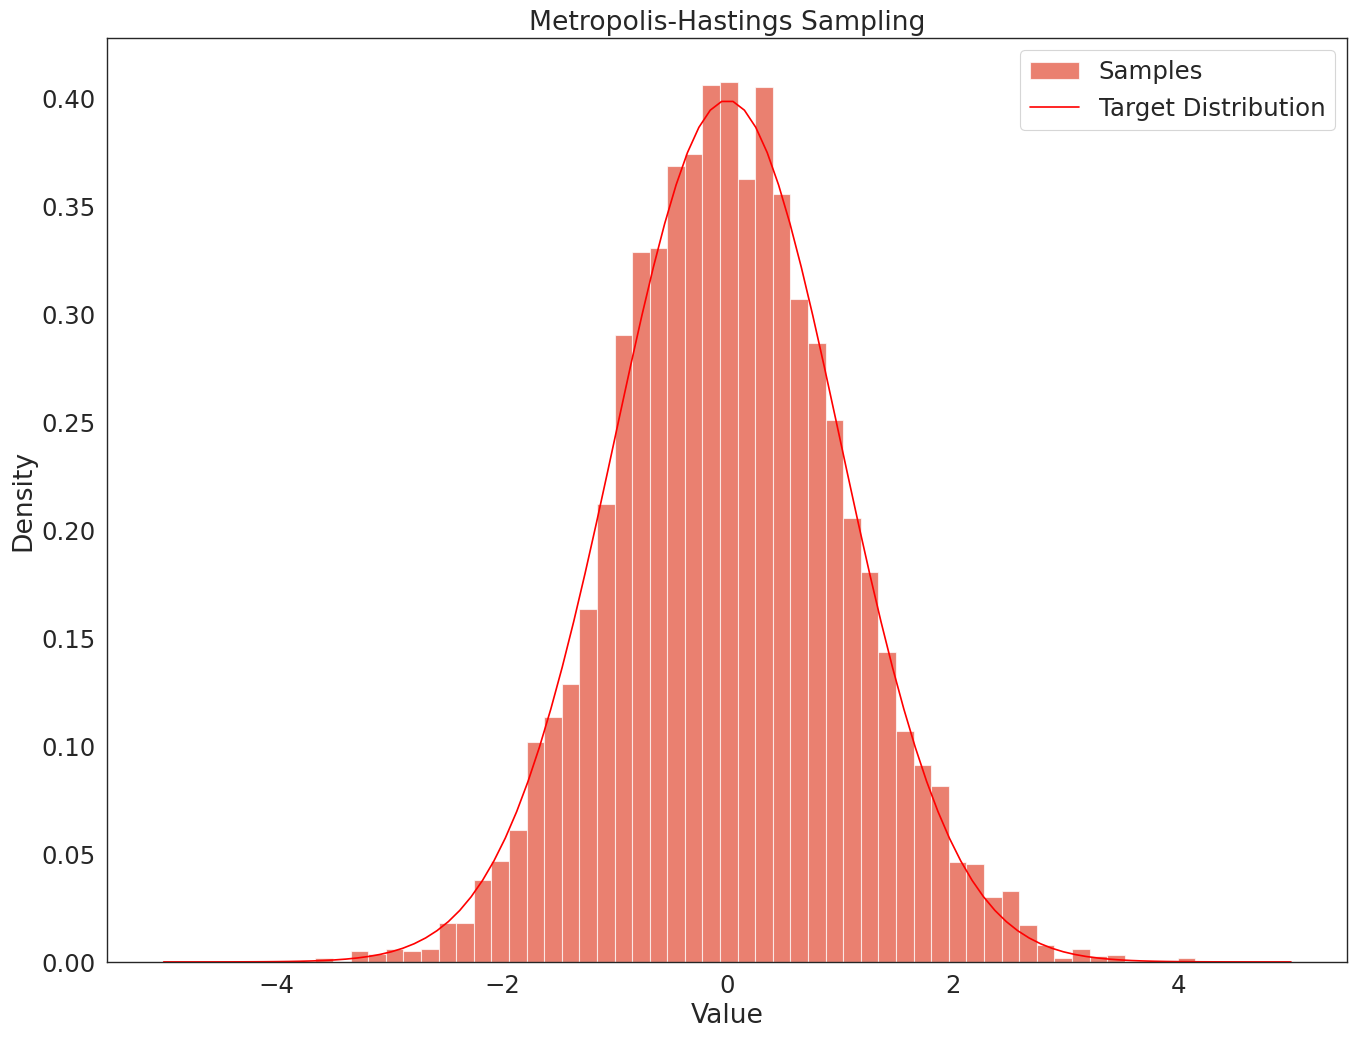

In [220]:
#Metropolis-Hastings Markov Chain MC Sampling
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution (a Gaussian in this case)
def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# Metropolis-Hastings algorithm
def metropolis_hastings(num_samples, proposal_stddev):
    samples = []
    current_state = 0.0  # Initial state

    for _ in range(num_samples):
        # Propose a new state from a Gaussian distribution
        proposal = np.random.normal(current_state, proposal_stddev)

        # Calculate the acceptance ratio
        acceptance_ratio = (
            target_distribution(proposal) / target_distribution(current_state)
        )

        # Accept or reject the proposed state
        if np.random.rand() < acceptance_ratio:
            current_state = proposal

        samples.append(current_state)

    return samples

# Number of samples to generate
num_samples = 10000

# Standard deviation for the proposal distribution
proposal_stddev = 1.0

# Generate samples using Metropolis-Hastings
samples = metropolis_hastings(num_samples, proposal_stddev)

# Plot the samples and compare to the target distribution
plt.hist(samples, bins=50, density=True, label='Samples', alpha=0.7)
x = np.linspace(-5, 5, 100)
plt.plot(x, target_distribution(x), 'r-', label='Target Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('Metropolis-Hastings Sampling')
plt.show()


# BCA

Recall Executive Order 12866 (1993)

https://www.epa.gov/laws-regulations/summary-executive-order-12866-regulatory-planning-and-review

(get New one)

E.O 14094, Modernizing Regulatory Review, by President Joe Biden (88 FR 21879, April 11, 2023).

It provides that significant regulatory actions be submitted for review to the Office of Information and Regulatory Affairs (OIRA) in the Office of Management and Budget (OMB). A "significant regulatory action," as defined by the E.O., generally is any regulatory action that is likely to result in a rule that may:

1 Identify goal
2 Identify alternatives
3 Identify parties affected by the alternatives
4 Determine all effects on the whole society
I positive and negative
I favorable and unfavorable
I present and future
5 Assign values (usually in monetary units) to those effects
6 Calculate net benefit (and use as choice criteria)
7 (Make choice)

Non-mutually exclusive projects with a resource constraint -> (rank)

maximizes net benefit

marginal costs = marginal benefits.

when there are externalities, stated or revealed preferences that represent the willingness to pay or to accept can be used to assess the value of those externalities.

In a social BCA, pick the alternative that maximizes net benefits for all parties, i.e., including the externalities.

Recall: Kaldor Hicks criterion : “A policy should be adopted if and only if gainers could fully compensate losers and still be better off”